In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [3]:
df=pd.read_excel("marketing_campaign.xlsx")

## Exploratory Data Analysis

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524.0      1957.0  Graduation         Single  58138.0      0.0       0.0   
1  2174.0      1954.0  Graduation         Single  46344.0      1.0       1.0   
2  4141.0      1965.0  Graduation       Together  71613.0      0.0       0.0   
3  6182.0      1984.0  Graduation       Together  26646.0      1.0       0.0   
4  5324.0      1981.0         PhD        Married  58293.0      1.0       0.0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04     58.0     635.0  ...                7.0           0.0   
1  2014-03-08     38.0      11.0  ...                5.0           0.0   
2  2013-08-21     26.0     426.0  ...                4.0           0.0   
3  2014-02-10     26.0      11.0  ...                6.0           0.0   
4  2014-01-19     94.0     173.0  ...                5.0           0.0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0           0.0           0.0           0.0           0.0       0.0   
1           0.0           0.0           0.0           0.0       0.0   
2           0.0           0.0           0.0           0.0       0.0   
3           0.0           0.0           0.0           0.0       0.0   
4           0.0           0.0           0.0           0.0       0.0   

   Z_CostContact  Z_Revenue  Response  
0            3.0       11.0       1.0  
1            3.0       11.0       0.0  
2            3.0       11.0       0.0  
3            3.0       11.0       0.0  
4            3.0       11.0       0.0  

[5 rows x 29 columns]

In [5]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870.0      1967.0  Graduation        Married  61223.0      0.0   
2236   4001.0      1946.0         PhD       Together  64014.0      2.0   
2237   7270.0      1981.0  Graduation       Divorced  56981.0      0.0   
2238   8235.0      1956.0      Master       Together  69245.0      0.0   
2239   9405.0      1954.0         PhD        Married  52869.0      1.0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235       1.0  2013-06-13     46.0     709.0  ...                5.0   
2236       1.0  2014-06-10     56.0     406.0  ...                7.0   
2237       0.0  2014-01-25     91.0     908.0  ...                6.0   
2238       1.0  2014-01-24      8.0     428.0  ...                3.0   
2239       1.0  2012-10-15     40.0      84.0  ...                7.0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235           0.0           0.0           0.0           0.0           0.0   
2236           0.0           0.0           0.0           1.0           0.0   
2237           0.0           1.0           0.0           0.0           0.0   
2238           0.0           0.0           0.0           0.0           0.0   
2239           0.0           0.0           0.0           0.0           0.0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235       0.0            3.0       11.0       0.0  
2236       0.0            3.0       11.0       0.0  
2237       0.0            3.0       11.0       0.0  
2238       0.0            3.0       11.0       0.0  
2239       0.0            3.0       11.0       1.0  

[5 rows x 29 columns]

In [6]:
df.shape

(2240, 29)

In [7]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1707   1045.0      1965.0  Graduation       Together  52117.0      0.0   
506   10584.0      1976.0  Graduation        Married  65665.0      0.0   
1993  10164.0      1958.0  Graduation         Single  94472.0      0.0   
1522   1998.0      1976.0  Graduation         Single  37697.0      1.0   
2114   1916.0      1954.0      Master        Married  45736.0      0.0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
1707       1.0  2012-08-16     55.0     112.0  ...                7.0   
506        1.0  2013-12-02     77.0     225.0  ...                3.0   
1993       1.0  2014-04-03     75.0    1017.0  ...                5.0   
1522       0.0  2014-02-07     82.0      34.0  ...                6.0   
2114       1.0  2013-07-24     92.0     188.0  ...                7.0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1707           0.0           0.0           0.0           0.0           0.0   
506            0.0           0.0           0.0           0.0           0.0   
1993           0.0           1.0           1.0           0.0           0.0   
1522           0.0           0.0           0.0           0.0           0.0   
2114           0.0           0.0           0.0           0.0           0.0   

      Complain  Z_CostContact  Z_Revenue  Response  
1707       0.0            3.0       11.0       0.0  
506        0.0            3.0       11.0       0.0  
1993       0.0            3.0       11.0       0.0  
1522       0.0            3.0       11.0       0.0  
2114       0.0            3.0       11.0       0.0  

[5 rows x 29 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Mean Imputation

In [10]:
mean_Income = df['Income'].mean()
mean_Income

52247.25135379061

In [11]:
df1 = df.copy()

In [12]:
df1.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524.0      1957.0  Graduation         Single  58138.0      0.0       0.0   
1  2174.0      1954.0  Graduation         Single  46344.0      1.0       1.0   
2  4141.0      1965.0  Graduation       Together  71613.0      0.0       0.0   
3  6182.0      1984.0  Graduation       Together  26646.0      1.0       0.0   
4  5324.0      1981.0         PhD        Married  58293.0      1.0       0.0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04     58.0     635.0  ...                7.0           0.0   
1  2014-03-08     38.0      11.0  ...                5.0           0.0   
2  2013-08-21     26.0     426.0  ...                4.0           0.0   
3  2014-02-10     26.0      11.0  ...                6.0           0.0   
4  2014-01-19     94.0     173.0  ...                5.0           0.0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0           0.0           0.0           0.0           0.0       0.0   
1           0.0           0.0           0.0           0.0       0.0   
2           0.0           0.0           0.0           0.0       0.0   
3           0.0           0.0           0.0           0.0       0.0   
4           0.0           0.0           0.0           0.0       0.0   

   Z_CostContact  Z_Revenue  Response  
0            3.0       11.0       1.0  
1            3.0       11.0       0.0  
2            3.0       11.0       0.0  
3            3.0       11.0       0.0  
4            3.0       11.0       0.0  

[5 rows x 29 columns]

In [13]:
df1.shape

(2240, 29)

In [14]:
df1['Income'] = df1['Income'].fillna(mean_Income)

In [15]:
df1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
df1.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [17]:
df1[df1.duplicated()].shape

(0, 29)

In [18]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [19]:
df1[['Education', 'Marital_Status']]=df1[['Education', 'Marital_Status']].astype('category')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

In [21]:
df1.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
df1.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
df1['Dt_Customer'] = pd.DatetimeIndex(df1['Dt_Customer'])

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

<AxesSubplot:ylabel='Education'>

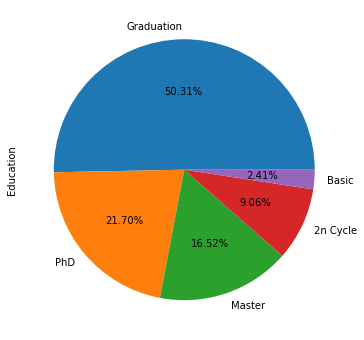

In [25]:
plt.figure(figsize=(6,6))
df1.Education.value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:ylabel='Marital_Status'>

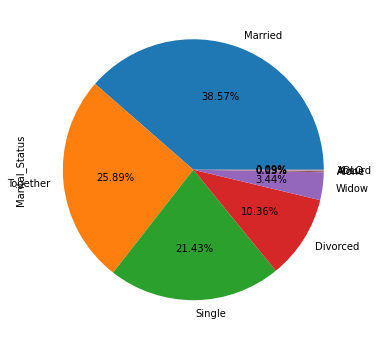

In [26]:
plt.figure(figsize=(6,6))
df1.Marital_Status.value_counts().plot(kind='pie',autopct="%1.2f%%")

Text(0.5, 0, "Customer's yearly household income")

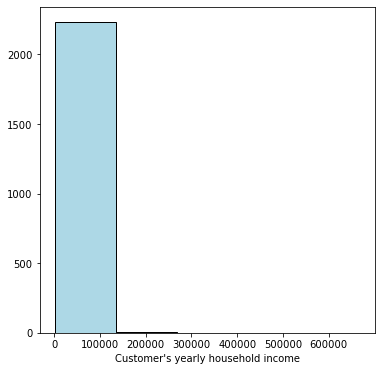

In [27]:
plt.figure(figsize=(6,6))
plt.hist(df1['Income'],facecolor="lightblue",edgecolor="black",bins=5)
plt.xlabel("Customer's yearly household income")

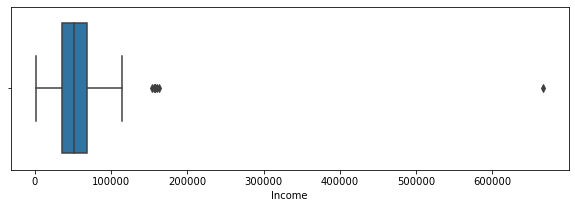

In [28]:
plt.figure(figsize=(10,3))
sns.boxplot(df1.Income)
plt.xlabel('Income')
plt.show()

<AxesSubplot:xlabel='Education'>

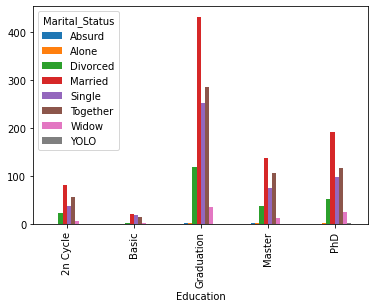

In [29]:
pd.crosstab(df1.Education,df1.Marital_Status).plot(kind="bar")

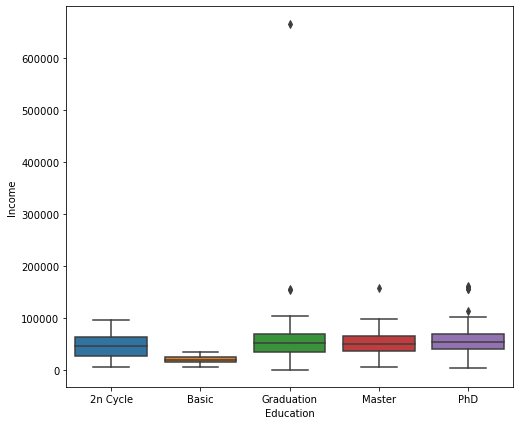

In [30]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Education', y='Income', data=df1)
plt.ylabel('Income')
plt.show()

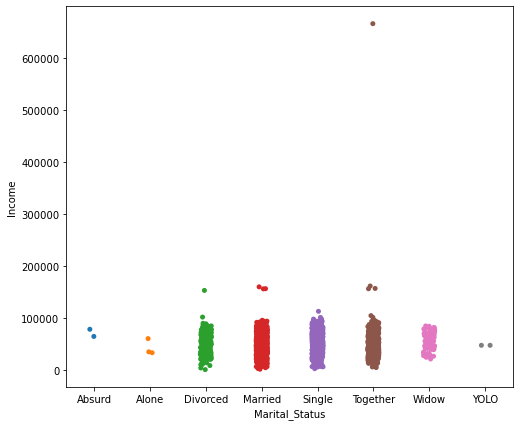

In [31]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Marital_Status', y='Income', data=df1)
plt.ylabel('Income')
plt.show()

### Removing the outlier at Income = 666666.0

In [32]:
df1[df1.Income>600000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432.0      1977.0  Graduation       Together  666666.0      1.0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233       0.0  2013-06-02     23.0       9.0  ...                6.0   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233           0.0           0.0           0.0           0.0           0.0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233       0.0            3.0       11.0       0.0  

[1 rows x 29 columns]

In [33]:
df2 = df1.copy()
df2.drop(2233,axis=0,inplace=True)

In [34]:
df2.shape

(2239, 29)

Text(0.5, 0, "Customer's yearly household income")

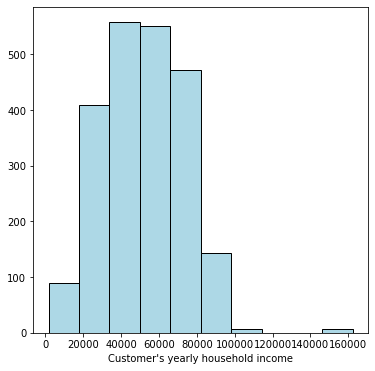

In [35]:
plt.figure(figsize=(6,6))
plt.hist(df2['Income'],facecolor="lightblue",edgecolor="black")
plt.xlabel("Customer's yearly household income")

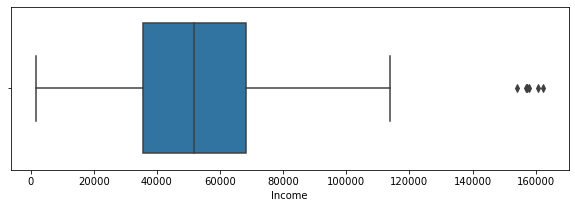

In [36]:
plt.figure(figsize=(10,3))
sns.boxplot(df2.Income)
plt.xlabel('Income')
plt.show()

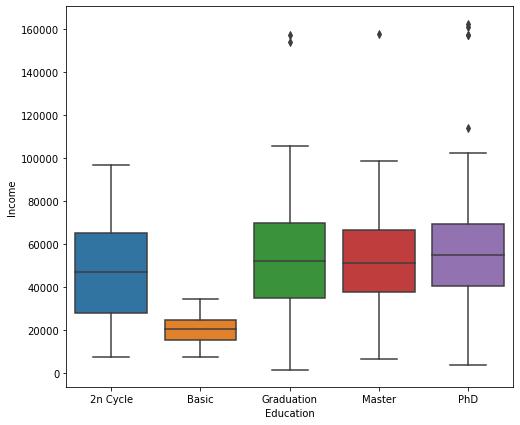

In [37]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Education', y='Income', data=df2)
plt.ylabel('Income')
plt.show()

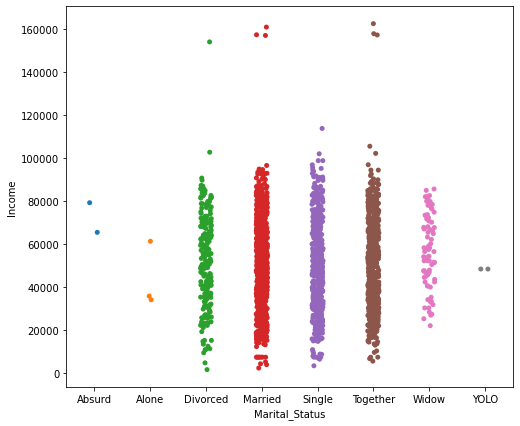

In [38]:
plt.figure(figsize=(8,7))
sns.stripplot(x='Marital_Status', y='Income', data=df2)
plt.ylabel('Income')
plt.show()

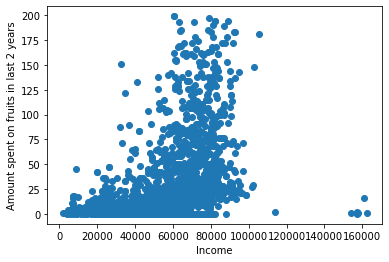

In [39]:
plt.scatter(df2.Income,df2.MntFruits);
plt.xlabel('Income');
plt.ylabel('Amount spent on fruits in last 2 years');

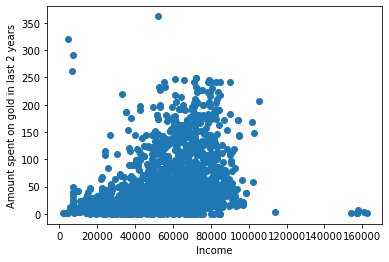

In [40]:
plt.scatter(df2.Income,df2.MntGoldProds);
plt.xlabel('Income');
plt.ylabel('Amount spent on gold in last 2 years');

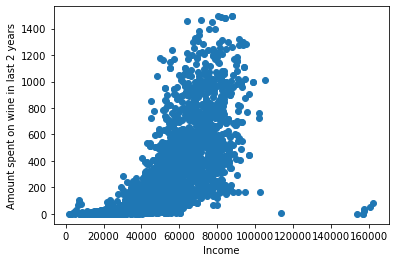

In [41]:
plt.scatter(df2.Income,df2.MntWines);
plt.xlabel('Income');
plt.ylabel('Amount spent on wine in last 2 years');

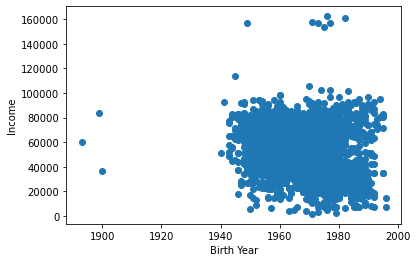

In [42]:
plt.scatter(df2.Year_Birth,df2.Income);
plt.xlabel('Birth Year');
plt.ylabel('Income');

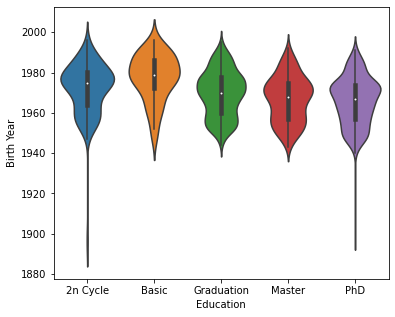

In [43]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Education', y='Year_Birth', data=df2)
plt.ylabel('Birth Year')
plt.show()

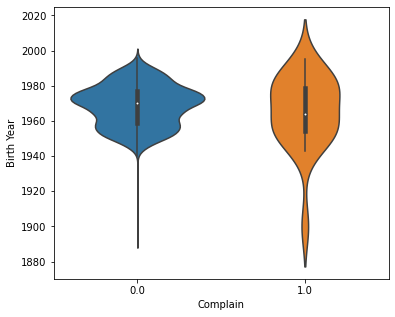

In [44]:
plt.figure(figsize=(6,5))
sns.violinplot(x='Complain', y='Year_Birth', data=df2)
plt.ylabel('Birth Year')
plt.show()

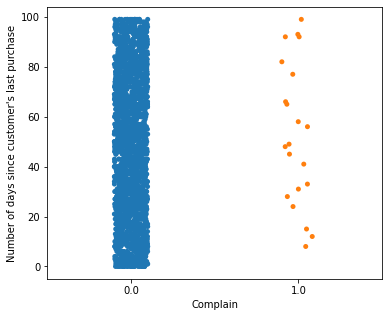

In [45]:
plt.figure(figsize=(6,5))
sns.stripplot(x='Complain', y='Recency', data=df2)
plt.ylabel("Number of days since customer's last purchase")
plt.show()

### Creating dummy variables for categorical columns

In [46]:
data=pd.get_dummies(df2)
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Education_Master  Education_PhD  \
0     635.0       88.0            546.0  ...                 0              0   
1      11.0        1.0              6.0  ...                 0              0   
2     426.0       49.0            127.0  ...                 0              0   
3      11.0        4.0             20.0  ...                 0              0   
4     173.0       43.0            118.0  ...                 0              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  
0                     0                    0  
1                     0                    0  
2                     0                    0  
3                     0                    0  
4                     0                    0  

[5 rows x 40 columns]

In [47]:
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

## Clustering

### Normalization of data

In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [49]:
data1_norm = norm_func(data.iloc[:,1:24])

In [50]:
data1_norm.head()

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
0   0.621359  0.351086     0.0      0.0     0.051502  0.585859  0.425318   
1   0.592233   0.27768     0.5      0.5     0.838340  0.383838  0.007368   
2   0.699029  0.434956     0.0      0.0     0.553648  0.262626  0.285332   
3   0.883495  0.155079     0.5      0.0     0.801144  0.262626  0.007368   
4   0.854369  0.352051     0.5      0.0     0.769671  0.949495  0.115874   

  MntFruits MntMeatProducts MntFishProducts  ... NumWebPurchases  \
0  0.442211        0.316522        0.664093  ...        0.296296   
1  0.005025        0.003478        0.007722  ...        0.037037   
2  0.246231        0.073623        0.428571  ...        0.296296   
3  0.020101        0.011594         0.03861  ...        0.074074   
4   0.21608        0.068406        0.177606  ...        0.185185   

  NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3  \
0            0.357143          0.307692              0.35          0.0   
1            0.035714          0.153846              0.25          0.0   
2            0.071429          0.769231               0.2          0.0   
3                 0.0          0.307692               0.3          0.0   
4            0.107143          0.461538              0.25          0.0   

  AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain  
0          0.0          0.0          0.0          0.0      0.0  
1          0.0          0.0          0.0          0.0      0.0  
2          0.0          0.0          0.0          0.0      0.0  
3          0.0          0.0          0.0          0.0      0.0  
4          0.0          0.0          0.0          0.0      0.0  

[5 rows x 23 columns]

In [51]:
data2_norm = norm_func(data.iloc[:,26:])

In [52]:
data2_norm.head()

Response  Education_2n Cycle  Education_Basic  Education_Graduation  \
0       1.0                 0.0              0.0                   1.0   
1       0.0                 0.0              0.0                   1.0   
2       0.0                 0.0              0.0                   1.0   
3       0.0                 0.0              0.0                   1.0   
4       0.0                 0.0              0.0                   0.0   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0               0.0            0.0                    0.0   
1               0.0            0.0                    0.0   
2               0.0            0.0                    0.0   
3               0.0            0.0                    0.0   
4               0.0            1.0                    0.0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                   0.0                      0.0                     0.0   
1                   0.0                      0.0                     0.0   
2                   0.0                      0.0                     0.0   
3                   0.0                      0.0                     0.0   
4                   0.0                      0.0                     1.0   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                    1.0                      0.0                   0.0   
1                    1.0                      0.0                   0.0   
2                    0.0                      1.0                   0.0   
3                    0.0                      1.0                   0.0   
4                    0.0                      0.0                   0.0   

   Marital_Status_YOLO  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0

In [53]:
data_norm = pd.concat([data1_norm,data2_norm],axis=1)

In [54]:
data_norm.head()

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
0   0.621359  0.351086     0.0      0.0     0.051502  0.585859  0.425318   
1   0.592233   0.27768     0.5      0.5     0.838340  0.383838  0.007368   
2   0.699029  0.434956     0.0      0.0     0.553648  0.262626  0.285332   
3   0.883495  0.155079     0.5      0.0     0.801144  0.262626  0.007368   
4   0.854369  0.352051     0.5      0.0     0.769671  0.949495  0.115874   

  MntFruits MntMeatProducts MntFishProducts  ... Education_Master  \
0  0.442211        0.316522        0.664093  ...              0.0   
1  0.005025        0.003478        0.007722  ...              0.0   
2  0.246231        0.073623        0.428571  ...              0.0   
3  0.020101        0.011594         0.03861  ...              0.0   
4   0.21608        0.068406        0.177606  ...              0.0   

  Education_PhD Marital_Status_Absurd Marital_Status_Alone  \
0           0.0                   0.0                  0.0   
1           0.0                   0.0                  0.0   
2           0.0                   0.0                  0.0   
3           0.0                   0.0                  0.0   
4           1.0                   0.0                  0.0   

  Marital_Status_Divorced Marital_Status_Married Marital_Status_Single  \
0                     0.0                    0.0                   1.0   
1                     0.0                    0.0                   1.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    1.0                   0.0   

  Marital_Status_Together Marital_Status_Widow Marital_Status_YOLO  
0                     0.0                  0.0                 0.0  
1                     0.0                  0.0                 0.0  
2                     1.0                  0.0                 0.0  
3                     1.0                  0.0                 0.0  
4                     0.0                  0.0                 0.0  

[5 rows x 37 columns]

## Hierarchical Clustering

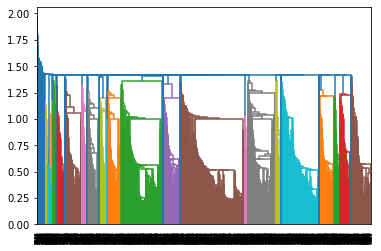

In [55]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))

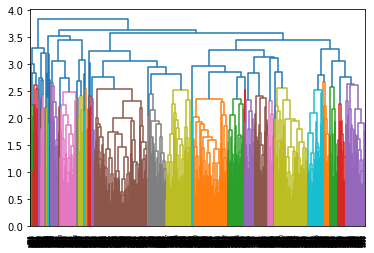

In [56]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

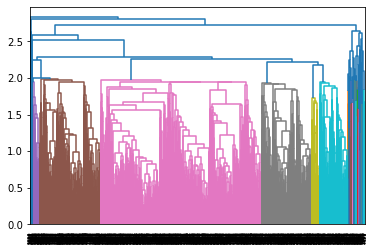

In [57]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

### Hierarchical Clustering - Single Linkage

In [58]:
# create clusters
hc_s = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'single')

In [59]:
hc_s.fit_predict(data_norm)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
y_hc_s = hc_s.fit_predict(data_norm)

In [61]:
data['h_clusterid_s'] = y_hc_s
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0     635.0       88.0            546.0  ...              0   
1      11.0        1.0              6.0  ...              0   
2     426.0       49.0            127.0  ...              0   
3      11.0        4.0             20.0  ...              0   
4     173.0       43.0            118.0  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  
0                     0                    0              0  
1                     0                    0              0  
2                     0                    0              0  
3                     0                    0              0  
4                     0                    0              0  

[5 rows x 41 columns]

In [62]:
data.groupby(["h_clusterid_s"])["ID"].apply(lambda x:tuple(x))

h_clusterid_s
0    (5524.0, 2174.0, 4141.0, 6182.0, 5324.0, 7446....
1                                     (9516.0, 3968.0)
2                                            (3520.0,)
3                                            (6906.0,)
4                                            (4427.0,)
5                                            (9369.0,)
6                                            (2186.0,)
7                                            (9058.0,)
8                                            (1665.0,)
9                                            (8732.0,)
Name: ID, dtype: object

In [63]:
data.groupby(["h_clusterid_s"])["ID"].count()

h_clusterid_s
0    2229
1       2
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
Name: ID, dtype: int64

### Silhouette score for Hierarchical Clustering - Single Linkage

In [64]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'single')
    y=hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y))

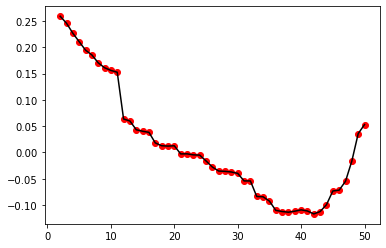

In [65]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [66]:
sc_score

[0.25902738022920035,
 0.24578455577864636,
 0.22668359268330315,
 0.21059312677610337,
 0.19456785585587955,
 0.18543145772897077,
 0.17038949528531092,
 0.16109264587648914,
 0.15594481433449756,
 0.15250603471648466,
 0.06354428360574187,
 0.05974823006829121,
 0.043071657434326185,
 0.04023654474282026,
 0.03817222930067594,
 0.018036479687210023,
 0.012637345320199436,
 0.012016255831606412,
 0.012575055635213968,
 -0.0028830067900407256,
 -0.0027434130159113995,
 -0.004684664677986072,
 -0.005128843572239016,
 -0.016189858156861813,
 -0.027811698939831573,
 -0.03549050149513867,
 -0.036091465556438405,
 -0.037273839639739716,
 -0.03991998599110291,
 -0.054264050752907494,
 -0.05430511767160827,
 -0.08382881000261516,
 -0.08442605760935633,
 -0.09264091822027418,
 -0.11025284672179493,
 -0.11249475323965379,
 -0.11379115498727368,
 -0.11187705762387143,
 -0.10931951316462449,
 -0.11152184862575656,
 -0.11705497828116032,
 -0.11256997437116223,
 -0.09952310818792852,
 -0.0734004885

### Hierarchical Clustering - Complete Linkage

In [67]:
# create clusters
hc_c = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'complete')

In [68]:
hc_c.fit_predict(data_norm)

array([4, 4, 9, ..., 9, 8, 0], dtype=int64)

In [69]:
y_hc_c = hc_c.fit_predict(data_norm)

In [70]:
data['h_clusterid_c'] = y_hc_c
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Absurd  \
0     635.0       88.0            546.0  ...                      0   
1      11.0        1.0              6.0  ...                      0   
2     426.0       49.0            127.0  ...                      0   
3      11.0        4.0             20.0  ...                      0   
4     173.0       43.0            118.0  ...                      0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                     0                        0                       0   
1                     0                        0                       0   
2                     0                        0                       0   
3                     0                        0                       0   
4                     0                        0                       1   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                      1                        0                     0   
1                      1                        0                     0   
2                      0                        1                     0   
3                      0                        1                     0   
4                      0                        0                     0   

   Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  
0                    0              0              4  
1                    0              0              4  
2                    0              0              9  
3                    0              0              9  
4                    0              0              0  

[5 rows x 42 columns]

In [71]:
data.groupby(["h_clusterid_c"])["ID"].apply(lambda x:tuple(x))

h_clusterid_c
0    (5324.0, 6177.0, 1994.0, 2569.0, 9736.0, 9360....
1    (2114.0, 6853.0, 9369.0, 3725.0, 4947.0, 8029....
2    (6565.0, 2225.0, 1859.0, 8908.0, 1592.0, 9529....
3    (8595.0, 8614.0, 6518.0, 7247.0, 1377.0, 313.0...
4    (5524.0, 2174.0, 7892.0, 5255.0, 10738.0, 7281...
5    (387.0, 2278.0, 10755.0, 9909.0, 10629.0, 1040...
6    (4855.0, 5899.0, 7373.0, 2968.0, 11051.0, 1685...
7    (999.0, 7215.0, 10240.0, 2798.0, 10089.0, 6963...
8    (7446.0, 8180.0, 6864.0, 3033.0, 6260.0, 4119....
9    (4141.0, 6182.0, 965.0, 2125.0, 4939.0, 1409.0...
Name: ID, dtype: object

In [72]:
data.groupby(["h_clusterid_c"])["ID"].count()

h_clusterid_c
0    695
1     22
2     60
3     76
4    420
5    237
6    172
7     57
8    145
9    355
Name: ID, dtype: int64

### Silhouette score for Hierarchical Clustering - Complete Linkage

In [73]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')
    y=hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y))

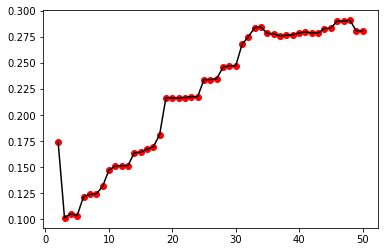

In [74]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [75]:
sc_score

[0.17389835521261926,
 0.10144177177644492,
 0.10550898228155163,
 0.10374046892162687,
 0.1218532447429867,
 0.12391743870241542,
 0.12430817872483481,
 0.13157215573185446,
 0.14722804050659308,
 0.15114253385072984,
 0.15147090155525272,
 0.15159538713430487,
 0.16382658803426425,
 0.1645270617554624,
 0.1673626826605172,
 0.16950595864111972,
 0.18120888740918006,
 0.2167539424278532,
 0.2164367936298845,
 0.21630402947757846,
 0.21685677404228063,
 0.2175555272820562,
 0.21778606395987463,
 0.23405062602026794,
 0.23401360504954194,
 0.23491860742983342,
 0.24589576592809695,
 0.24728212308891606,
 0.24716543914715886,
 0.26773496756316173,
 0.2751791116968879,
 0.28389519916750267,
 0.2842501235014239,
 0.2782230248091894,
 0.2779899187924195,
 0.27589459694854934,
 0.2765970937414716,
 0.2770171656417659,
 0.2787364465674539,
 0.2795979716101314,
 0.2788020697433657,
 0.27870817768368544,
 0.28294444925149276,
 0.28342338722903315,
 0.29004986291103396,
 0.28999541813623086,
 0.

### Hierarchical Clustering - Average Linkage

In [76]:
# create clusters
hc_a = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean', linkage = 'average')

In [77]:
hc_a.fit_predict(data_norm)

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [78]:
y_hc_a = hc_a.fit_predict(data_norm)

In [79]:
data['h_clusterid_a'] = y_hc_a
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Alone  \
0     635.0       88.0            546.0  ...                     0   
1      11.0        1.0              6.0  ...                     0   
2     426.0       49.0            127.0  ...                     0   
3      11.0        4.0             20.0  ...                     0   
4     173.0       43.0            118.0  ...                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   h_clusterid_s  h_clusterid_c  h_clusterid_a  
0              0              4              6  
1              0              4              6  
2              0              9              6  
3              0              9              6  
4              0              0              6  

[5 rows x 43 columns]

In [80]:
data.groupby(["h_clusterid_a"])["ID"].apply(lambda x:tuple(x))

h_clusterid_a
0    (6565.0, 6260.0, 6853.0, 1859.0, 9274.0, 1361....
1    (2225.0, 999.0, 7215.0, 2798.0, 2176.0, 10089....
2            (2926.0, 9516.0, 2570.0, 10176.0, 3968.0)
3                                    (10971.0, 4427.0)
4    (2114.0, 10314.0, 3762.0, 7030.0, 3725.0, 2574...
5                                     (1665.0, 3009.0)
6    (5524.0, 2174.0, 4141.0, 6182.0, 5324.0, 7446....
7                             (5376.0, 8475.0, 1501.0)
8    (9369.0, 4947.0, 8779.0, 4073.0, 4856.0, 9984....
9                                            (5255.0,)
Name: ID, dtype: object

In [81]:
data.groupby(["h_clusterid_a"])["ID"].count()

h_clusterid_a
0      35
1      49
2       5
3       2
4      22
5       2
6    2111
7       3
8       9
9       1
Name: ID, dtype: int64

### Silhouette score for Hierarchical Clustering - Average Linkage

In [82]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'average')
    y=hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y))

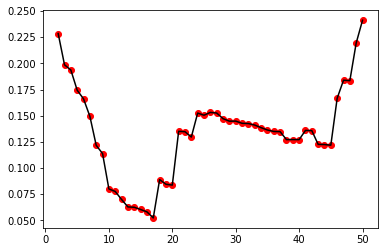

In [83]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [84]:
sc_score

[0.22859562115235105,
 0.198744117233758,
 0.1937099437166045,
 0.17444475845986498,
 0.16618393580321741,
 0.14951041056762332,
 0.12177397935333233,
 0.11391055862684346,
 0.0800968662817548,
 0.07771177234397206,
 0.07003764310263329,
 0.06292977622086009,
 0.06260307516864977,
 0.06047640483093353,
 0.05821591109940175,
 0.05243003109339832,
 0.08903893538406607,
 0.08459421192331931,
 0.08378552941094561,
 0.13519430398756951,
 0.1348043269810555,
 0.12968661307168458,
 0.1525946021846994,
 0.15056813636679503,
 0.15324452637653868,
 0.15265694444436811,
 0.14725130377795548,
 0.14487833022602842,
 0.14491727344157662,
 0.14283256244967305,
 0.1425794844732365,
 0.14115025891854407,
 0.13868330559141331,
 0.13642059662302317,
 0.13503860999999207,
 0.1348842631530635,
 0.1272411435996229,
 0.1272895503880043,
 0.12722760063042252,
 0.13601536640445272,
 0.1358461075166659,
 0.12270537998225908,
 0.12253819182905648,
 0.12192791921191139,
 0.1667371613639903,
 0.18398135066718574,


## DBSCAN

In [85]:
dbs=DBSCAN(min_samples=18,eps=1.2)
dbs_labels=dbs.fit_predict(data_norm)

In [86]:
dbs_labels

array([0, 0, 1, ..., 4, 3, 2], dtype=int64)

In [87]:
data['d_clusterid'] = dbs_labels

In [88]:
data.groupby(["d_clusterid"])["ID"].apply(lambda x:tuple(x))

d_clusterid
-1     (2114.0, 5376.0, 5255.0, 1966.0, 7373.0, 2968....
 0     (5524.0, 2174.0, 7892.0, 1371.0, 7244.0, 1331....
 1     (4141.0, 6182.0, 4939.0, 1409.0, 5710.0, 8430....
 2     (5324.0, 6177.0, 1993.0, 4047.0, 4339.0, 6566....
 3     (7446.0, 3033.0, 4119.0, 5798.0, 3267.0, 9805....
 4     (965.0, 2125.0, 5846.0, 535.0, 11100.0, 7386.0...
 5     (1994.0, 2569.0, 9736.0, 9360.0, 2404.0, 9422....
 6     (8180.0, 6864.0, 5552.0, 4391.0, 4697.0, 5954....
 7     (2278.0, 1473.0, 7264.0, 11004.0, 7301.0, 4279...
 8     (6565.0, 8755.0, 503.0, 2139.0, 4114.0, 1402.0...
 9     (10738.0, 11178.0, 6205.0, 821.0, 2795.0, 1023...
 10    (10755.0, 9909.0, 10629.0, 5346.0, 367.0, 5885...
 11    (7281.0, 1016.0, 2937.0, 5823.0, 1030.0, 9449....
 12    (8595.0, 8614.0, 7247.0, 10102.0, 6609.0, 8842...
 13    (10401.0, 5234.0, 1491.0, 7798.0, 1755.0, 2227...
 14    (4855.0, 5899.0, 11051.0, 1685.0, 7055.0, 1880...
 15    (1461.0, 10095.0, 1184.0, 8275.0, 9750.0, 5835...
 16    (387.0, 2563

In [89]:
data.groupby(["d_clusterid"])["ID"].count()

d_clusterid
-1     340
 0     229
 1     254
 2     166
 3      94
 4     100
 5     398
 6      32
 7      31
 8     124
 9      64
 10     70
 11     84
 12     29
 13     53
 14    100
 15     35
 16     18
 17     18
Name: ID, dtype: int64

In [90]:
data.tail()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
2235  10870.0      1967.0  61223.0      0.0       1.0  2013-06-13     46.0   
2236   4001.0      1946.0  64014.0      2.0       1.0  2014-06-10     56.0   
2237   7270.0      1981.0  56981.0      0.0       0.0  2014-01-25     91.0   
2238   8235.0      1956.0  69245.0      0.0       1.0  2014-01-24      8.0   
2239   9405.0      1954.0  52869.0      1.0       1.0  2012-10-15     40.0   

      MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Divorced  \
2235     709.0       43.0            182.0  ...                        0   
2236     406.0        0.0             30.0  ...                        0   
2237     908.0       48.0            217.0  ...                        1   
2238     428.0       30.0            214.0  ...                        0   
2239      84.0        3.0             61.0  ...                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
2235                       1                      0                        0   
2236                       0                      0                        1   
2237                       0                      0                        0   
2238                       0                      0                        1   
2239                       1                      0                        0   

      Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  \
2235                     0                    0              0              0   
2236                     0                    0              0              6   
2237                     0                    0              0              9   
2238                     0                    0              0              8   
2239                     0                    0              0              0   

      h_clusterid_a  d_clusterid  
2235              6            5  
2236              6           -1  
2237              6            4  
2238              6            3  
2239              6            2  

[5 rows x 44 columns]

### Drop outliers found in DBSCAN Clustering

In [91]:
data_norm['d_clusterid'] = dbs_labels

In [92]:
data_norm.head()

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
0   0.621359  0.351086     0.0      0.0     0.051502  0.585859  0.425318   
1   0.592233   0.27768     0.5      0.5     0.838340  0.383838  0.007368   
2   0.699029  0.434956     0.0      0.0     0.553648  0.262626  0.285332   
3   0.883495  0.155079     0.5      0.0     0.801144  0.262626  0.007368   
4   0.854369  0.352051     0.5      0.0     0.769671  0.949495  0.115874   

  MntFruits MntMeatProducts MntFishProducts  ... Education_PhD  \
0  0.442211        0.316522        0.664093  ...           0.0   
1  0.005025        0.003478        0.007722  ...           0.0   
2  0.246231        0.073623        0.428571  ...           0.0   
3  0.020101        0.011594         0.03861  ...           0.0   
4   0.21608        0.068406        0.177606  ...           1.0   

  Marital_Status_Absurd Marital_Status_Alone Marital_Status_Divorced  \
0                   0.0                  0.0                     0.0   
1                   0.0                  0.0                     0.0   
2                   0.0                  0.0                     0.0   
3                   0.0                  0.0                     0.0   
4                   0.0                  0.0                     0.0   

  Marital_Status_Married Marital_Status_Single Marital_Status_Together  \
0                    0.0                   1.0                     0.0   
1                    0.0                   1.0                     0.0   
2                    0.0                   0.0                     1.0   
3                    0.0                   0.0                     1.0   
4                    1.0                   0.0                     0.0   

  Marital_Status_Widow Marital_Status_YOLO d_clusterid  
0                  0.0                 0.0           0  
1                  0.0                 0.0           0  
2                  0.0                 0.0           1  
3                  0.0                 0.0           1  
4                  0.0                 0.0           2  

[5 rows x 38 columns]

In [93]:
data_norm[data_norm['d_clusterid']==-1]

Year_Birth    Income Kidhome Teenhome  Dt_Customer   Recency  MntWines  \
15     0.514563  0.504584     0.0      0.0     0.167382  0.232323  0.673811   
21     0.834951  0.004463     0.5      0.0     0.228898  0.424242   0.00067   
27     0.902913  0.314422     0.5      0.0     0.293276  0.191919  0.003349   
29     0.699029  0.515899     0.0      0.0     0.686695  0.969697  0.458138   
33     0.572816  0.279336     0.0      1.0     0.130186  0.080808    0.0643   
...         ...       ...     ...      ...          ...       ...       ...   
2210   0.601942  0.249205     0.0      0.5     0.283262  0.313131  0.202277   
2217   0.533981  0.499804     0.0      0.0     0.878398  0.545455  0.222371   
2221   0.864078  0.460872     0.0      0.0     0.484979  0.121212  0.476892   
2228   0.825243  0.314422     0.0      0.0     0.018598  0.535354  0.021433   
2236   0.514563  0.387659     1.0      0.5     0.972818  0.565657  0.271936   

     MntFruits MntMeatProducts MntFishProducts  ... Education_PhD  \
15    0.110553        0.066667        0.227799  ...           1.0   
21    0.005025             1.0        0.003861  ...           0.0   
27    0.005025        0.001739        0.011583  ...           0.0   
29    0.502513        0.464348        0.081081  ...           1.0   
33    0.060302        0.055652        0.127413  ...           1.0   
...        ...             ...             ...  ...           ...   
2210  0.145729        0.075942        0.123552  ...           0.0   
2217  0.974874        0.218551         0.57529  ...           1.0   
2221  0.130653        0.311884        0.266409  ...           0.0   
2228   0.01005        0.931594        0.046332  ...           0.0   
2236       0.0        0.017391             0.0  ...           1.0   

     Marital_Status_Absurd Marital_Status_Alone Marital_Status_Divorced  \
15                     0.0                  0.0                     0.0   
21                     0.0                  0.0                     0.0   
27                     0.0                  0.0                     0.0   
29                     0.0                  0.0                     0.0   
33                     0.0                  0.0                     1.0   
...                    ...                  ...                     ...   
2210                   0.0                  0.0                     1.0   
2217                   0.0                  0.0                     0.0   
2221                   0.0                  0.0                     0.0   
2228                   0.0                  0.0                     0.0   
2236                   0.0                  0.0                     0.0   

     Marital_Status_Married Marital_Status_Single Marital_Status_Together  \
15                      0.0                   1.0                     0.0   
21                      1.0                   0.0                     0.0   
27                      0.0                   1.0                     0.0   
29                      1.0                   0.0                     0.0   
33                      0.0                   0.0                     0.0   
...                     ...                   ...                     ...   
2210                    0.0                   0.0                     0.0   
2217                    0.0                   0.0                     0.0   
2221                    0.0                   1.0                     0.0   
2228                    0.0                   0.0                     1.0   
2236                    0.0                   0.0                     1.0   

     Marital_Status_Widow Marital_Status_YOLO d_clusterid  
15                    0.0                 0.0          -1  
21                    0.0                 0.0          -1  
27                    0.0                 0.0          -1  
29                    0.0                 0.0          -1  
33                    0.0                 0.0          -1  
...                   ...                

In [94]:
list(data_norm[data_norm['d_clusterid']==-1].index)

[15,
 21,
 27,
 29,
 33,
 39,
 53,
 55,
 56,
 60,
 63,
 67,
 76,
 79,
 87,
 98,
 105,
 111,
 113,
 116,
 124,
 131,
 136,
 138,
 153,
 155,
 164,
 176,
 179,
 190,
 192,
 199,
 203,
 205,
 209,
 217,
 218,
 231,
 240,
 243,
 246,
 252,
 260,
 295,
 296,
 299,
 305,
 312,
 319,
 336,
 338,
 339,
 344,
 347,
 351,
 360,
 361,
 400,
 404,
 417,
 418,
 423,
 424,
 426,
 427,
 430,
 437,
 447,
 456,
 462,
 466,
 472,
 485,
 489,
 494,
 513,
 519,
 523,
 530,
 537,
 543,
 546,
 559,
 575,
 586,
 590,
 591,
 611,
 622,
 633,
 644,
 646,
 676,
 678,
 687,
 688,
 690,
 693,
 694,
 702,
 703,
 705,
 716,
 734,
 735,
 745,
 749,
 753,
 787,
 791,
 797,
 804,
 820,
 822,
 824,
 825,
 826,
 828,
 845,
 852,
 854,
 870,
 875,
 891,
 894,
 906,
 912,
 914,
 917,
 927,
 942,
 943,
 945,
 949,
 966,
 973,
 976,
 980,
 984,
 987,
 989,
 990,
 1000,
 1001,
 1002,
 1007,
 1010,
 1016,
 1022,
 1030,
 1050,
 1053,
 1066,
 1067,
 1076,
 1084,
 1087,
 1100,
 1111,
 1115,
 1117,
 1118,
 1129,
 1134,
 1137,
 11

In [95]:
data_norm.drop(list(data_norm[data_norm['d_clusterid']==-1].index),axis=0,inplace=True)

In [96]:
data_norm.shape

(1899, 38)

In [97]:
data_new = data.copy()

In [98]:
data_new.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Divorced  \
0     635.0       88.0            546.0  ...                        0   
1      11.0        1.0              6.0  ...                        0   
2     426.0       49.0            127.0  ...                        0   
3      11.0        4.0             20.0  ...                        0   
4     173.0       43.0            118.0  ...                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  \
0                     0                    0              0              4   
1                     0                    0              0              4   
2                     0                    0              0              9   
3                     0                    0              0              9   
4                     0                    0              0              0   

   h_clusterid_a  d_clusterid  
0              6            0  
1              6            0  
2              6            1  
3              6            1  
4              6            2  

[5 rows x 44 columns]

In [99]:
data_new.shape

(2239, 44)

In [100]:
data_new.drop(list(data_new[data_new['d_clusterid']==-1].index),axis=0,inplace=True)

In [101]:
data_new.shape

(1899, 44)

## K-Means Clustering

In [102]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(data_norm)

KMeans(n_clusters=4)

In [103]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [104]:
data_new['k_clusterid'] = model_kmeans.labels_

In [105]:
data_new.tail()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
2234   8372.0      1974.0  34421.0      1.0       0.0  2013-07-01     81.0   
2235  10870.0      1967.0  61223.0      0.0       1.0  2013-06-13     46.0   
2237   7270.0      1981.0  56981.0      0.0       0.0  2014-01-25     91.0   
2238   8235.0      1956.0  69245.0      0.0       1.0  2014-01-24      8.0   
2239   9405.0      1954.0  52869.0      1.0       1.0  2012-10-15     40.0   

      MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Married  \
2234       3.0        3.0              7.0  ...                       1   
2235     709.0       43.0            182.0  ...                       1   
2237     908.0       48.0            217.0  ...                       0   
2238     428.0       30.0            214.0  ...                       0   
2239      84.0        3.0             61.0  ...                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
2234                      0                        0                     0   
2235                      0                        0                     0   
2237                      0                        0                     0   
2238                      0                        1                     0   
2239                      0                        0                     0   

      Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  h_clusterid_a  \
2234                    0              0              0              6   
2235                    0              0              0              6   
2237                    0              0              9              6   
2238                    0              0              8              6   
2239                    0              0              0              6   

      d_clusterid  k_clusterid  
2234            5            1  
2235            5            1  
2237            4            1  
2238            3            2  
2239            2            2  

[5 rows x 45 columns]

In [106]:
data_new.groupby(["k_clusterid"])["ID"].apply(lambda x:tuple(x))

k_clusterid
0    (4855.0, 5899.0, 387.0, 8595.0, 8614.0, 10401....
1    (965.0, 1994.0, 2125.0, 8180.0, 2569.0, 9736.0...
2    (5524.0, 2174.0, 4141.0, 6182.0, 5324.0, 7446....
3    (6565.0, 2278.0, 8755.0, 10738.0, 10755.0, 503...
Name: ID, dtype: object

In [107]:
data_new.groupby(["k_clusterid"])["ID"].count()

k_clusterid
0    253
1    530
2    743
3    373
Name: ID, dtype: int64

<AxesSubplot:xlabel='k_clusterid'>

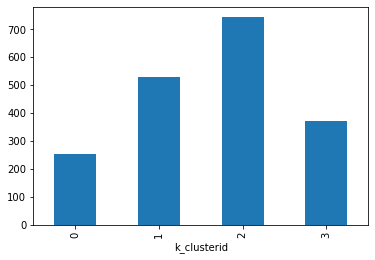

In [108]:
data_new.groupby(["k_clusterid"])["ID"].count().plot(kind='bar')

In [109]:
data_new.groupby('k_clusterid')[['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']].mean()

Income   Kidhome  Teenhome    Recency    MntWines  \
k_clusterid                                                            
0            45641.471349  0.498024  0.553360  48.426877  222.766798   
1            49149.999536  0.473585  0.552830  50.703774  232.088679   
2            50506.278284  0.483176  0.532974  50.335128  262.710633   
3            48911.863285  0.525469  0.517426  48.978552  241.839142   

             MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
k_clusterid                                                                  
0            17.786561       105.909091        29.841897         20.754941   
1            25.337736       138.720755        34.781132         27.579245   
2            25.541050       148.125168        35.415882         23.458950   
3            18.302949       122.048257        26.576408         19.252011   

             MntGoldProds  NumDealsPurchases  NumWebPurchases  \
k_clusterid                                                     
0               32.604743           2.197628         3.498024   
1               45.320755           2.403774         4.013208   
2               40.991925           2.461642         3.970390   
3               34.190349           2.284182         3.557641   

             NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
k_clusterid                                                             
0                       2.039526           5.245059           5.711462  
1                       2.273585           5.666038           5.556604  
2                       2.390310           5.609690           5.419919  
3                       2.083110           5.541555           5.383378

## Cluster Validation - Finding Optimal Number of Clusters

### Elbow method for K-Means Clustering

In [110]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(data_norm)
    iner.append(km.inertia_)

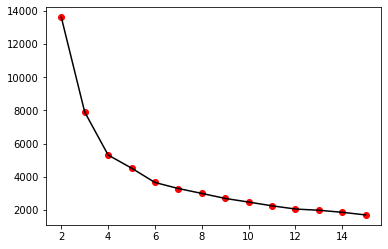

In [111]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

## Model Building - Classification Algorithms

### Exploratory Data Analysis 2

In [112]:
data_new.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Married  \
0     635.0       88.0            546.0  ...                       0   
1      11.0        1.0              6.0  ...                       0   
2     426.0       49.0            127.0  ...                       0   
3      11.0        4.0             20.0  ...                       0   
4     173.0       43.0            118.0  ...                       1   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                      1                        0                     0   
1                      1                        0                     0   
2                      0                        1                     0   
3                      0                        1                     0   
4                      0                        0                     0   

   Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  h_clusterid_a  \
0                    0              0              4              6   
1                    0              0              4              6   
2                    0              0              9              6   
3                    0              0              9              6   
4                    0              0              0              6   

   d_clusterid  k_clusterid  
0            0            2  
1            0            2  
2            1            2  
3            1            2  
4            2            2  

[5 rows x 45 columns]

In [113]:
data1 = data_new.copy()

In [114]:
data1.shape

(1899, 45)

In [115]:
data1.drop(['h_clusterid_s', 'h_clusterid_c', 'h_clusterid_a', 'd_clusterid'],axis=1,inplace=True)

In [116]:
data1.shape

(1899, 41)

In [117]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0     635.0       88.0            546.0  ...              0   
1      11.0        1.0              6.0  ...              0   
2     426.0       49.0            127.0  ...              0   
3      11.0        4.0             20.0  ...              0   
4     173.0       43.0            118.0  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  
0                     0                    0            2  
1                     0                    0            2  
2                     0                    0            2  
3                     0                    0            2  
4                     0                    0            2  

[5 rows x 41 columns]

In [118]:
df3 = df2.copy()

In [119]:
df3.shape

(2239, 29)

In [120]:
df3['d_clusterid'] = dbs_labels

In [121]:
df3.drop(list(df3[df3['d_clusterid']==-1].index),axis=0,inplace=True)

In [122]:
df3.shape

(1899, 30)

In [123]:
df3['k_clusterid'] = model_kmeans.labels_

In [124]:
df3.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524.0      1957.0  Graduation         Single  58138.0      0.0       0.0   
1  2174.0      1954.0  Graduation         Single  46344.0      1.0       1.0   
2  4141.0      1965.0  Graduation       Together  71613.0      0.0       0.0   
3  6182.0      1984.0  Graduation       Together  26646.0      1.0       0.0   
4  5324.0      1981.0         PhD        Married  58293.0      1.0       0.0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04     58.0     635.0  ...           0.0           0.0   
1  2014-03-08     38.0      11.0  ...           0.0           0.0   
2  2013-08-21     26.0     426.0  ...           0.0           0.0   
3  2014-02-10     26.0      11.0  ...           0.0           0.0   
4  2014-01-19     94.0     173.0  ...           0.0           0.0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0           0.0           0.0       0.0            3.0       11.0       1.0   
1           0.0           0.0       0.0            3.0       11.0       0.0   
2           0.0           0.0       0.0            3.0       11.0       0.0   
3           0.0           0.0       0.0            3.0       11.0       0.0   
4           0.0           0.0       0.0            3.0       11.0       0.0   

   d_clusterid  k_clusterid  
0            0            2  
1            0            2  
2            1            2  
3            1            2  
4            2            2  

[5 rows x 31 columns]

In [125]:
df3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'd_clusterid', 'k_clusterid'],
      dtype='object')

In [126]:
df3["Expenses"]=df3.MntWines+df3.MntFruits+df3.MntMeatProducts+df3.MntFishProducts+df3.MntSweetProducts+df3.MntGoldProds

In [127]:
df3["NumPurchases"]=df3.NumDealsPurchases+df3.NumWebPurchases+df3.NumCatalogPurchases+df3.NumStorePurchases

In [128]:
df3["AcceptedCmp"]=df3.AcceptedCmp1+df3.AcceptedCmp2+df3.AcceptedCmp3+df3.AcceptedCmp4+df3.AcceptedCmp5

In [129]:
df3["Childrenhome"]=df3.Kidhome+df3.Teenhome

In [130]:
df3["Age"]=(2023-df3.Year_Birth)

In [131]:
df3.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524.0      1957.0  Graduation         Single  58138.0      0.0       0.0   
1  2174.0      1954.0  Graduation         Single  46344.0      1.0       1.0   
2  4141.0      1965.0  Graduation       Together  71613.0      0.0       0.0   
3  6182.0      1984.0  Graduation       Together  26646.0      1.0       0.0   
4  5324.0      1981.0         PhD        Married  58293.0      1.0       0.0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-09-04     58.0     635.0  ...            3.0       11.0       1.0   
1  2014-03-08     38.0      11.0  ...            3.0       11.0       0.0   
2  2013-08-21     26.0     426.0  ...            3.0       11.0       0.0   
3  2014-02-10     26.0      11.0  ...            3.0       11.0       0.0   
4  2014-01-19     94.0     173.0  ...            3.0       11.0       0.0   

   d_clusterid  k_clusterid  Expenses  NumPurchases  AcceptedCmp  \
0            0            2    1617.0          25.0          0.0   
1            0            2      27.0           6.0          0.0   
2            1            2     776.0          21.0          0.0   
3            1            2      53.0           8.0          0.0   
4            2            2     422.0          19.0          0.0   

   Childrenhome   Age  
0           0.0  66.0  
1           2.0  69.0  
2           0.0  58.0  
3           1.0  39.0  
4           1.0  42.0  

[5 rows x 36 columns]

In [132]:
df3[df3["Year_Birth"]<1910]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
239  11004.0      1893.0  2n Cycle         Single  60182.0      0.0       1.0   

    Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
239  2014-05-17     23.0       8.0  ...            3.0       11.0       0.0   

     d_clusterid  k_clusterid  Expenses  NumPurchases  AcceptedCmp  \
239            7            3      22.0           4.0          0.0   

     Childrenhome    Age  
239           1.0  130.0  

[1 rows x 36 columns]

In [133]:
df3.drop(239,axis=0,inplace=True)

In [134]:
df3.shape

(1898, 36)

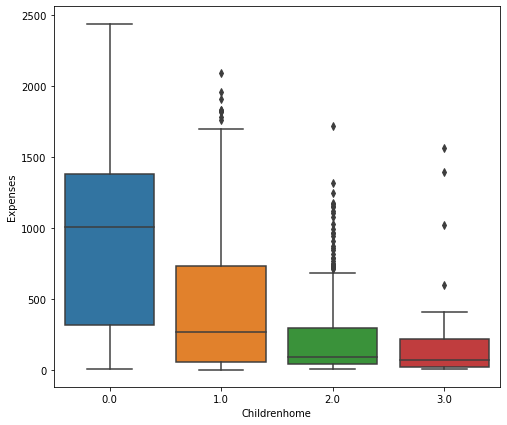

In [135]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

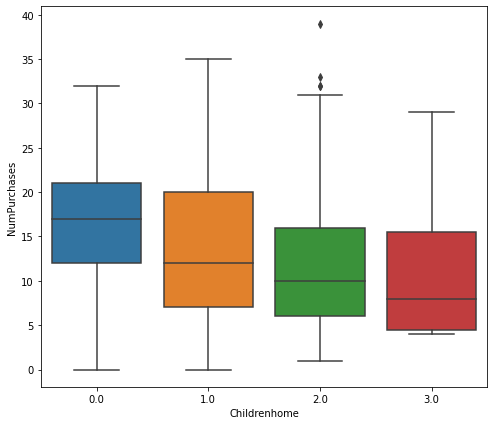

In [136]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

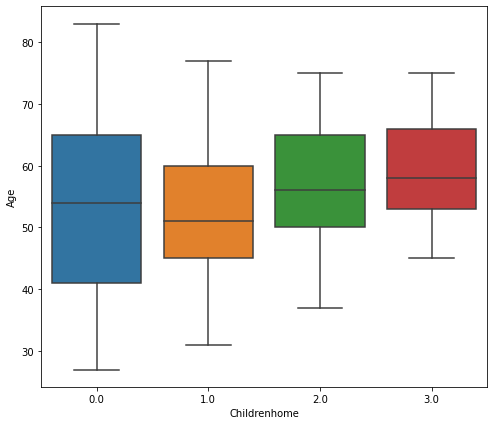

In [137]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

<AxesSubplot:xlabel='AcceptedCmp'>

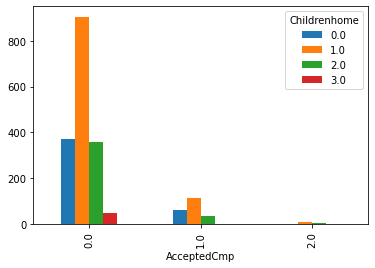

In [138]:
pd.crosstab(df3.AcceptedCmp,df3.Childrenhome).plot(kind="bar")

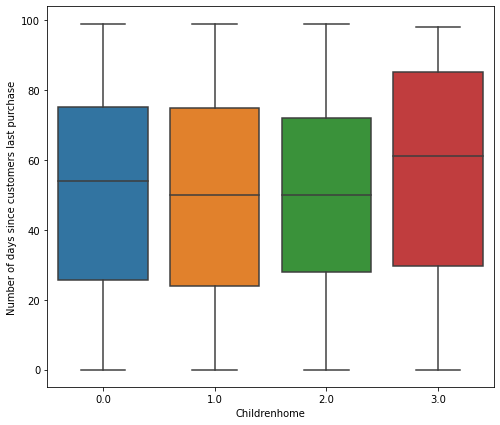

In [139]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Childrenhome', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

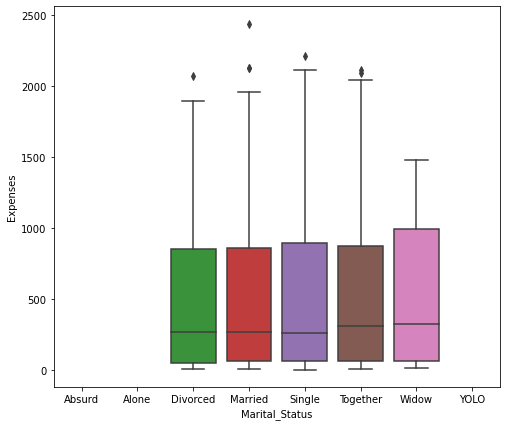

In [140]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

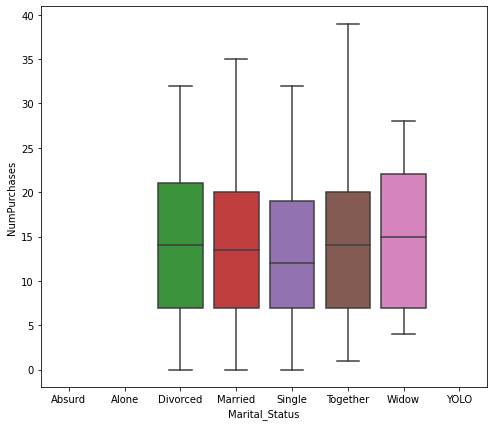

In [141]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

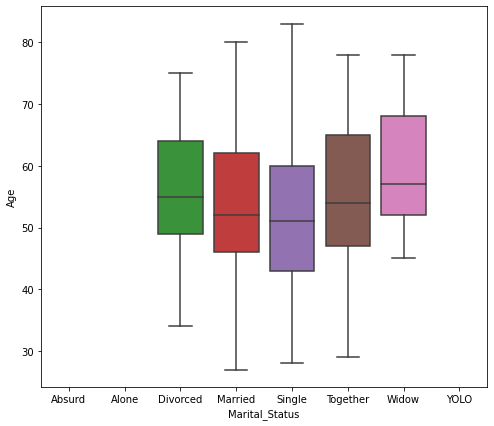

In [142]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

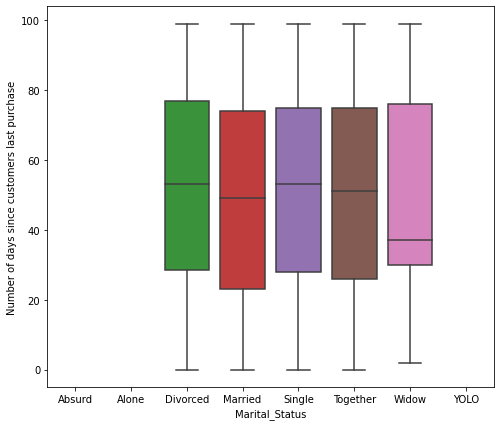

In [143]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Marital_Status', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

<AxesSubplot:xlabel='Marital_Status'>

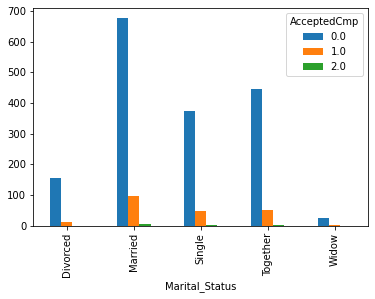

In [144]:
pd.crosstab(df3.Marital_Status,df3.AcceptedCmp).plot(kind="bar")

<AxesSubplot:xlabel='Marital_Status'>

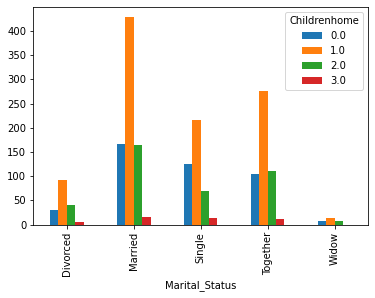

In [145]:
pd.crosstab(df3.Marital_Status,df3.Childrenhome).plot(kind="bar")

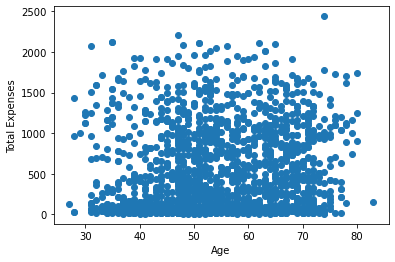

In [146]:
plt.scatter(df3.Age,df3.Expenses);
plt.xlabel('Age');
plt.ylabel('Total Expenses');

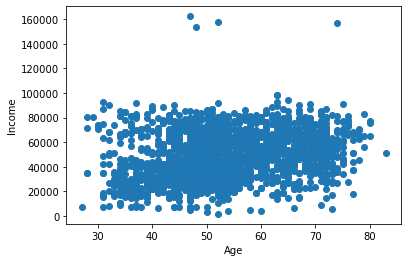

In [147]:
plt.scatter(df3.Age,df3.Income);
plt.xlabel('Age');
plt.ylabel('Income');

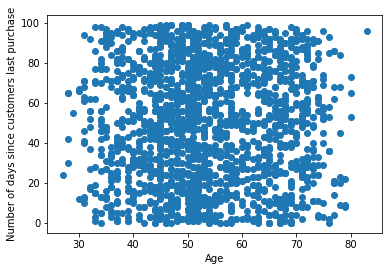

In [148]:
plt.scatter(df3.Age,df3.Recency);
plt.xlabel('Age');
plt.ylabel('Number of days since customers last purchase');

### Distribution of customers in different clusters

<AxesSubplot:ylabel='k_clusterid'>

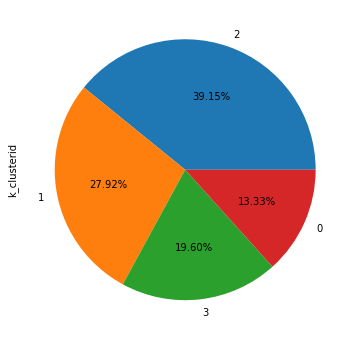

In [149]:
plt.figure(figsize=(6,6))
df3.k_clusterid.value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='k_clusterid'>

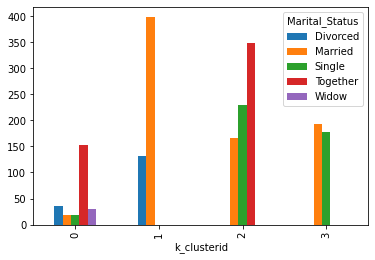

In [150]:
pd.crosstab(df3.k_clusterid,df3.Marital_Status).plot(kind="bar")

<AxesSubplot:xlabel='k_clusterid'>

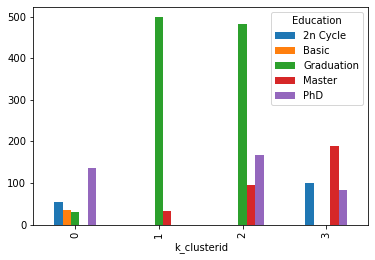

In [151]:
pd.crosstab(df3.k_clusterid,df3.Education).plot(kind="bar")

<AxesSubplot:xlabel='AcceptedCmp'>

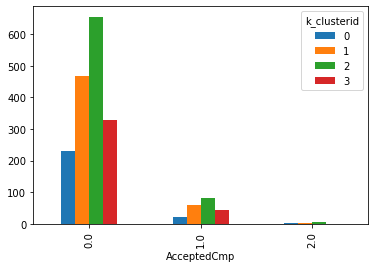

In [152]:
pd.crosstab(df3.AcceptedCmp,df3.k_clusterid).plot(kind="bar")

<AxesSubplot:xlabel='k_clusterid'>

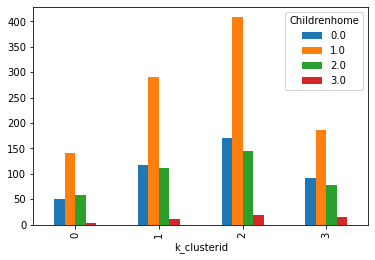

In [153]:
pd.crosstab(df3.k_clusterid,df3.Childrenhome).plot(kind="bar")

<AxesSubplot:xlabel='k_clusterid'>

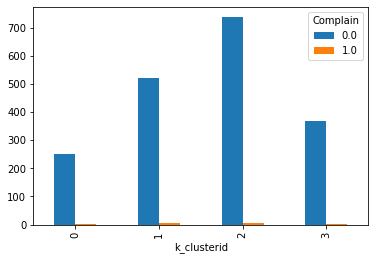

In [154]:
pd.crosstab(df3.k_clusterid,df3.Complain).plot(kind="bar")

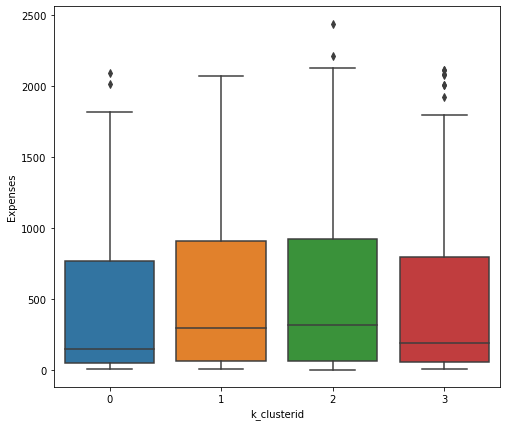

In [155]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

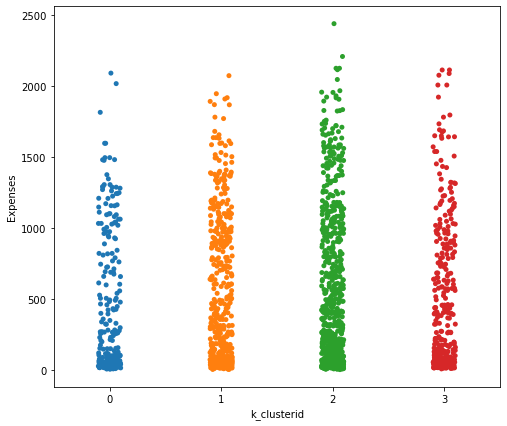

In [156]:
plt.figure(figsize=(8,7))
sns.stripplot(x='k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

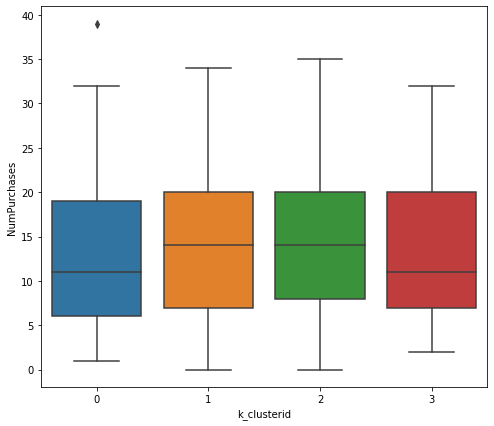

In [157]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

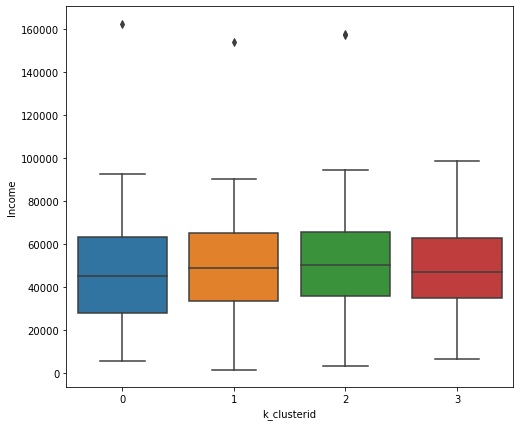

In [158]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Income', data=df3)
plt.ylabel('Income')
plt.show()

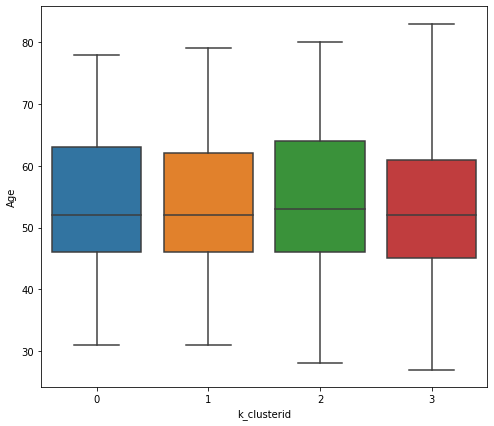

In [159]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

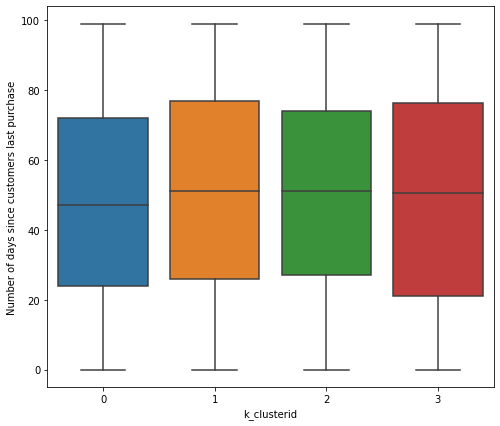

In [160]:
plt.figure(figsize=(8,7))
sns.boxplot(x='k_clusterid', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

In [161]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0     635.0       88.0            546.0  ...              0   
1      11.0        1.0              6.0  ...              0   
2     426.0       49.0            127.0  ...              0   
3      11.0        4.0             20.0  ...              0   
4     173.0       43.0            118.0  ...              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  
0                     0                    0            2  
1                     0                    0            2  
2                     0                    0            2  
3                     0                    0            2  
4                     0                    0            2  

[5 rows x 41 columns]

In [162]:
data1.tail()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
2234   8372.0      1974.0  34421.0      1.0       0.0  2013-07-01     81.0   
2235  10870.0      1967.0  61223.0      0.0       1.0  2013-06-13     46.0   
2237   7270.0      1981.0  56981.0      0.0       0.0  2014-01-25     91.0   
2238   8235.0      1956.0  69245.0      0.0       1.0  2014-01-24      8.0   
2239   9405.0      1954.0  52869.0      1.0       1.0  2012-10-15     40.0   

      MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
2234       3.0        3.0              7.0  ...              0   
2235     709.0       43.0            182.0  ...              0   
2237     908.0       48.0            217.0  ...              0   
2238     428.0       30.0            214.0  ...              0   
2239      84.0        3.0             61.0  ...              1   

      Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
2234                      0                     0                        0   
2235                      0                     0                        0   
2237                      0                     0                        1   
2238                      0                     0                        0   
2239                      0                     0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
2234                       1                      0                        0   
2235                       1                      0                        0   
2237                       0                      0                        0   
2238                       0                      0                        1   
2239                       1                      0                        0   

      Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  
2234                     0                    0            1  
2235                     0                    0            1  
2237                     0                    0            1  
2238                     0                    0            2  
2239                     0                    0            2  

[5 rows x 41 columns]

In [163]:
data1.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'k_clusterid'],
      dtype='object')

In [164]:
data1["Expenses"]=data1.MntWines+data1.MntFruits+data1.MntMeatProducts+data1.MntFishProducts+data1.MntSweetProducts+data1.MntGoldProds

In [165]:
data1["NumPurchases"]=data1.NumDealsPurchases+data1.NumWebPurchases+data1.NumCatalogPurchases+data1.NumStorePurchases

In [166]:
data1["AcceptedCmp"]=data1.AcceptedCmp1+data1.AcceptedCmp2+data1.AcceptedCmp3+data1.AcceptedCmp4+data1.AcceptedCmp5

In [167]:
data1["Childrenhome"]=data1.Kidhome+data1.Teenhome

In [168]:
data1["Age"]=(2023-data1.Year_Birth)

In [169]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Single  \
0     635.0       88.0            546.0  ...                      1   
1      11.0        1.0              6.0  ...                      1   
2     426.0       49.0            127.0  ...                      0   
3      11.0        4.0             20.0  ...                      0   
4     173.0       43.0            118.0  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   k_clusterid  Expenses  NumPurchases  AcceptedCmp  Childrenhome   Age  
0            2    1617.0          25.0          0.0           0.0  66.0  
1            2      27.0           6.0          0.0           2.0  69.0  
2            2     776.0          21.0          0.0           0.0  58.0  
3            2      53.0           8.0          0.0           1.0  39.0  
4            2     422.0          19.0          0.0           1.0  42.0  

[5 rows x 46 columns]

In [170]:
data1["clusterid"]=data1.k_clusterid

In [171]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Together  \
0     635.0       88.0            546.0  ...                        0   
1      11.0        1.0              6.0  ...                        0   
2     426.0       49.0            127.0  ...                        1   
3      11.0        4.0             20.0  ...                        1   
4     173.0       43.0            118.0  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  Expenses  \
0                     0                    0            2    1617.0   
1                     0                    0            2      27.0   
2                     0                    0            2     776.0   
3                     0                    0            2      53.0   
4                     0                    0            2     422.0   

   NumPurchases  AcceptedCmp  Childrenhome   Age  clusterid  
0          25.0          0.0           0.0  66.0          2  
1           6.0          0.0           2.0  69.0          2  
2          21.0          0.0           0.0  58.0          2  
3           8.0          0.0           1.0  39.0          2  
4          19.0          0.0           1.0  42.0          2  

[5 rows x 47 columns]

In [172]:
data1.shape

(1899, 47)

In [173]:
data1[data1["Year_Birth"]<1910]

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
239  11004.0      1893.0  60182.0      0.0       1.0  2014-05-17     23.0   

     MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Together  \
239       8.0        0.0              5.0  ...                        0   

     Marital_Status_Widow  Marital_Status_YOLO  k_clusterid  Expenses  \
239                     0                    0            3      22.0   

     NumPurchases  AcceptedCmp  Childrenhome    Age  clusterid  
239           4.0          0.0           1.0  130.0          3  

[1 rows x 47 columns]

In [174]:
data1.drop(239,axis=0,inplace=True)

In [175]:
data1.shape

(1898, 47)

In [176]:
data1.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'k_clusterid', 'Expenses', 'NumPurchases',
       'AcceptedCmp', 'Childrenhome', 'Age', 'clusterid'],
      dtype='object')

In [177]:
data1.drop(['Z_CostContact', 'Z_Revenue', 'k_clusterid'],axis=1,inplace=True)

In [178]:
data1.drop(['Dt_Customer'],axis=1,inplace=True)

In [179]:
data1.shape

(1898, 43)

In [180]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0       88.0            546.0            172.0  ...                      1   
1        1.0              6.0              2.0  ...                      1   
2       49.0            127.0            111.0  ...                      0   
3        4.0             20.0             10.0  ...                      0   
4       43.0            118.0             46.0  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome   Age  clusterid  
0    1617.0          25.0          0.0           0.0  66.0          2  
1      27.0           6.0          0.0           2.0  69.0          2  
2     776.0          21.0          0.0           0.0  58.0          2  
3      53.0           8.0          0.0           1.0  39.0          2  
4     422.0          19.0          0.0           1.0  42.0          2  

[5 rows x 43 columns]

In [181]:
data2 = data1.copy()

In [182]:
data2.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0       88.0            546.0            172.0  ...                      1   
1        1.0              6.0              2.0  ...                      1   
2       49.0            127.0            111.0  ...                      0   
3        4.0             20.0             10.0  ...                      0   
4       43.0            118.0             46.0  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome   Age  clusterid  
0    1617.0          25.0          0.0           0.0  66.0          2  
1      27.0           6.0          0.0           2.0  69.0          2  
2     776.0          21.0          0.0           0.0  58.0          2  
3      53.0           8.0          0.0           1.0  39.0          2  
4     422.0          19.0          0.0           1.0  42.0          2  

[5 rows x 43 columns]

In [183]:
data2.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age', 'clusterid'],
      dtype='object')

In [184]:
data2.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases','AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',],axis=1,inplace=True)

In [185]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524.0  58138.0     58.0                7.0       0.0       1.0   
1  2174.0  46344.0     38.0                5.0       0.0       0.0   
2  4141.0  71613.0     26.0                4.0       0.0       0.0   
3  6182.0  26646.0     26.0                6.0       0.0       0.0   
4  5324.0  58293.0     94.0                5.0       0.0       0.0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  
0          0.0           0.0  66.0          2  
1          0.0           2.0  69.0          2  
2          0.0           0.0  58.0          2  
3          0.0           1.0  39.0          2  
4          0.0           1.0  42.0          2  

[5 rows x 25 columns]

In [186]:
data2.shape

(1898, 25)

## Baseline Models - Entire Dataset

In [187]:
data1.shape

(1898, 43)

In [188]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0       88.0            546.0            172.0  ...                      1   
1        1.0              6.0              2.0  ...                      1   
2       49.0            127.0            111.0  ...                      0   
3        4.0             20.0             10.0  ...                      0   
4       43.0            118.0             46.0  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome   Age  clusterid  
0    1617.0          25.0          0.0           0.0  66.0          2  
1      27.0           6.0          0.0           2.0  69.0          2  
2     776.0          21.0          0.0           0.0  58.0          2  
3      53.0           8.0          0.0           1.0  39.0          2  
4     422.0          19.0          0.0           1.0  42.0          2  

[5 rows x 43 columns]

In [189]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1898 non-null   float64
 1   Year_Birth               1898 non-null   float64
 2   Income                   1898 non-null   float64
 3   Kidhome                  1898 non-null   float64
 4   Teenhome                 1898 non-null   float64
 5   Recency                  1898 non-null   float64
 6   MntWines                 1898 non-null   float64
 7   MntFruits                1898 non-null   float64
 8   MntMeatProducts          1898 non-null   float64
 9   MntFishProducts          1898 non-null   float64
 10  MntSweetProducts         1898 non-null   float64
 11  MntGoldProds             1898 non-null   float64
 12  NumDealsPurchases        1898 non-null   float64
 13  NumWebPurchases          1898 non-null   float64
 14  NumCatalogPurchases     

## 1) Logistic Regression

In [190]:
# Dividing our data into input and output variables 
x=data1.iloc[:,1:37]
y=data1.iloc[:,42]

In [191]:
x

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0         1957.0  58138.0      0.0       0.0     58.0     635.0       88.0   
1         1954.0  46344.0      1.0       1.0     38.0      11.0        1.0   
2         1965.0  71613.0      0.0       0.0     26.0     426.0       49.0   
3         1984.0  26646.0      1.0       0.0     26.0      11.0        4.0   
4         1981.0  58293.0      1.0       0.0     94.0     173.0       43.0   
...          ...      ...      ...       ...      ...       ...        ...   
2234      1974.0  34421.0      1.0       0.0     81.0       3.0        3.0   
2235      1967.0  61223.0      0.0       1.0     46.0     709.0       43.0   
2237      1981.0  56981.0      0.0       0.0     91.0     908.0       48.0   
2238      1956.0  69245.0      0.0       1.0      8.0     428.0       30.0   
2239      1954.0  52869.0      1.0       1.0     40.0      84.0        3.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0               546.0            172.0              88.0  ...   
1                 6.0              2.0               1.0  ...   
2               127.0            111.0              21.0  ...   
3                20.0             10.0               3.0  ...   
4               118.0             46.0              27.0  ...   
...               ...              ...               ...  ...   
2234              7.0              6.0               2.0  ...   
2235            182.0             42.0             118.0  ...   
2237            217.0             32.0              12.0  ...   
2238            214.0             80.0              30.0  ...   
2239             61.0              2.0               1.0  ...   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
0                    0              0                      0   
1                    0              0                      0   
2                    0              0                      0   
3                    0              0                      0   
4                    0              1                      0   
...                ...            ...                    ...   
2234                 0              0                      0   
2235                 0              0                      0   
2237                 0              0                      0   
2238                 1              0                      0   
2239                 0              1                      0   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   
...                    ...                      ...                     ...   
2234                     0                        0                       1   
2235                     0                        0                       1   
2237                     0                        1                       0   
2238                     0                        0                       0   
2239                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         0                        1                     0   
3                         0                        1                     0   
4                         0                        0                     0   
...                     ...                      ...                   ...   
2234                    

In [192]:
y

0       2
1       2
2       2
3       2
4       2
       ..
2234    1
2235    1
2237    1
2238    2
2239    2
Name: clusterid, Length: 1898, dtype: int32

## Test-Train Split

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [194]:
x_train.shape

(1328, 36)

In [195]:
y_train.shape

(1328,)

In [196]:
x_test.shape

(570, 36)

In [197]:
y_test.shape

(570,)

## Logistic regression and fit the model

In [198]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [199]:
classifier.intercept_

array([-3.51010547e-08,  1.02875079e-09,  8.91202350e-08, -5.50479311e-08])

In [200]:
classifier.coef_

array([[-6.95381656e-05, -1.04094378e-05, -1.46212928e-06,
        -3.27573714e-07, -2.81625098e-05,  5.54715563e-04,
        -1.25219129e-04, -3.10312282e-04,  2.32347354e-04,
         1.03718233e-04, -7.70945246e-05, -1.62458786e-05,
        -1.54194636e-06,  7.71602468e-06,  1.01595430e-06,
        -3.61577204e-06,  8.11792731e-07, -9.59080935e-07,
        -4.71732787e-07, -7.67022144e-07,  4.05714137e-07,
        -4.27189774e-07, -2.61772799e-06,  5.28406819e-06,
         6.61871448e-06, -2.11158694e-05, -9.40322565e-06,
         1.85812113e-05,  0.00000000e+00,  0.00000000e+00,
         1.62581448e-06, -1.87059677e-05, -8.04317864e-06,
         1.84059374e-05,  6.68229342e-06,  0.00000000e+00],
       [-2.59361193e-05,  5.74984767e-06, -3.50642173e-06,
         4.85800582e-06, -1.00644314e-04, -6.63015068e-04,
         3.67907663e-04,  4.51065523e-04,  8.97224408e-05,
         4.10961857e-04,  6.06882744e-04,  1.01289659e-05,
         2.16303119e-05,  2.56870217e-06,  1.01927033e-

## Model Accuracy on Training Dataset

In [201]:
y_train_pred=classifier.predict(x_train)

In [202]:
data1_logistic_train_ac=ac(y_train,y_train_pred)
data1_logistic_train_ac

0.39683734939759036

In [203]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(x_train)})
y_train_pred_df

actual  predicted_values
5          2                 2
1279       1                 2
1490       2                 2
100        3                 2
2150       3                 2
...      ...               ...
1149       2                 2
1442       2                 2
654        1                 2
1941       2                 2
1110       1                 2

[1328 rows x 2 columns]

## Model Accuracy on Testing Dataset

In [204]:
y_test_pred=classifier.predict(x_test)

In [205]:
data1_logistic_test_ac=ac(y_test,y_test_pred)
data1_logistic_test_ac

0.37894736842105264

In [206]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(x_test)})
y_test_pred_df

actual  predicted_values
1816       0                 2
1650       1                 2
1790       2                 2
1200       1                 2
1519       2                 2
...      ...               ...
80         2                 2
318        1                 2
287        2                 2
1607       3                 2
926        1                 2

[570 rows x 2 columns]

In [207]:
data1_logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_logistic_test_ac*100,2)]})
data1_logistic_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  39.68                 37.89

## Confusion Matrix for the model accuracy

In [208]:
confusion_matrix(y_test_pred,y_test)

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [ 74, 166, 216, 114],
       [  0,   0,   0,   0]], dtype=int64)

## Classification report

In [209]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.38      0.55       570
           3       0.00      0.00      0.00         0

    accuracy                           0.38       570
   macro avg       0.25      0.09      0.14       570
weighted avg       1.00      0.38      0.55       570



## 2) Decision Tree

In [210]:
# Dividing our data into input and output variables 
x=data1.iloc[:,1:37]
y=data1.iloc[:,42]

In [211]:
# Splitting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Building Decision Tree Classifier using gini Criteria

In [212]:
model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=40)

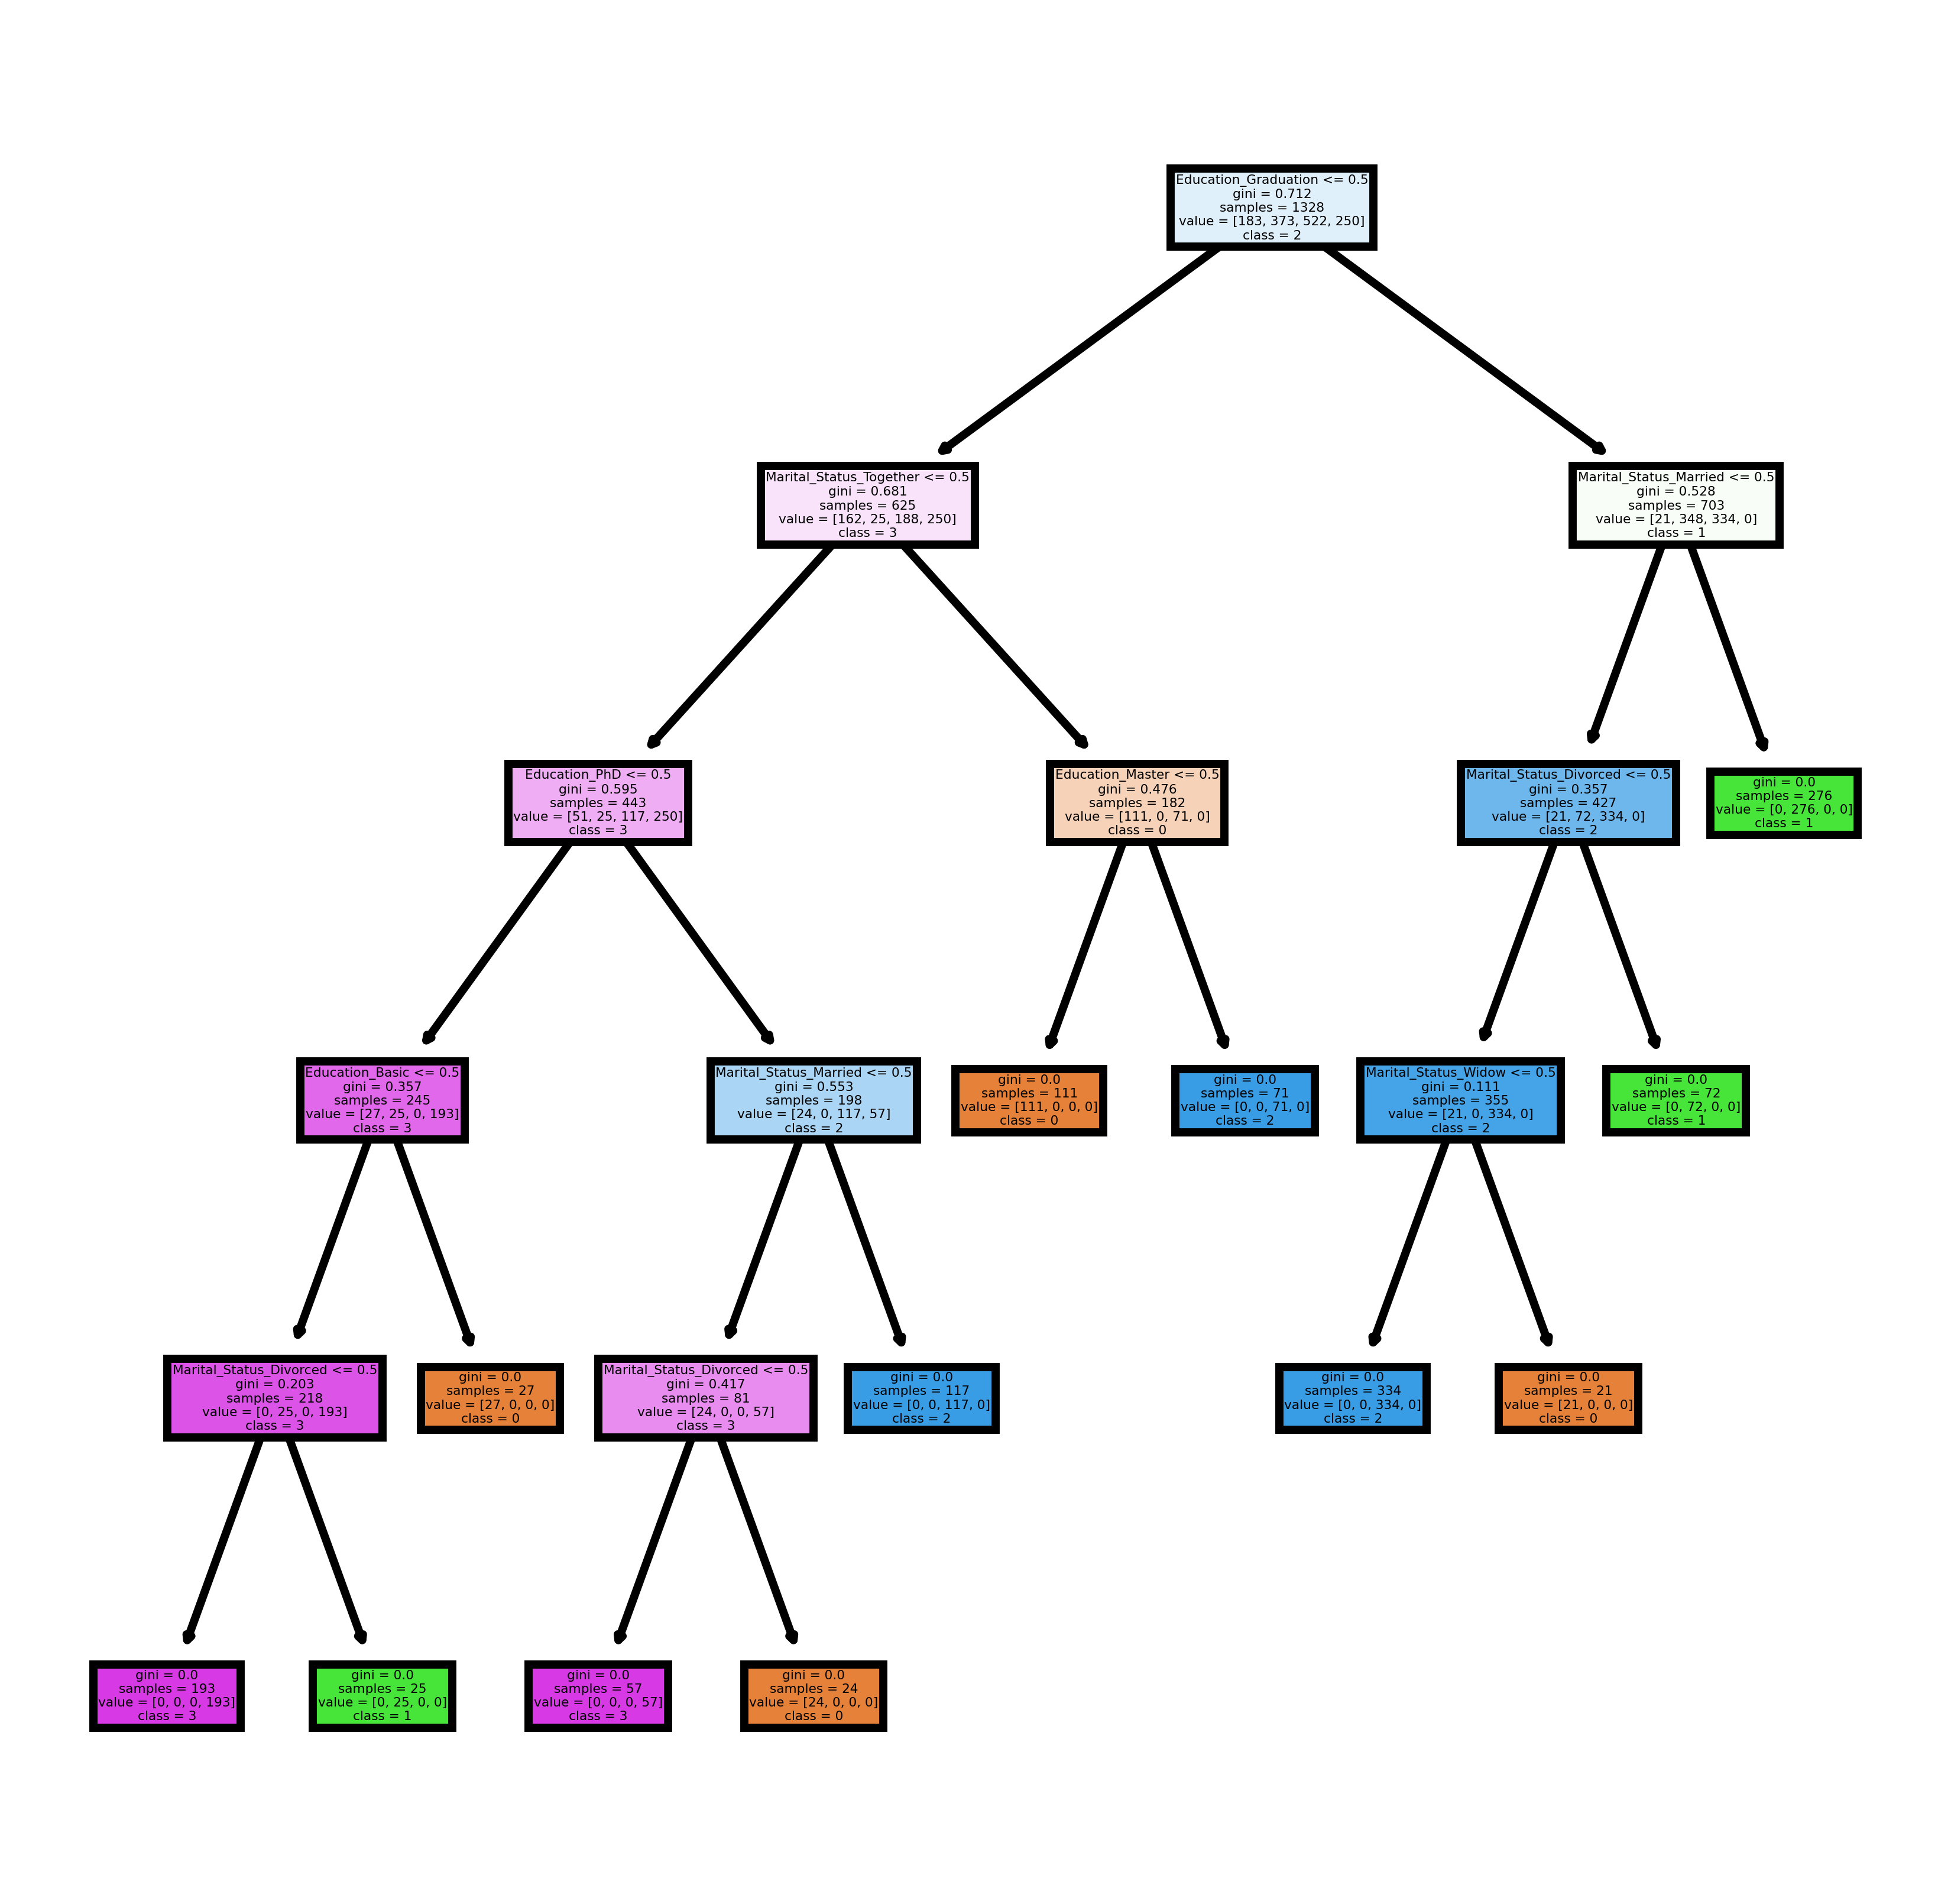

In [213]:
fn=['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [214]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

2    221
1    157
3    122
0     70
dtype: int64

In [215]:
data1_DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data1_DT1_test_ac

1.0

## Model Accuracy on Training Dataset

In [216]:
y_train_pred = model.predict(x_train)
data1_DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data1_DT1_train_ac

1.0

In [217]:
data1_DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_DT1_test_ac*100,2)]})
data1_DT1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## Building Decision Tree Classifier using entropy Criteria

In [218]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

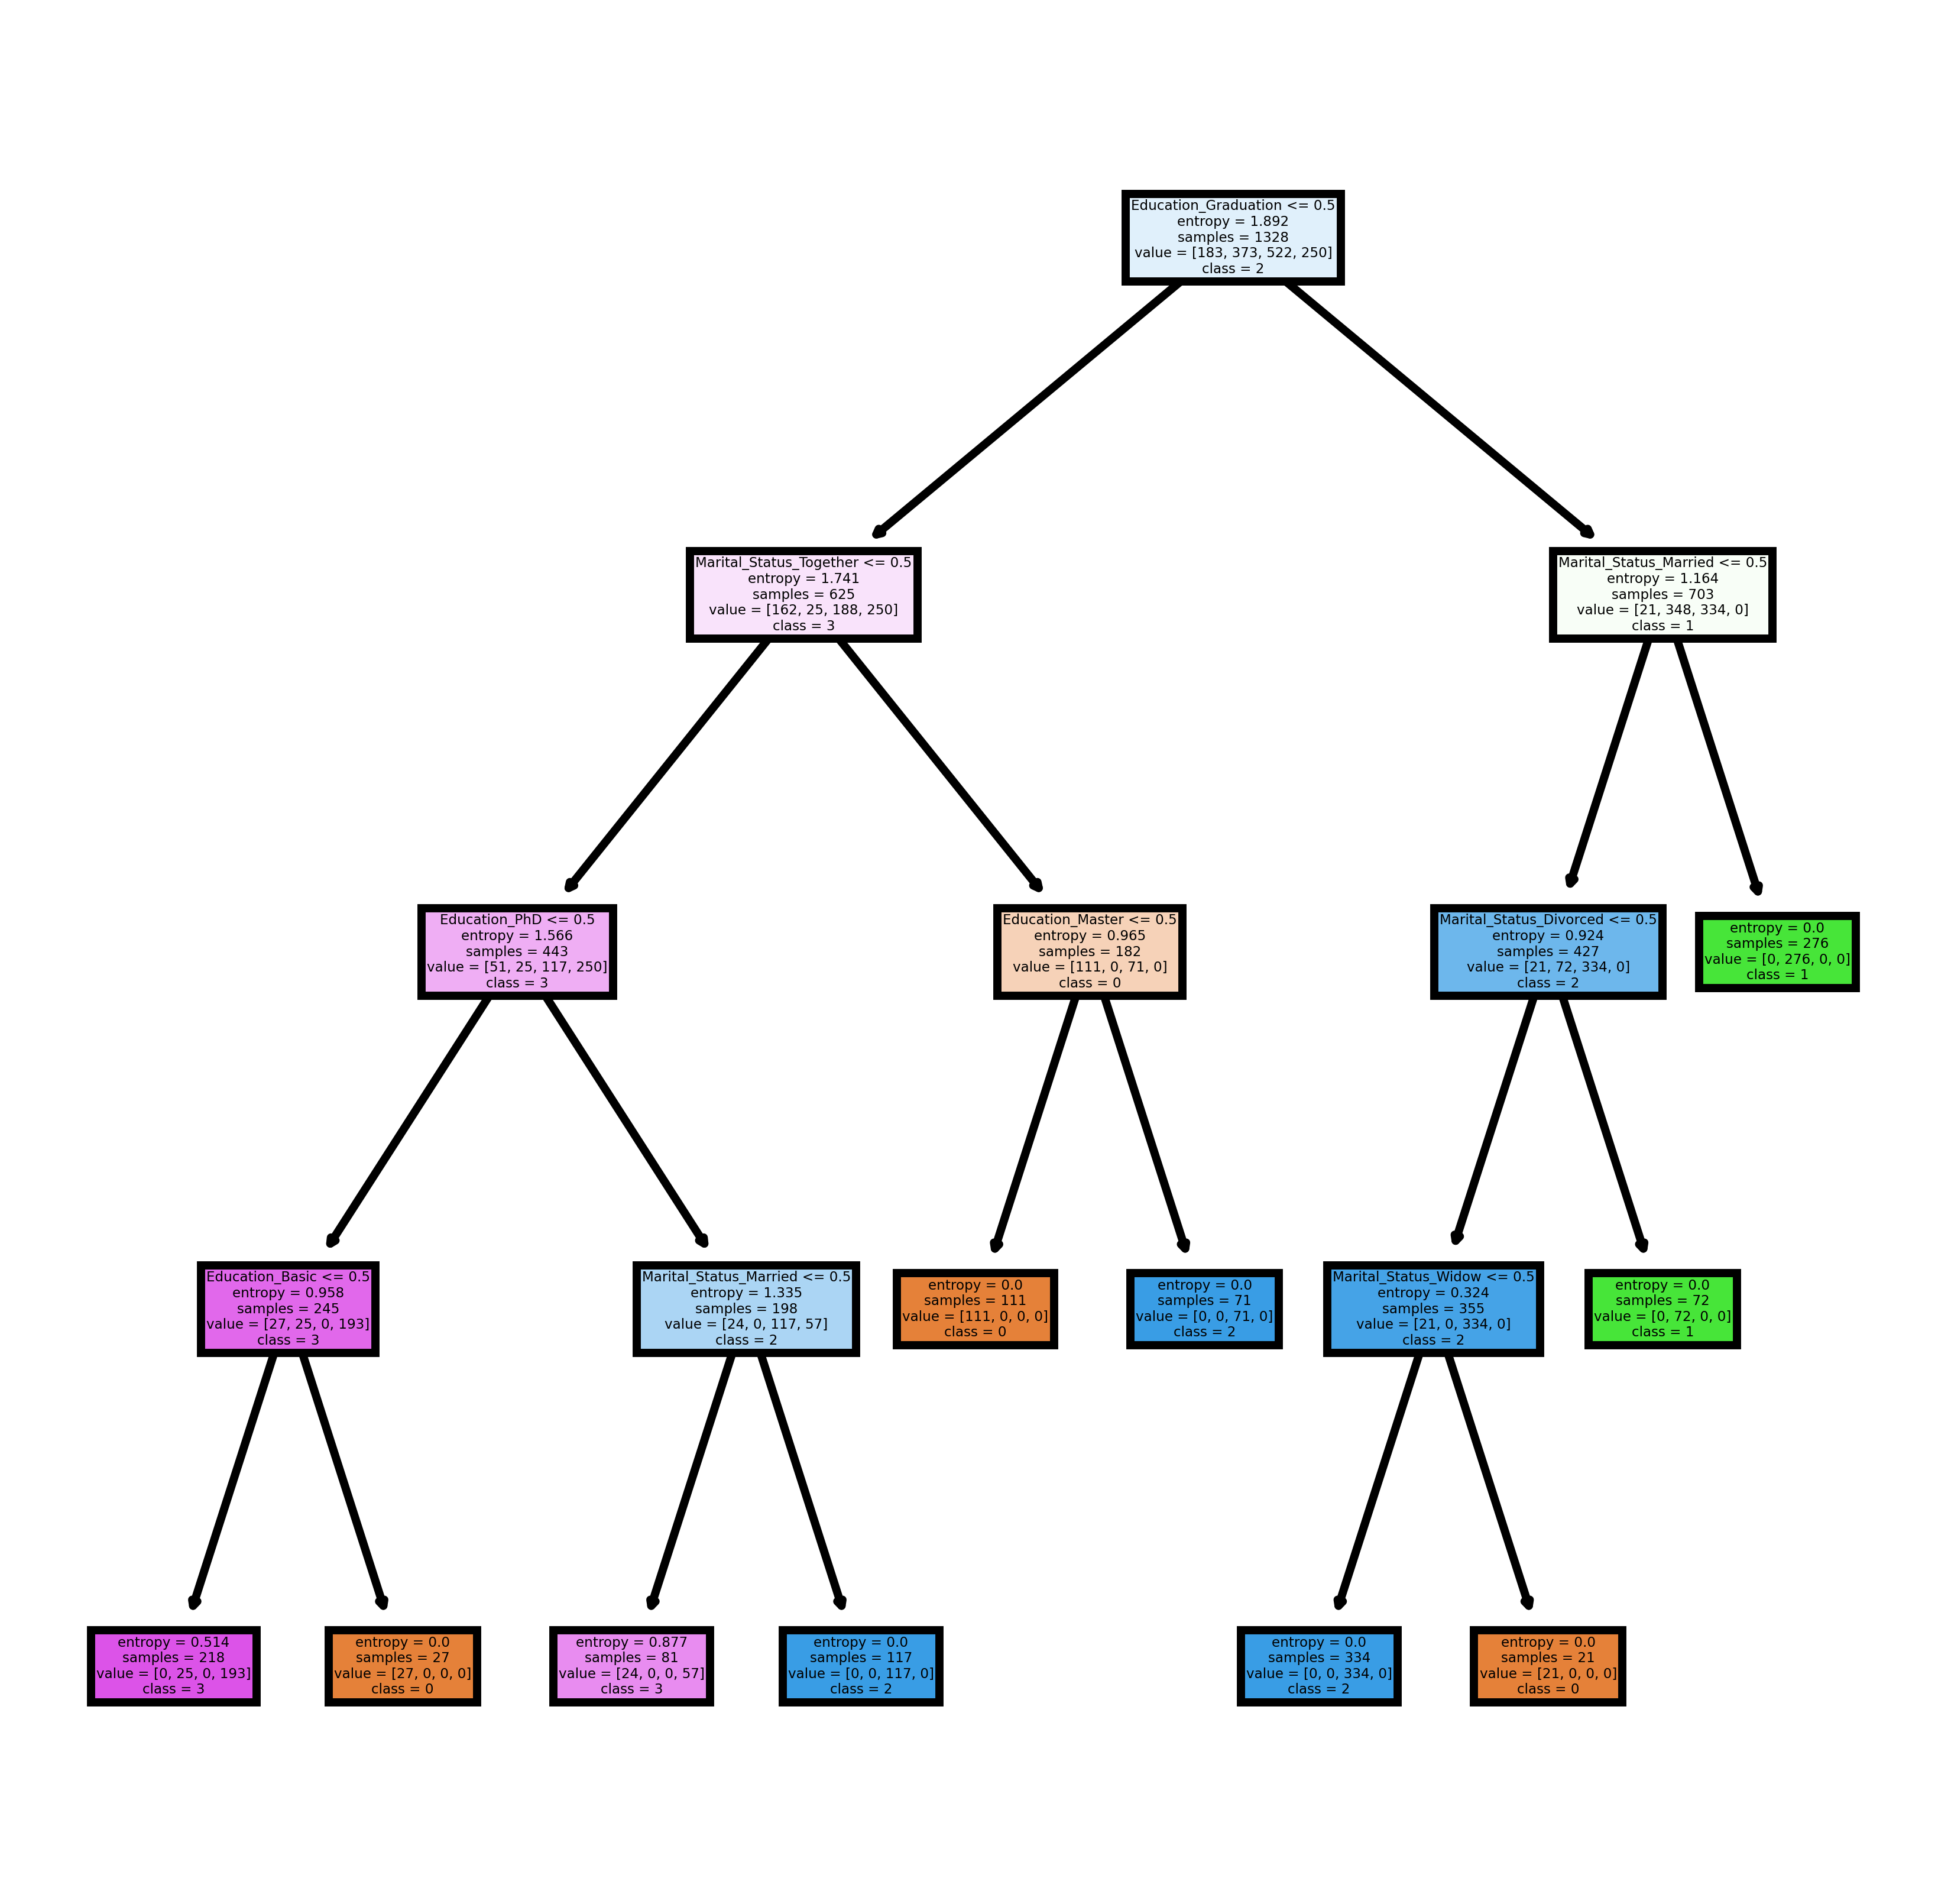

In [219]:
fn=['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [220]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

2    221
1    150
3    140
0     59
dtype: int64

In [221]:
data1_DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data1_DT2_test_ac

0.968421052631579

## Model Accuracy on Training Dataset

In [222]:
y_train_pred = model.predict(x_train)
data1_DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data1_DT2_train_ac

0.9631024096385542

In [223]:
data1_DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_DT2_test_ac*100,2)]})
data1_DT2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  96.31                 96.84

## 3) Random Forests

In [224]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

## Building Random Forest Classifier

In [225]:
num_trees = 200
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [226]:
results = cross_val_score(model, X, Y, cv=10)
data1_RF_test_ac=results.mean()
data1_RF_test_ac

1.0

## 4) Boosting

In [227]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

## Building AdaBoost Classifier

In [228]:
num_trees = 40
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [229]:
results = cross_val_score(model, X, Y, cv=10)
data1_Boosting_test_ac=results.mean()
data1_Boosting_test_ac

0.8124477861319968

## Visualising the CV results

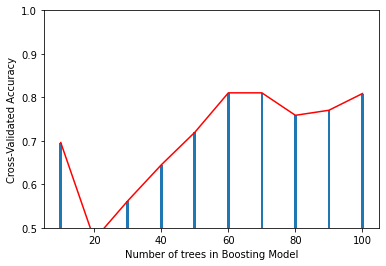

In [230]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [231]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [232]:
X

array([[1.9570e+03, 5.8138e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 4.6344e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9650e+03, 7.1613e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9810e+03, 5.6981e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9560e+03, 6.9245e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 5.2869e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [233]:
Y

array([2., 2., 2., ..., 1., 2., 2.])

In [234]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

## KNN Model Building

In [235]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [236]:
pred=model.predict(x_test)
data1_KNN_test_ac=accuracy_score(pred,y_test)
data1_KNN_test_ac

0.3333333333333333

## Grid Search for Algorithm Tuning

In [237]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [238]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [239]:
print(grid.best_score_)
print(grid.best_params_)

0.39622135814470216
{'n_neighbors': 1}


## Visualising the CV results

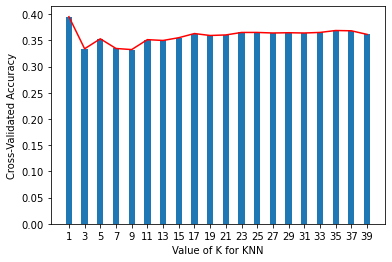

In [240]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [241]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [243]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 36), (1328,), (570, 36), (570,))

In [244]:
clf = SVC(kernel="rbf",gamma=0.002)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  48.421052631578945


array([[ 10,   1,  64,   0],
       [  0,  29, 124,   1],
       [  1,   3, 226,   0],
       [  0,   1,  99,  11]], dtype=int64)

In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.13      0.23        75
         1.0       0.85      0.19      0.31       154
         2.0       0.44      0.98      0.61       230
         3.0       0.92      0.10      0.18       111

    accuracy                           0.48       570
   macro avg       0.78      0.35      0.33       570
weighted avg       0.71      0.48      0.39       570



## Grid Search CV (Hyperparameter tuning)

In [246]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [247]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.44501631437083267)

### Building model using best parameters obtained in Grid Search CV

In [248]:
# Test data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
data1_SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data1_SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 48.771929824561404


array([[  9,   0,  66,   0],
       [  0,  28, 126,   0],
       [  0,   0, 230,   0],
       [  0,   0, 100,  11]], dtype=int64)

In [249]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
data1_SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data1_SVM_train_ac)

Accuracy = 100.0


In [250]:
data1_SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data1_SVM_test_ac,2)]})
data1_SVM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 48.77

## 7) Naive Bayes

In [251]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [253]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 36), (1328,), (570, 36), (570,))

### Multinomial Naive Bayes

In [254]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [255]:
y_pred = classifier_mb.predict(X_test)
data1_NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data1_NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 32.98245614035088


array([[39,  6, 15, 15],
       [59, 27, 42, 26],
       [73, 25, 79, 53],
       [25,  8, 35, 43]], dtype=int64)

In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.20      0.52      0.29        75
         1.0       0.41      0.18      0.25       154
         2.0       0.46      0.34      0.39       230
         3.0       0.31      0.39      0.35       111

    accuracy                           0.33       570
   macro avg       0.35      0.36      0.32       570
weighted avg       0.38      0.33      0.33       570



### Train data accuracy

In [257]:
y_pred_train = classifier_mb.predict(X_train)
data1_NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data1_NB1_train_ac)

Accuracy = 31.626506024096386


In [258]:
data1_NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data1_NB1_test_ac,2)]})
data1_NB1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  31.63                 32.98

### Gaussian Naive Bayes

In [259]:
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)

GaussianNB()

### Test data accuracy

In [260]:
y_pred = classifier_gb.predict(X_test)
data1_NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data1_NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 75.08771929824562


array([[ 39,   8,  13,  15],
       [  0, 140,   8,   6],
       [  0,  13, 171,  46],
       [  0,   9,  24,  78]], dtype=int64)

In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.52      0.68        75
         1.0       0.82      0.91      0.86       154
         2.0       0.79      0.74      0.77       230
         3.0       0.54      0.70      0.61       111

    accuracy                           0.75       570
   macro avg       0.79      0.72      0.73       570
weighted avg       0.78      0.75      0.75       570



### Train data accuracy

In [262]:
y_pred_train = classifier_gb.predict(X_train)
data1_NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data1_NB2_train_ac)

Accuracy = 76.20481927710844


In [263]:
data1_NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data1_NB2_test_ac,2)]})
data1_NB2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                   76.2                 75.09

## 8) Gradient Boosting

In [264]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [266]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 36), (1328,), (570, 36), (570,))

## Gradient Boosting Model Building

In [267]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [268]:
y_pred = gb_classifier.predict(X_test)
data1_GB_test_ac=accuracy_score(y_pred,y_test)
data1_GB_test_ac

1.0

In [269]:
y_pred_train = gb_classifier.predict(X_train)
data1_GB_train_ac = accuracy_score(y_train, y_pred_train)
data1_GB_train_ac

1.0

In [270]:
data1_GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_GB_test_ac*100,2)]})
data1_GB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## 9) XGBoost

In [271]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [273]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 36), (1328,), (570, 36), (570,))

## XGBoost Model Building

In [274]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softmax', ...)

In [275]:
y_pred = xgb_classifier.predict(X_test)
data1_XGB_test_ac=accuracy_score(y_pred,y_test)
data1_XGB_test_ac

1.0

In [276]:
y_pred_train = xgb_classifier.predict(X_train)
data1_XGB_train_ac = accuracy_score(y_train, y_pred_train)
data1_XGB_train_ac

1.0

In [277]:
data1_XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_XGB_test_ac*100,2)]})
data1_XGB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

In [278]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
data1_XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", data1_XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0


## 10) LightGBM

In [279]:
array = data1.values
X = array[:,1:37]
Y = array[:,42]

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [281]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 36), (1328,), (570, 36), (570,))

## LightGBM Model Building

In [282]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [283]:
y_pred = lgbm_classifier.predict(X_test)
data1_LGBM_test_ac=accuracy_score(y_pred,y_test)
data1_LGBM_test_ac

1.0

In [284]:
y_pred_train = lgbm_classifier.predict(X_train)
data1_LGBM_train_ac = accuracy_score(y_train, y_pred_train)
data1_LGBM_train_ac

1.0

In [285]:
data1_LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data1_LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data1_LGBM_test_ac*100,2)]})
data1_LGBM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

In [286]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0


## Classification Models - Transformed Data

In [287]:
data2.shape

(1898, 25)

In [288]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524.0  58138.0     58.0                7.0       0.0       1.0   
1  2174.0  46344.0     38.0                5.0       0.0       0.0   
2  4141.0  71613.0     26.0                4.0       0.0       0.0   
3  6182.0  26646.0     26.0                6.0       0.0       0.0   
4  5324.0  58293.0     94.0                5.0       0.0       0.0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  
0          0.0           0.0  66.0          2  
1          0.0           2.0  69.0          2  
2          0.0           0.0  58.0          2  
3          0.0           1.0  39.0          2  
4          0.0           1.0  42.0          2  

[5 rows x 25 columns]

In [289]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1898 non-null   float64
 1   Income                   1898 non-null   float64
 2   Recency                  1898 non-null   float64
 3   NumWebVisitsMonth        1898 non-null   float64
 4   Complain                 1898 non-null   float64
 5   Response                 1898 non-null   float64
 6   Education_2n Cycle       1898 non-null   uint8  
 7   Education_Basic          1898 non-null   uint8  
 8   Education_Graduation     1898 non-null   uint8  
 9   Education_Master         1898 non-null   uint8  
 10  Education_PhD            1898 non-null   uint8  
 11  Marital_Status_Absurd    1898 non-null   uint8  
 12  Marital_Status_Alone     1898 non-null   uint8  
 13  Marital_Status_Divorced  1898 non-null   uint8  
 14  Marital_Status_Married  

## 1) Logistic Regression

In [290]:
# Dividing our data into input and output variables 
x=data2.iloc[:,1:24]
y=data2.iloc[:,24]

In [291]:
x

Income  Recency  NumWebVisitsMonth  Complain  Response  \
0     58138.0     58.0                7.0       0.0       1.0   
1     46344.0     38.0                5.0       0.0       0.0   
2     71613.0     26.0                4.0       0.0       0.0   
3     26646.0     26.0                6.0       0.0       0.0   
4     58293.0     94.0                5.0       0.0       0.0   
...       ...      ...                ...       ...       ...   
2234  34421.0     81.0                7.0       0.0       0.0   
2235  61223.0     46.0                5.0       0.0       0.0   
2237  56981.0     91.0                6.0       0.0       0.0   
2238  69245.0      8.0                3.0       0.0       0.0   
2239  52869.0     40.0                7.0       0.0       1.0   

      Education_2n Cycle  Education_Basic  Education_Graduation  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     0   
...                  ...              ...                   ...   
2234                   0                0                     1   
2235                   0                0                     1   
2237                   0                0                     1   
2238                   0                0                     0   
2239                   0                0                     0   

      Education_Master  Education_PhD  ...  Marital_Status_Married  \
0                    0              0  ...                       0   
1                    0              0  ...                       0   
2                    0              0  ...                       0   
3                    0              0  ...                       0   
4                    0              1  ...                       1   
...                ...            ...  ...                     ...   
2234                 0              0  ...                       1   
2235                 0              0  ...                       1   
2237                 0              0  ...                       0   
2238                 1              0  ...                       0   
2239                 0              1  ...                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         0                        1                     0   
3                         0                        1                     0   
4                         0                        0                     0   
...                     ...                      ...                   ...   
2234                      0                        0                     0   
2235                      0                        0                     0   
2237                      0                        0                     0   
2238                      0                        1                     0   
2239                      0                        0                     0   

      Marital_Status_YOLO  Expenses  NumPurchases  AcceptedCmp  Childrenhome  \
0                       0    1617.0          25.0          0.0           0.0   
1                       0      27.0           6.0          0.0           2.0   
2                       0     776.0          21.0          0.0           0.0   
3                       0      53.0           8.0          0.0           1.0   
4                       0     422.0          19.0          0.0           1.0   
...                   ...       ...           ...          ...           ...   
2234                    0      30.0           4.0          0.0           1.0   
223

In [292]:
y

0       2
1       2
2       2
3       2
4       2
       ..
2234    1
2235    1
2237    1
2238    2
2239    2
Name: clusterid, Length: 1898, dtype: int32

## Test-Train Split

In [293]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [294]:
x_train.shape

(1328, 23)

In [295]:
y_train.shape

(1328,)

In [296]:
x_test.shape

(570, 23)

In [297]:
y_test.shape

(570,)

## Logistic regression and fit the model

In [298]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [299]:
classifier.intercept_

array([-5.65800508e-06, -1.35484223e-05,  4.21115949e-05, -2.29051676e-05])

In [300]:
classifier.coef_

array([[-1.27825509e-05, -3.45789635e-04, -9.38357201e-05,
        -4.73037958e-06, -1.95267440e-05,  5.66594883e-05,
         5.95445910e-05, -1.94210527e-04, -7.96350770e-05,
         1.51983521e-04,  0.00000000e+00,  0.00000000e+00,
         1.73303422e-05, -1.57315688e-04, -7.61964551e-05,
         1.60600934e-04,  4.99228622e-05,  0.00000000e+00,
         1.49448011e-04, -1.88849711e-04, -6.26520048e-06,
        -1.06430291e-05, -2.49152519e-05],
       [ 5.42249091e-06, -1.83206471e-04, -5.49861183e-05,
         4.69026191e-06, -1.79366745e-05, -8.82501116e-05,
        -1.96803124e-05,  3.89053347e-04, -1.04173544e-04,
        -1.90497800e-04,  0.00000000e+00,  0.00000000e+00,
         1.67282360e-04,  3.20696076e-04, -2.29192751e-04,
        -2.56748538e-04, -1.55855668e-05,  0.00000000e+00,
        -1.36337725e-04,  1.20843617e-04, -6.04377049e-06,
        -2.49932138e-05, -6.11865671e-04],
       [ 3.11871734e-06,  3.04864402e-03,  5.00992376e-04,
        -1.00277430e-06,  2.0

## Model Accuracy on Training Dataset

In [301]:
y_train_pred=classifier.predict(x_train)

In [302]:
data2_logistic_train_ac=ac(y_train,y_train_pred)
data2_logistic_train_ac

0.40286144578313254

In [303]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(x_train)})
y_train_pred_df

actual  predicted_values
692        2                 2
1747       3                 2
1656       2                 2
1635       2                 2
2048       2                 2
...      ...               ...
1540       2                 2
1956       2                 2
1651       2                 2
1780       0                 2
566        2                 2

[1328 rows x 2 columns]

## Model Accuracy on Testing Dataset

In [304]:
y_test_pred=classifier.predict(x_test)

In [305]:
data2_logistic_test_ac=ac(y_test,y_test_pred)
data2_logistic_test_ac

0.3631578947368421

In [306]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(x_test)})
y_test_pred_df

actual  predicted_values
1215       2                 2
540        0                 2
1696       0                 2
936        2                 2
1867       2                 2
...      ...               ...
1938       3                 2
84         1                 2
1289       1                 2
1151       2                 2
1527       2                 2

[570 rows x 2 columns]

In [307]:
data2_logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_logistic_test_ac*100,2)]})
data2_logistic_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  40.29                 36.32

## Confusion Matrix for the model accuracy

In [308]:
confusion_matrix(y_test_pred,y_test)

array([[  0,   0,   0,   0],
       [  0,   0,   1,   0],
       [ 79, 177, 207, 106],
       [  0,   0,   0,   0]], dtype=int64)

## Classification report

In [309]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.36      0.53       569
           3       0.00      0.00      0.00         0

    accuracy                           0.36       570
   macro avg       0.25      0.09      0.13       570
weighted avg       0.99      0.36      0.53       570



## 2) Decision Tree

In [310]:
# Dividing our data into input and output variables 
x=data2.iloc[:,1:24]
y=data2.iloc[:,24]

In [311]:
# Splitting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Building Decision Tree Classifier using gini Criteria

In [312]:
model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=40)

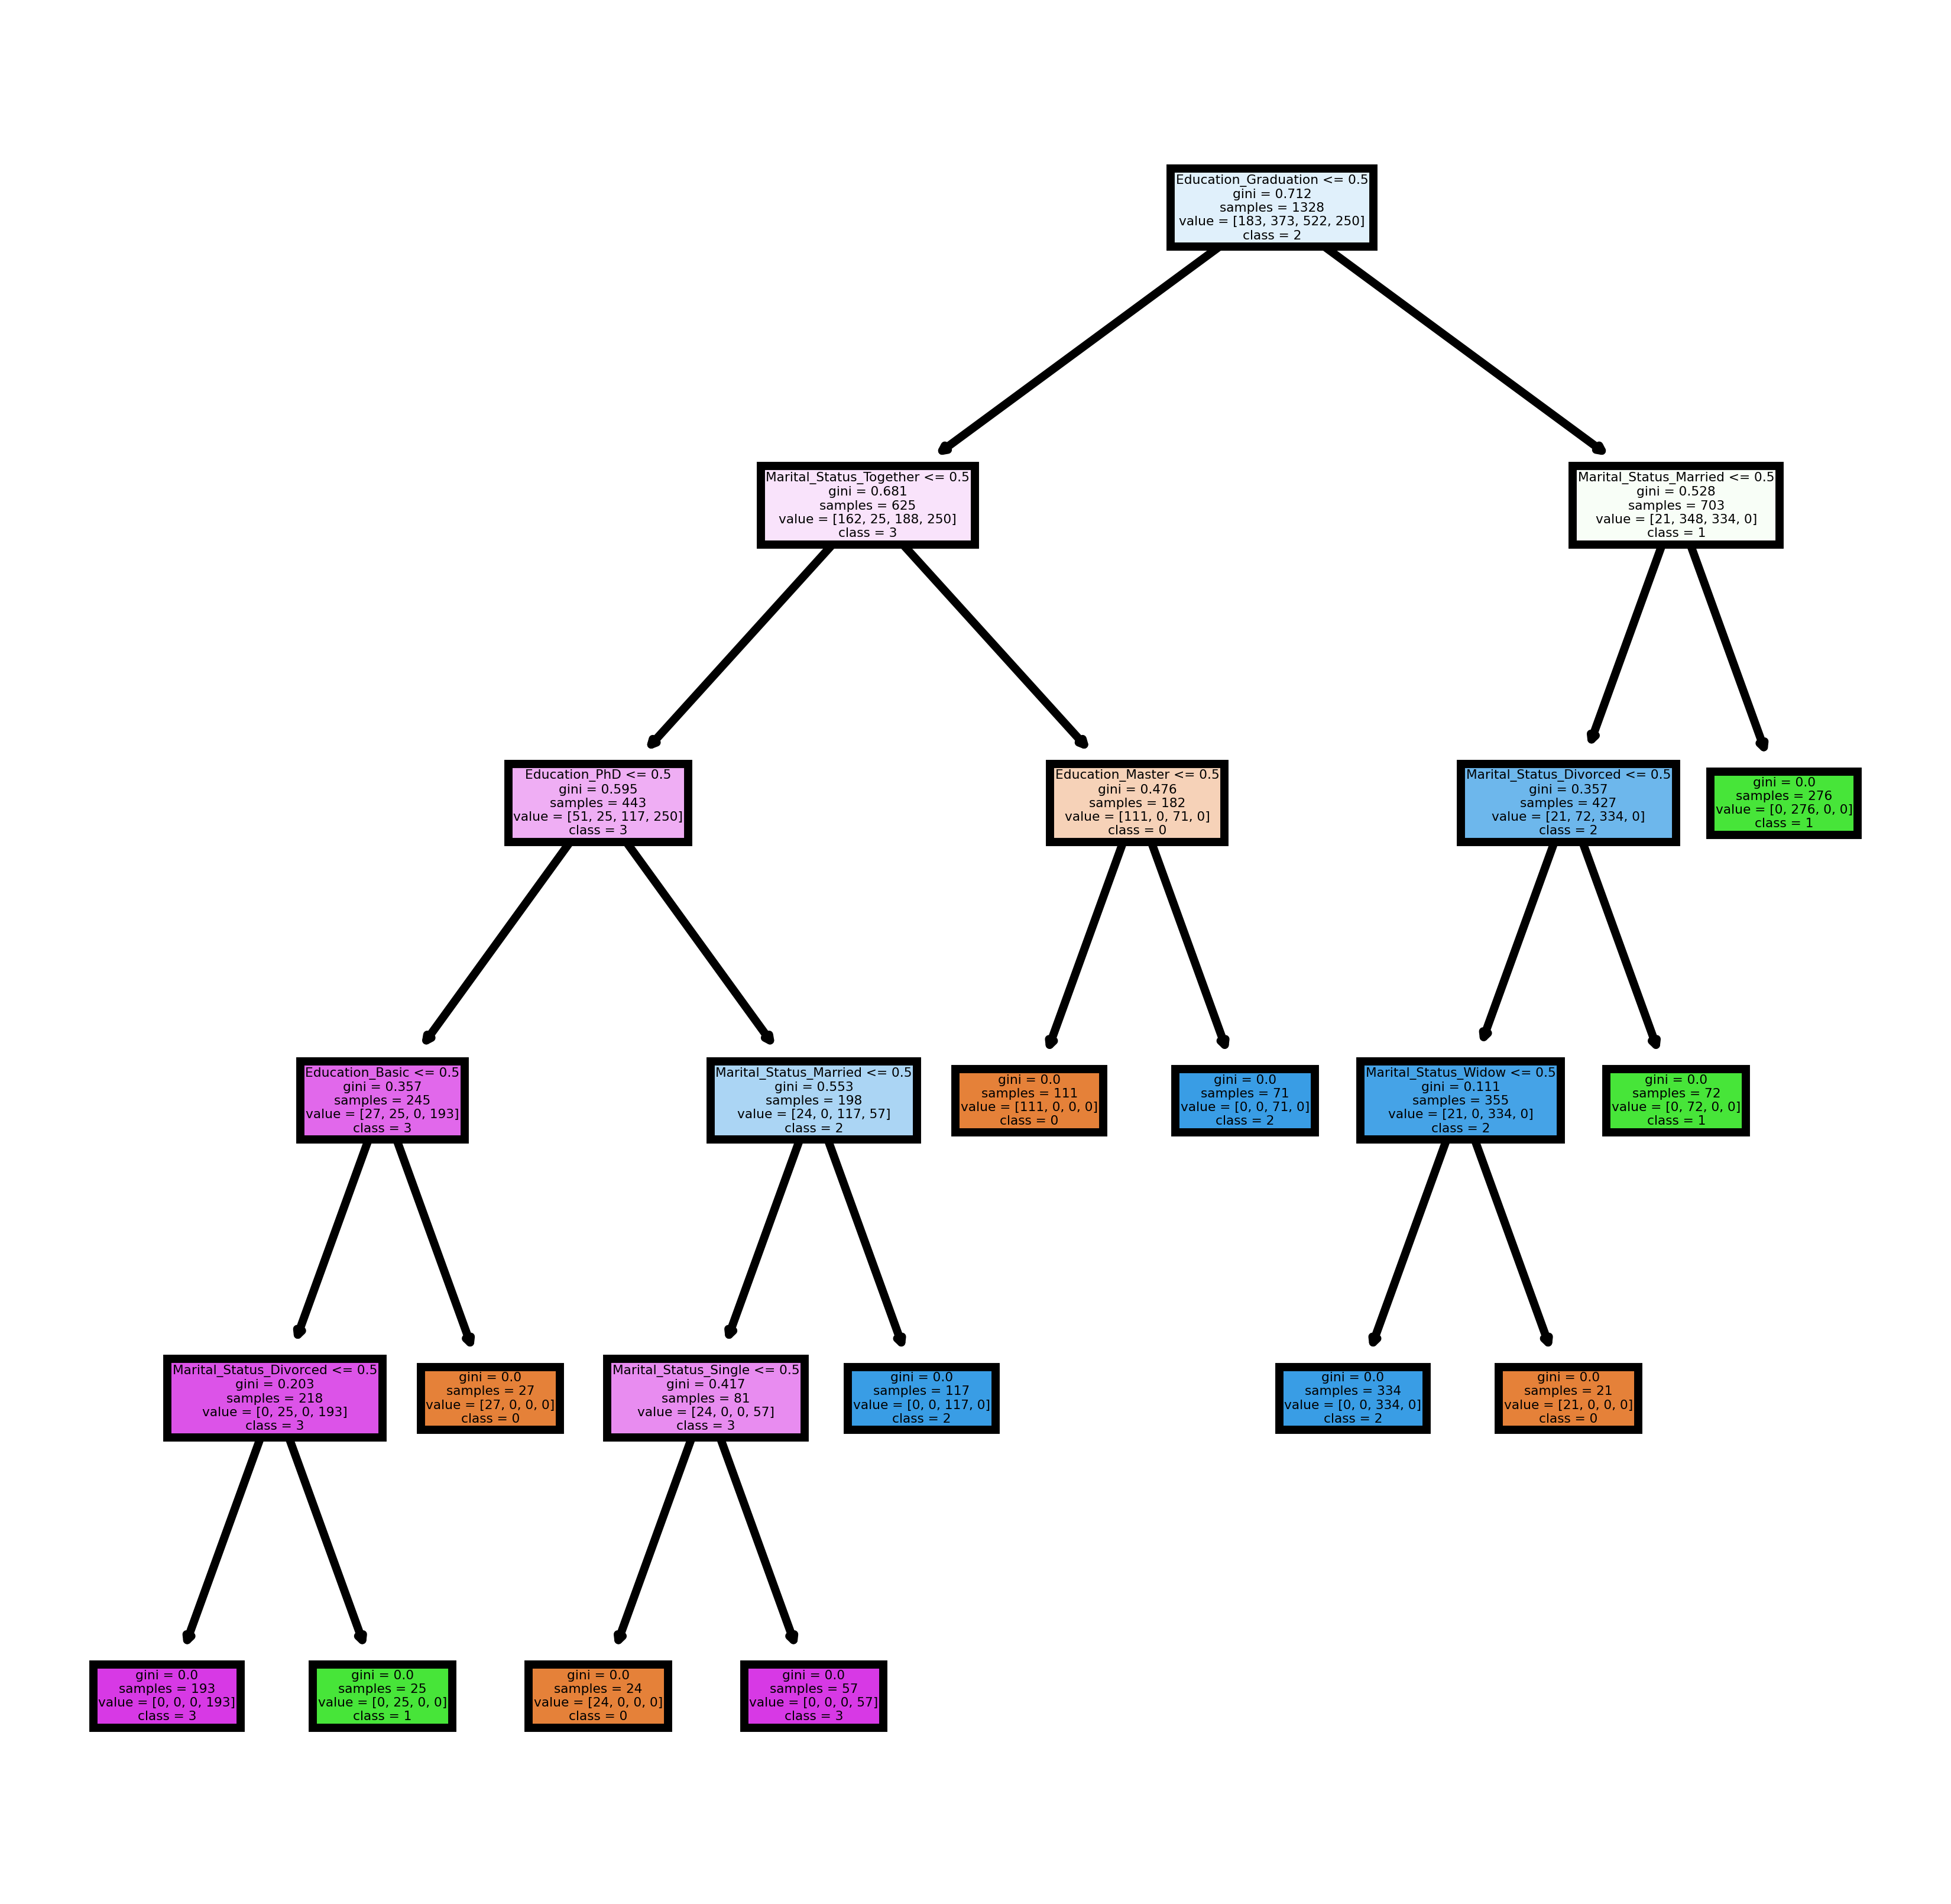

In [313]:
fn=['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [314]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

2    221
1    157
3    122
0     70
dtype: int64

In [315]:
data2_DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data2_DT1_test_ac

1.0

## Model Accuracy on Training Dataset

In [316]:
y_train_pred = model.predict(x_train)
data2_DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data2_DT1_train_ac

1.0

In [317]:
data2_DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_DT1_test_ac*100,2)]})
data2_DT1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## Building Decision Tree Classifier using entropy Criteria

In [318]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

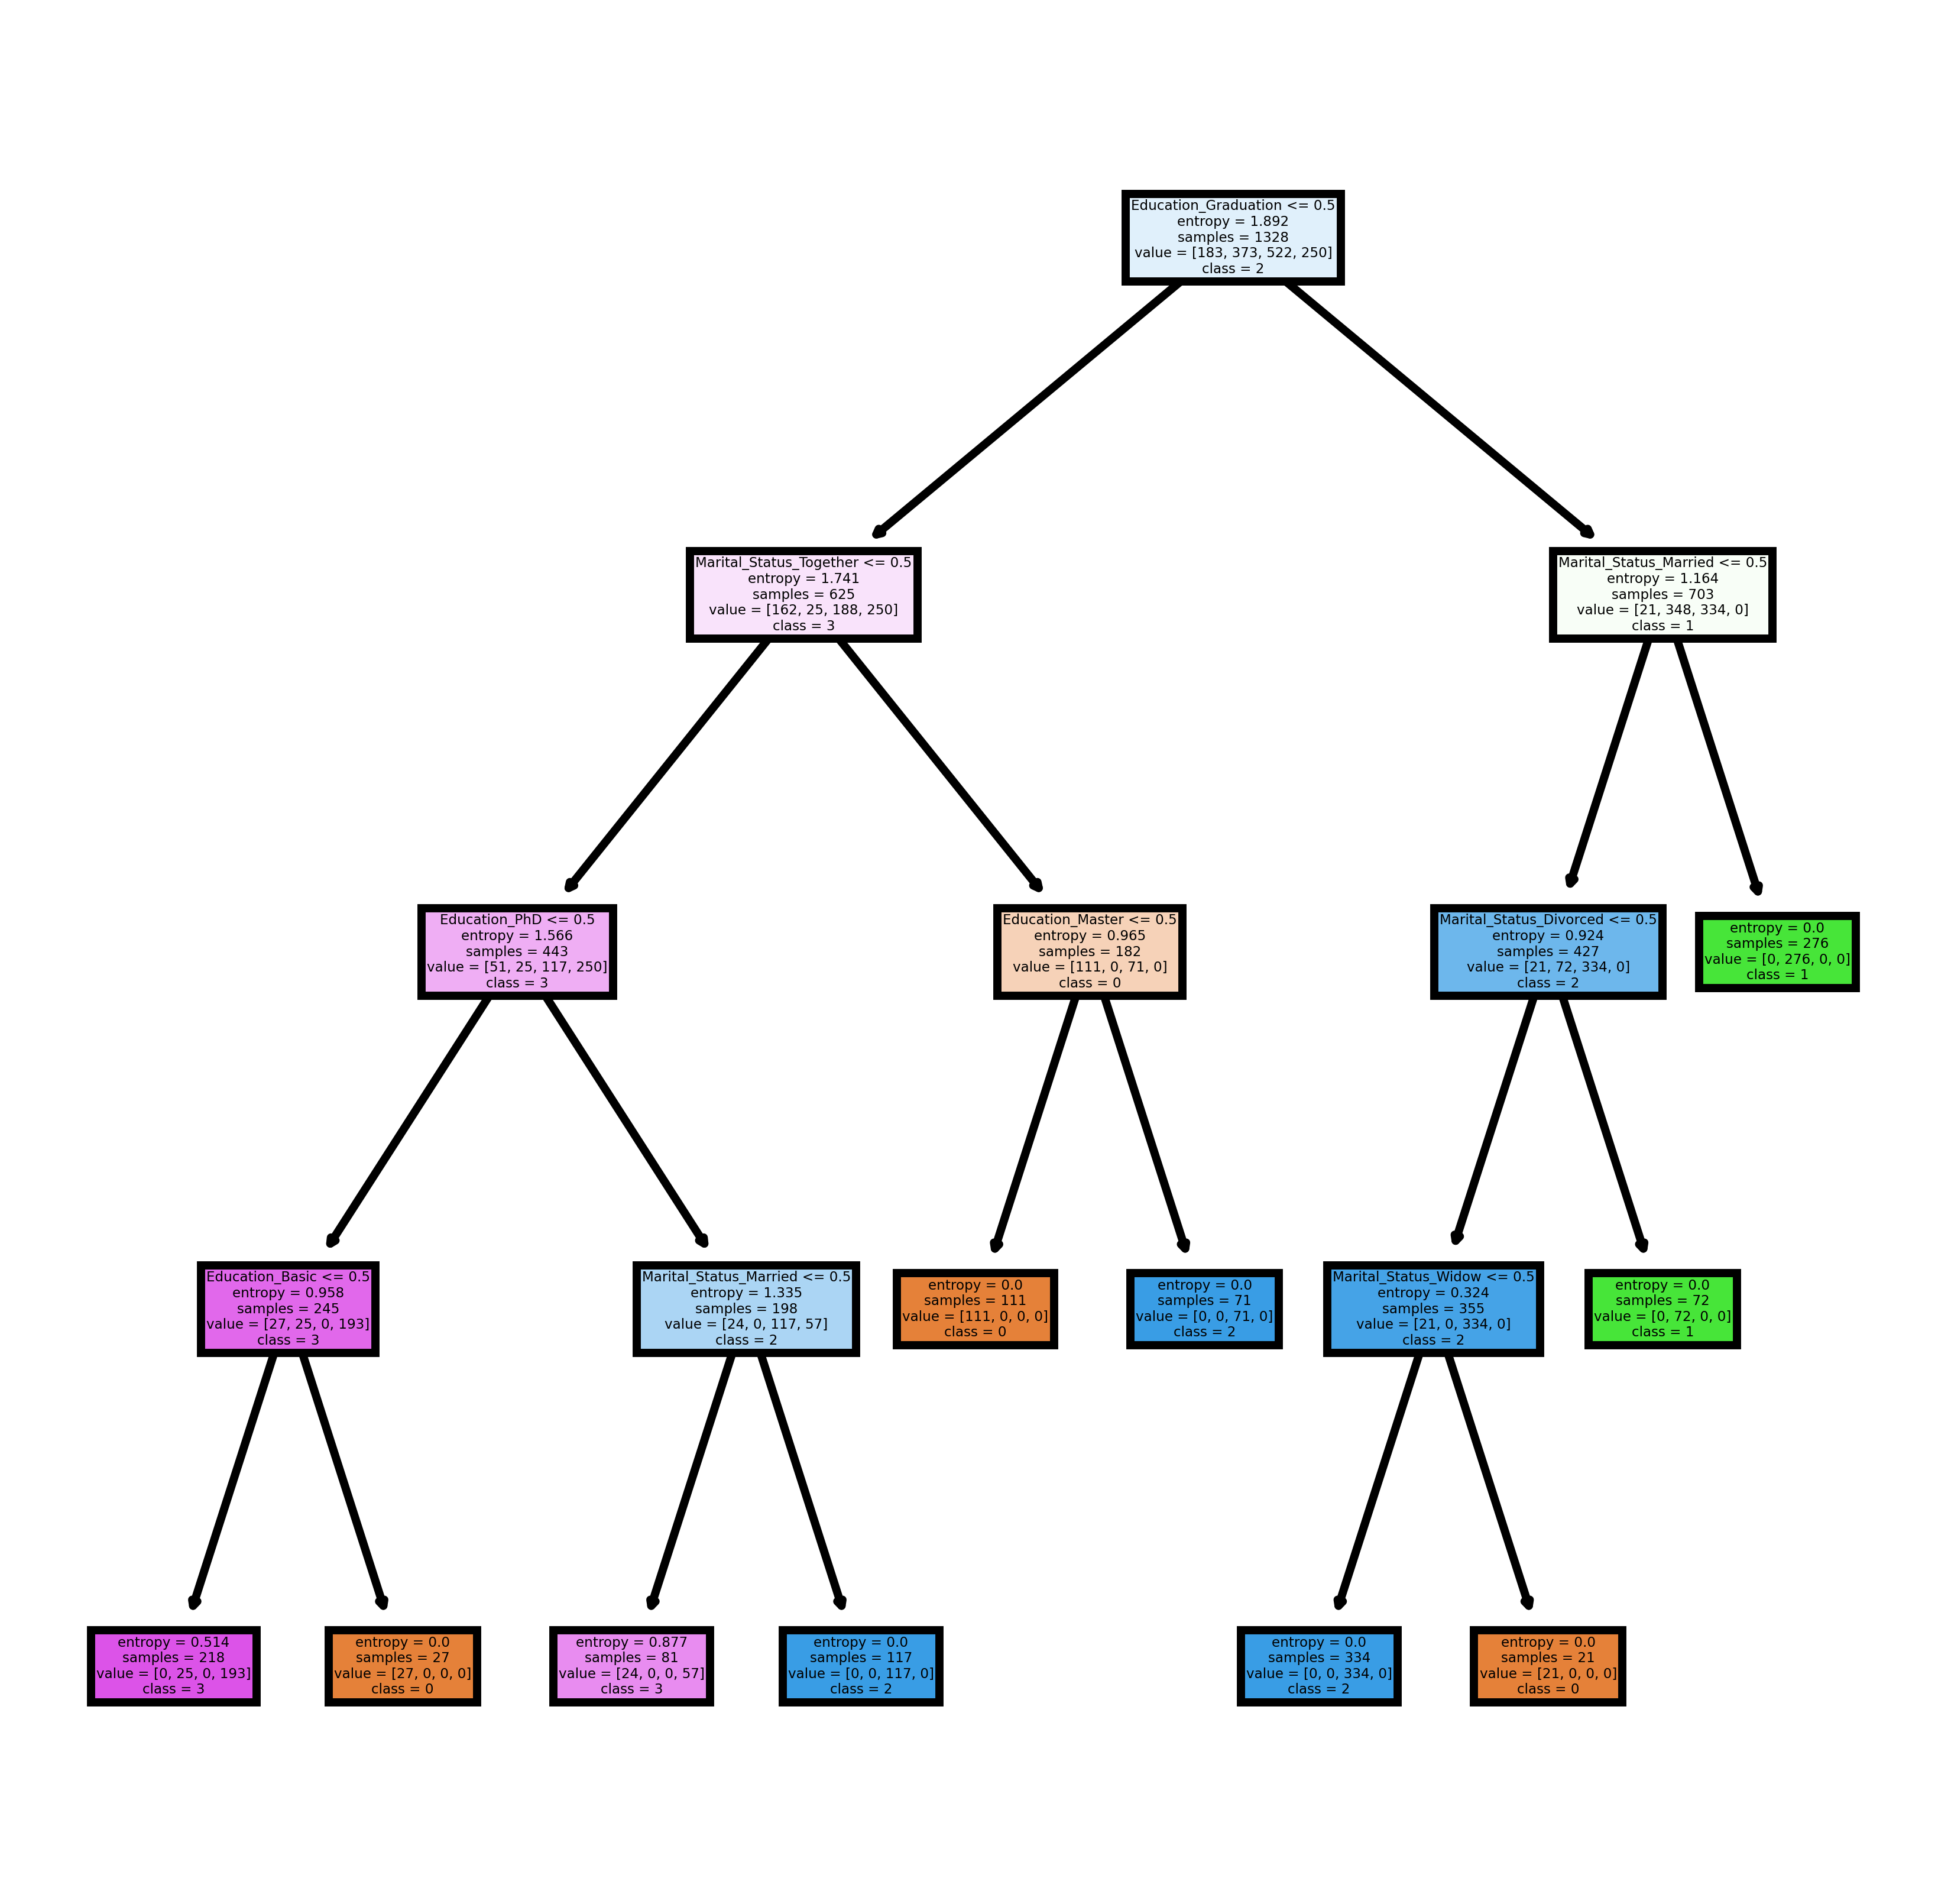

In [319]:
fn=['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Expenses', 'NumPurchases', 'AcceptedCmp',
       'Childrenhome', 'Age']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [320]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

2    221
1    150
3    140
0     59
dtype: int64

In [321]:
data2_DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
data2_DT2_test_ac

0.968421052631579

## Model Accuracy on Training Dataset

In [322]:
y_train_pred = model.predict(x_train)
data2_DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
data2_DT2_train_ac

0.9631024096385542

In [323]:
data2_DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_DT2_test_ac*100,2)]})
data2_DT2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  96.31                 96.84

## 3) Random Forests

In [324]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

## Building Random Forest Classifier

In [325]:
num_trees = 200
max_features = 5

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [326]:
results = cross_val_score(model, X, Y, cv=10)
data2_RF_test_ac=results.mean()
data2_RF_test_ac

1.0

## 4) Boosting

In [327]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

## Building AdaBoost Classifier

In [328]:
num_trees = 40
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [329]:
results = cross_val_score(model, X, Y, cv=10)
data2_Boosting_test_ac=results.mean()
data2_Boosting_test_ac

0.8124477861319968

## Visualising the CV results

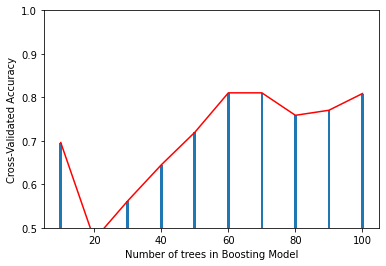

In [330]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [331]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [332]:
X

array([[5.8138e+04, 5.8000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        6.6000e+01],
       [4.6344e+04, 3.8000e+01, 5.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        6.9000e+01],
       [7.1613e+04, 2.6000e+01, 4.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        5.8000e+01],
       ...,
       [5.6981e+04, 9.1000e+01, 6.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        4.2000e+01],
       [6.9245e+04, 8.0000e+00, 3.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        6.7000e+01],
       [5.2869e+04, 4.0000e+01, 7.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        6.9000e+01]])

In [333]:
Y

array([2., 2., 2., ..., 1., 2., 2.])

In [334]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

## KNN Model Building

In [335]:
model = KNeighborsClassifier(n_neighbors=21)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [336]:
pred=model.predict(x_test)
data2_KNN_test_ac=accuracy_score(pred,y_test)
data2_KNN_test_ac

0.35964912280701755

## Grid Search for Algorithm Tuning

In [337]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [338]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [339]:
print(grid.best_score_)
print(grid.best_params_)

0.3914872934314679
{'n_neighbors': 1}


## Visualising the CV results

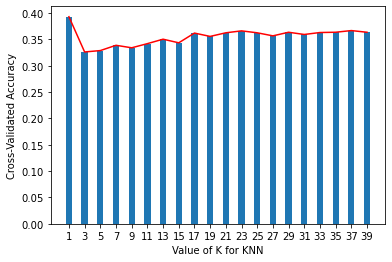

In [340]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [341]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [343]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 23), (1328,), (570, 23), (570,))

In [344]:
clf = SVC(kernel="rbf",gamma=0.002)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  47.89473684210526


array([[ 10,   1,  63,   1],
       [  0,  29, 125,   0],
       [  2,   3, 223,   2],
       [  0,   1,  99,  11]], dtype=int64)

In [345]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.13      0.23        75
         1.0       0.85      0.19      0.31       154
         2.0       0.44      0.97      0.60       230
         3.0       0.79      0.10      0.18       111

    accuracy                           0.48       570
   macro avg       0.73      0.35      0.33       570
weighted avg       0.67      0.48      0.39       570



## Grid Search CV (Hyperparameter tuning)

In [346]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [347]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.44050787345722797)

### Building model using best parameters obtained in Grid Search CV

In [348]:
# Test data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
data2_SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data2_SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 48.771929824561404


array([[  9,   0,  66,   0],
       [  0,  28, 126,   0],
       [  0,   0, 230,   0],
       [  0,   0, 100,  11]], dtype=int64)

In [349]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
data2_SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data2_SVM_train_ac)

Accuracy = 100.0


In [350]:
data2_SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data2_SVM_test_ac,2)]})
data2_SVM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 48.77

## 7) Naive Bayes

In [351]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [353]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 23), (1328,), (570, 23), (570,))

### Multinomial Naive Bayes

In [354]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [355]:
y_pred = classifier_mb.predict(X_test)
data2_NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data2_NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 38.421052631578945


array([[ 21,   0,  18,  36],
       [ 13,  18,  51,  72],
       [ 31,   0, 112,  87],
       [  0,   2,  41,  68]], dtype=int64)

In [356]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.32      0.28      0.30        75
         1.0       0.90      0.12      0.21       154
         2.0       0.50      0.49      0.50       230
         3.0       0.26      0.61      0.36       111

    accuracy                           0.38       570
   macro avg       0.50      0.37      0.34       570
weighted avg       0.54      0.38      0.37       570



### Train data accuracy

In [357]:
y_pred_train = classifier_mb.predict(X_train)
data2_NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data2_NB1_train_ac)

Accuracy = 34.93975903614458


In [358]:
data2_NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data2_NB1_test_ac,2)]})
data2_NB1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  34.94                 38.42

### Gaussian Naive Bayes

In [359]:
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)

GaussianNB()

### Test data accuracy

In [360]:
y_pred = classifier_gb.predict(X_test)
data2_NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", data2_NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 78.0701754385965


array([[ 19,  16,  40,   0],
       [  0, 146,   2,   6],
       [  0,   0, 210,  20],
       [  0,  12,  29,  70]], dtype=int64)

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40        75
         1.0       0.84      0.95      0.89       154
         2.0       0.75      0.91      0.82       230
         3.0       0.73      0.63      0.68       111

    accuracy                           0.78       570
   macro avg       0.83      0.69      0.70       570
weighted avg       0.80      0.78      0.76       570



### Train data accuracy

In [362]:
y_pred_train = classifier_gb.predict(X_train)
data2_NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", data2_NB2_train_ac)

Accuracy = 79.96987951807229


In [363]:
data2_NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(data2_NB2_test_ac,2)]})
data2_NB2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  79.97                 78.07

## 8) Gradient Boosting

In [364]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [366]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 23), (1328,), (570, 23), (570,))

## Gradient Boosting Model Building

In [367]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [368]:
y_pred = gb_classifier.predict(X_test)
data2_GB_test_ac=accuracy_score(y_pred,y_test)
data2_GB_test_ac

1.0

In [369]:
y_pred_train = gb_classifier.predict(X_train)
data2_GB_train_ac = accuracy_score(y_train, y_pred_train)
data2_GB_train_ac

1.0

In [370]:
data2_GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_GB_test_ac*100,2)]})
data2_GB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## 9) XGBoost

In [371]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [373]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 23), (1328,), (570, 23), (570,))

## XGBoost Model Building

In [374]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softmax', ...)

In [375]:
y_pred = xgb_classifier.predict(X_test)
data2_XGB_test_ac=accuracy_score(y_pred,y_test)
data2_XGB_test_ac

1.0

In [376]:
y_pred_train = xgb_classifier.predict(X_train)
data2_XGB_train_ac = accuracy_score(y_train, y_pred_train)
data2_XGB_train_ac

1.0

In [377]:
data2_XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_XGB_test_ac*100,2)]})
data2_XGB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

In [378]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
data1_XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", data1_XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 1.0


## 10) LightGBM

In [379]:
array = data2.values
X = array[:,1:24]
Y = array[:,24]

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [381]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 23), (1328,), (570, 23), (570,))

## LightGBM Model Building

In [382]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [383]:
y_pred = lgbm_classifier.predict(X_test)
data2_LGBM_test_ac=accuracy_score(y_pred,y_test)
data2_LGBM_test_ac

1.0

In [384]:
y_pred_train = lgbm_classifier.predict(X_train)
data2_LGBM_train_ac = accuracy_score(y_train, y_pred_train)
data2_LGBM_train_ac

1.0

In [385]:
data2_LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(data2_LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(data2_LGBM_test_ac*100,2)]})
data2_LGBM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 100.0

## Grid Search CV (Hyperparameter tuning)

In [386]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 1.0


In [387]:
Testing_Accuracy = {'Model': pd.Series(['Logistic Regression', 'Decision Tree', 'Random Forests', 'Boosting', 'K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)','Naive Bayes', 'Gradient Boosting', 'XGBoost', 'LightGBM']),
                                    'Baseline Models Accuracy (%)': pd.Series([round(data1_logistic_test_ac*100,2), round(data1_DT1_test_ac*100,2), round(data1_RF_test_ac*100,2), round(data1_Boosting_test_ac*100,2), round(data1_KNN_test_ac*100,2), round(data1_SVM_test_ac,2), round(data1_NB2_test_ac,2), round(data1_GB_test_ac*100,2), round(data1_XGB_test_ac*100,2), round(data1_LGBM_test_ac*100,2)]),
                                    'Transformed Data Accuracy (%)': pd.Series([round(data2_logistic_test_ac*100,2), round(data2_DT1_test_ac*100,2), round(data2_RF_test_ac*100,2), round(data2_Boosting_test_ac*100,2), round(data2_KNN_test_ac*100,2), round(data2_SVM_test_ac,2), round(data2_NB2_test_ac,2), round(data2_GB_test_ac*100,2), round(data2_XGB_test_ac*100,2), round(data2_LGBM_test_ac*100,2)])}
Testing_Accuracy_df = pd.DataFrame(Testing_Accuracy)
Testing_Accuracy_df

Model  Baseline Models Accuracy (%)  \
0           Logistic Regression                         37.89   
1                 Decision Tree                        100.00   
2                Random Forests                        100.00   
3                      Boosting                         81.24   
4     K-Nearest Neighbors (KNN)                         33.33   
5  Support Vector Machine (SVM)                         48.77   
6                   Naive Bayes                         75.09   
7             Gradient Boosting                        100.00   
8                       XGBoost                        100.00   
9                      LightGBM                        100.00   

   Transformed Data Accuracy (%)  
0                          36.32  
1                         100.00  
2                         100.00  
3                          81.24  
4                          35.96  
5                          48.77  
6                          78.07  
7                         100.00  
8                         100.00  
9                         100.00

## Perform PCA

In [388]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Single  \
0       88.0            546.0            172.0  ...                      1   
1        1.0              6.0              2.0  ...                      1   
2       49.0            127.0            111.0  ...                      0   
3        4.0             20.0             10.0  ...                      0   
4       43.0            118.0             46.0  ...                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        1                     0                    0   
3                        1                     0                    0   
4                        0                     0                    0   

   Expenses  NumPurchases  AcceptedCmp  Childrenhome   Age  clusterid  
0    1617.0          25.0          0.0           0.0  66.0          2  
1      27.0           6.0          0.0           2.0  69.0          2  
2     776.0          21.0          0.0           0.0  58.0          2  
3      53.0           8.0          0.0           1.0  39.0          2  
4     422.0          19.0          0.0           1.0  42.0          2  

[5 rows x 43 columns]

In [389]:
DATA = data1.iloc[:, 1:37].values
DATA

array([[1.9570e+03, 5.8138e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 4.6344e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9650e+03, 7.1613e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9810e+03, 5.6981e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9560e+03, 6.9245e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9540e+03, 5.2869e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [390]:
data1_normal = scale(DATA)
data1_normal

array([[-1.07538102,  0.45360129, -0.90052218, ..., -0.59885359,
        -0.12456452,  0.        ],
       [-1.33996295, -0.14231724,  0.93337385, ..., -0.59885359,
        -0.12456452,  0.        ],
       [-0.36982922,  1.13445616, -0.90052218, ...,  1.66985723,
        -0.12456452,  0.        ],
       ...,
       [ 1.04127439,  0.39514125, -0.90052218, ..., -0.59885359,
        -0.12456452,  0.        ],
       [-1.163575  ,  1.0148076 , -0.90052218, ...,  1.66985723,
        -0.12456452,  0.        ],
       [-1.33996295,  0.18737315,  0.93337385, ..., -0.59885359,
        -0.12456452,  0.        ]])

In [391]:
pca = PCA()
pca_values = pca.fit_transform(data1_normal)

In [392]:
pca_values

array([[ 4.64060036e+00, -1.65489800e+00,  1.76727500e+00, ...,
         4.21567490e-16, -3.24210070e-16,  1.99308067e-16],
       [-1.99465874e+00, -2.38742433e-01,  6.42963761e-01, ...,
         3.58543500e-16,  7.06382468e-19, -1.71989371e-16],
       [ 2.41513599e+00, -4.24411897e-01,  4.62748999e-01, ...,
        -2.30111977e-16, -1.48007069e-16,  5.07030793e-17],
       ...,
       [ 2.00316903e+00,  6.41074107e-01,  5.45169950e-01, ...,
         5.61794310e-17, -7.20686072e-17, -1.12274550e-17],
       [ 2.61540942e+00,  1.48461322e+00, -1.32629315e+00, ...,
         2.73337805e-17, -2.84806221e-17,  2.13681509e-18],
       [-1.57096329e+00,  1.66875916e+00, -8.16714194e-01, ...,
        -6.46749875e-17,  4.54297300e-18,  2.54059903e-18]])

In [393]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([1.99528140e-01, 6.81237711e-02, 5.34586905e-02, 4.76302497e-02,
       4.65949450e-02, 4.23189675e-02, 3.81545621e-02, 3.72022687e-02,
       3.51316035e-02, 3.31940755e-02, 3.16479628e-02, 3.10950953e-02,
       3.06562437e-02, 3.05702583e-02, 2.95123173e-02, 2.80453880e-02,
       2.68259728e-02, 2.45975812e-02, 2.29916890e-02, 2.01390407e-02,
       1.74794679e-02, 1.58305871e-02, 1.51124149e-02, 1.27764237e-02,
       1.20255958e-02, 1.17095052e-02, 1.13308726e-02, 8.90529572e-03,
       7.06146653e-03, 5.94271883e-03, 4.40682937e-03, 3.93499872e-32,
       9.03456641e-34, 9.03456641e-34, 9.03456641e-34, 9.03456641e-34])

<BarContainer object of 36 artists>

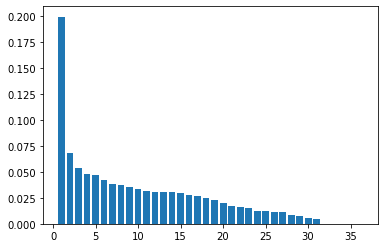

In [394]:
plt.bar(range(1,len(var)+1),var)

In [395]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([19.95, 26.76, 32.11, 36.87, 41.53, 45.76, 49.58, 53.3 , 56.81,
       60.13, 63.29, 66.4 , 69.47, 72.53, 75.48, 78.28, 80.96, 83.42,
       85.72, 87.73, 89.48, 91.06, 92.57, 93.85, 95.05, 96.22, 97.35,
       98.24, 98.95, 99.54, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98])

In [396]:
pca.components_

array([[-8.02783375e-02,  3.30618472e-01, -2.54723993e-01, ...,
         8.33200433e-03,  1.17400624e-02, -0.00000000e+00],
       [-3.46156771e-01,  8.66849999e-02, -5.63968856e-02, ...,
         5.71550742e-02, -1.57829338e-02,  0.00000000e+00],
       [ 1.73987753e-02, -9.51593427e-02,  8.42535393e-02, ...,
        -5.78157584e-02,  1.71130908e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.47048967e-16,  1.28990875e-16, ...,
         2.81687375e-01,  7.83887911e-02,  0.00000000e+00],
       [-0.00000000e+00, -1.81051792e-18, -2.56705080e-19, ...,
        -3.18360798e-02, -8.85943789e-03, -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

(0.0, 100.0)

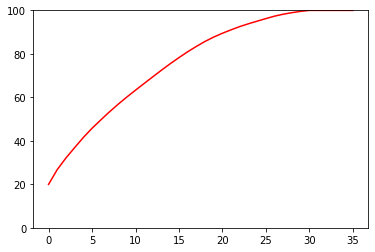

In [397]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")
plt.ylim(0,100)

In [398]:
DATA.shape

(1898, 36)

In [399]:
pca_values.shape

(1898, 36)

In [400]:
pca_features = pd.DataFrame(pca_values[:,0:18],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18'])
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.640600 -1.654898  1.767275  0.334242  3.400227 -0.458405 -0.006543   
1 -1.994659 -0.238742  0.642964 -1.174789  0.134703 -1.628720 -0.549098   
2  2.415136 -0.424412  0.462749 -1.445974 -0.384025  0.712846  0.794801   
3 -2.372419 -1.371799  0.586645 -1.275289 -0.301088  0.867969  1.060368   
4  0.110431  0.281181 -1.008116  1.788804  0.121875  0.370882  0.705642   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.692762  0.123950  0.371009 -0.648542  0.321131  0.426394  0.129414   
1  0.333327 -0.110084  1.369838 -0.770172  0.109109  0.360306  0.262500   
2 -0.284449  0.451262 -0.123296 -0.378492 -0.358212 -0.034499 -1.247549   
3 -0.079908  0.529673 -0.724807 -0.580142 -0.064552 -0.305169 -1.087613   
4  0.536557 -1.571551 -1.090229 -0.149474  0.321954 -0.544816  0.755618   

       pc15      pc16      pc17      pc18  
0 -0.259404  0.467101 -0.202515  0.153063  
1 -0.559853 -1.105998  0.005374  1.005779  
2  0.228957 -0.473597 -0.222854 -0.590162  
3  0.000914 -0.057213 -0.414753 -0.194682  
4  0.246507  1.017630 -1.643395 -0.120284

## Perform Clustering on PCA Data

In [401]:
pca_features_norm = norm_func(pca_features)
pca_features_norm.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  0.784014  0.223747  0.659746  0.495558  0.835069  0.367078  0.252459   
1  0.236009  0.370485  0.520108  0.245672  0.419451  0.248758  0.206790   
2  0.600213  0.351246  0.497725  0.200765  0.353430  0.485492  0.319911   
3  0.204810  0.253081  0.513113  0.229029  0.363986  0.501175  0.342265   
4  0.409868  0.424358  0.315046  0.736425  0.417818  0.450919  0.312406   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.328801  0.248729  0.529331  0.221737  0.513632  0.391562  0.478286   
1  0.430593  0.230101  0.643472  0.212345  0.492647  0.385768  0.497398   
2  0.369307  0.274781  0.472844  0.242590  0.446393  0.351154  0.280546   
3  0.389598  0.281022  0.404106  0.227019  0.475458  0.327423  0.303514   
4  0.450754  0.113778  0.362348  0.260274  0.513713  0.306412  0.568213   

       pc15      pc16      pc17      pc18  
0  0.359113  0.353216  0.417753  0.257768  
1  0.327923  0.170101  0.439228  0.320381  
2  0.409811  0.243715  0.415652  0.203194  
3  0.386137  0.292184  0.395828  0.232233  
4  0.411633  0.417300  0.268906  0.237696

### K-Means Clustering

In [402]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(pca_features_norm)

KMeans(n_clusters=4)

In [403]:
model_kmeans.labels_

array([2, 0, 3, ..., 2, 3, 1])

In [404]:
pca_features['k_clusterid'] = pd.Series(model_kmeans.labels_)
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.640600 -1.654898  1.767275  0.334242  3.400227 -0.458405 -0.006543   
1 -1.994659 -0.238742  0.642964 -1.174789  0.134703 -1.628720 -0.549098   
2  2.415136 -0.424412  0.462749 -1.445974 -0.384025  0.712846  0.794801   
3 -2.372419 -1.371799  0.586645 -1.275289 -0.301088  0.867969  1.060368   
4  0.110431  0.281181 -1.008116  1.788804  0.121875  0.370882  0.705642   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.692762  0.123950  0.371009 -0.648542  0.321131  0.426394  0.129414   
1  0.333327 -0.110084  1.369838 -0.770172  0.109109  0.360306  0.262500   
2 -0.284449  0.451262 -0.123296 -0.378492 -0.358212 -0.034499 -1.247549   
3 -0.079908  0.529673 -0.724807 -0.580142 -0.064552 -0.305169 -1.087613   
4  0.536557 -1.571551 -1.090229 -0.149474  0.321954 -0.544816  0.755618   

       pc15      pc16      pc17      pc18  k_clusterid  
0 -0.259404  0.467101 -0.202515  0.153063            2  
1 -0.559853 -1.105998  0.005374  1.005779            0  
2  0.228957 -0.473597 -0.222854 -0.590162            3  
3  0.000914 -0.057213 -0.414753 -0.194682            3  
4  0.246507  1.017630 -1.643395 -0.120284            1

In [405]:
pca_features_norm['k_clusterid'] = pd.Series(model_kmeans.labels_)
pca_features_norm.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  0.784014  0.223747  0.659746  0.495558  0.835069  0.367078  0.252459   
1  0.236009  0.370485  0.520108  0.245672  0.419451  0.248758  0.206790   
2  0.600213  0.351246  0.497725  0.200765  0.353430  0.485492  0.319911   
3  0.204810  0.253081  0.513113  0.229029  0.363986  0.501175  0.342265   
4  0.409868  0.424358  0.315046  0.736425  0.417818  0.450919  0.312406   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.328801  0.248729  0.529331  0.221737  0.513632  0.391562  0.478286   
1  0.430593  0.230101  0.643472  0.212345  0.492647  0.385768  0.497398   
2  0.369307  0.274781  0.472844  0.242590  0.446393  0.351154  0.280546   
3  0.389598  0.281022  0.404106  0.227019  0.475458  0.327423  0.303514   
4  0.450754  0.113778  0.362348  0.260274  0.513713  0.306412  0.568213   

       pc15      pc16      pc17      pc18  k_clusterid  
0  0.359113  0.353216  0.417753  0.257768            2  
1  0.327923  0.170101  0.439228  0.320381            0  
2  0.409811  0.243715  0.415652  0.203194            3  
3  0.386137  0.292184  0.395828  0.232233            3  
4  0.411633  0.417300  0.268906  0.237696            1

In [406]:
df3['pca_k_clusterid'] = model_kmeans.labels_
df3.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524.0      1957.0  Graduation         Single  58138.0      0.0       0.0   
1  2174.0      1954.0  Graduation         Single  46344.0      1.0       1.0   
2  4141.0      1965.0  Graduation       Together  71613.0      0.0       0.0   
3  6182.0      1984.0  Graduation       Together  26646.0      1.0       0.0   
4  5324.0      1981.0         PhD        Married  58293.0      1.0       0.0   

  Dt_Customer  Recency  MntWines  ...  Z_Revenue  Response  d_clusterid  \
0  2012-09-04     58.0     635.0  ...       11.0       1.0            0   
1  2014-03-08     38.0      11.0  ...       11.0       0.0            0   
2  2013-08-21     26.0     426.0  ...       11.0       0.0            1   
3  2014-02-10     26.0      11.0  ...       11.0       0.0            1   
4  2014-01-19     94.0     173.0  ...       11.0       0.0            2   

   k_clusterid  Expenses  NumPurchases  AcceptedCmp  Childrenhome   Age  \
0            2    1617.0          25.0          0.0           0.0  66.0   
1            2      27.0           6.0          0.0           2.0  69.0   
2            2     776.0          21.0          0.0           0.0  58.0   
3            2      53.0           8.0          0.0           1.0  39.0   
4            2     422.0          19.0          0.0           1.0  42.0   

   pca_k_clusterid  
0                2  
1                0  
2                3  
3                3  
4                1  

[5 rows x 37 columns]

In [407]:
data1['pca_k_clusterid'] = model_kmeans.labels_
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Together  \
0       88.0            546.0            172.0  ...                        0   
1        1.0              6.0              2.0  ...                        0   
2       49.0            127.0            111.0  ...                        1   
3        4.0             20.0             10.0  ...                        1   
4       43.0            118.0             46.0  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  pca_k_clusterid  
0          0.0           0.0  66.0          2                2  
1          0.0           2.0  69.0          2                0  
2          0.0           0.0  58.0          2                3  
3          0.0           1.0  39.0          2                3  
4          0.0           1.0  42.0          2                1  

[5 rows x 44 columns]

In [408]:
data1.groupby(["pca_k_clusterid"])["ID"].count()

pca_k_clusterid
0    343
1    613
2    431
3    511
Name: ID, dtype: int64

<AxesSubplot:xlabel='pca_k_clusterid'>

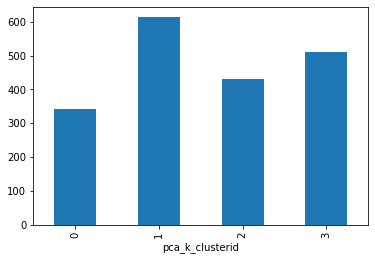

In [409]:
data1.groupby(["pca_k_clusterid"])["ID"].count().plot(kind='bar')

### Cluster Validation - Finding Optimal Number of Clusters for K-Means Clustering

### Elbow method for K-Means Clustering

In [410]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(pca_features_norm)
    iner.append(km.inertia_)

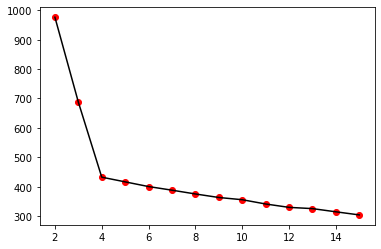

In [411]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

## Model Building - Classification Algorithms

In [412]:
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.640600 -1.654898  1.767275  0.334242  3.400227 -0.458405 -0.006543   
1 -1.994659 -0.238742  0.642964 -1.174789  0.134703 -1.628720 -0.549098   
2  2.415136 -0.424412  0.462749 -1.445974 -0.384025  0.712846  0.794801   
3 -2.372419 -1.371799  0.586645 -1.275289 -0.301088  0.867969  1.060368   
4  0.110431  0.281181 -1.008116  1.788804  0.121875  0.370882  0.705642   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.692762  0.123950  0.371009 -0.648542  0.321131  0.426394  0.129414   
1  0.333327 -0.110084  1.369838 -0.770172  0.109109  0.360306  0.262500   
2 -0.284449  0.451262 -0.123296 -0.378492 -0.358212 -0.034499 -1.247549   
3 -0.079908  0.529673 -0.724807 -0.580142 -0.064552 -0.305169 -1.087613   
4  0.536557 -1.571551 -1.090229 -0.149474  0.321954 -0.544816  0.755618   

       pc15      pc16      pc17      pc18  k_clusterid  
0 -0.259404  0.467101 -0.202515  0.153063            2  
1 -0.559853 -1.105998  0.005374  1.005779            0  
2  0.228957 -0.473597 -0.222854 -0.590162            3  
3  0.000914 -0.057213 -0.414753 -0.194682            3  
4  0.246507  1.017630 -1.643395 -0.120284            1

In [413]:
pca_features.shape

(1898, 19)

### Distribution of customers in different PCA clusters

<AxesSubplot:ylabel='pca_k_clusterid'>

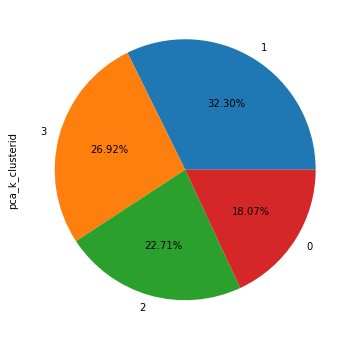

In [414]:
plt.figure(figsize=(6,6))
df3.pca_k_clusterid.value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='pca_k_clusterid'>

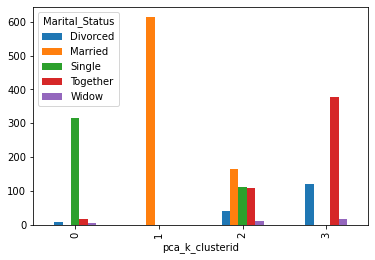

In [415]:
pd.crosstab(df3.pca_k_clusterid,df3.Marital_Status).plot(kind="bar")

<AxesSubplot:xlabel='pca_k_clusterid'>

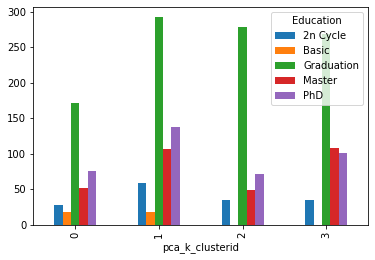

In [416]:
pd.crosstab(df3.pca_k_clusterid,df3.Education).plot(kind="bar")

<AxesSubplot:xlabel='AcceptedCmp'>

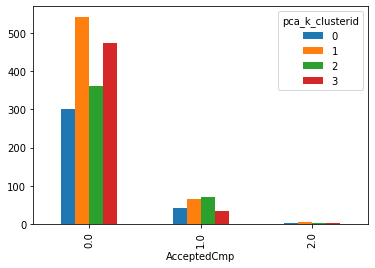

In [417]:
pd.crosstab(df3.AcceptedCmp,df3.pca_k_clusterid).plot(kind="bar")

<AxesSubplot:xlabel='pca_k_clusterid'>

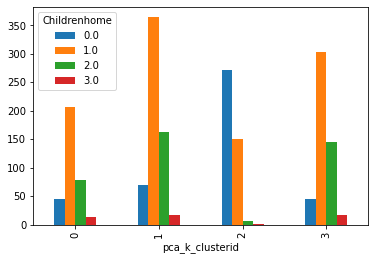

In [418]:
pd.crosstab(df3.pca_k_clusterid,df3.Childrenhome).plot(kind="bar")

<AxesSubplot:xlabel='pca_k_clusterid'>

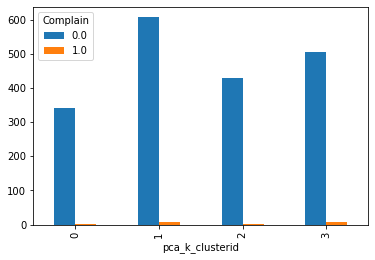

In [419]:
pd.crosstab(df3.pca_k_clusterid,df3.Complain).plot(kind="bar")

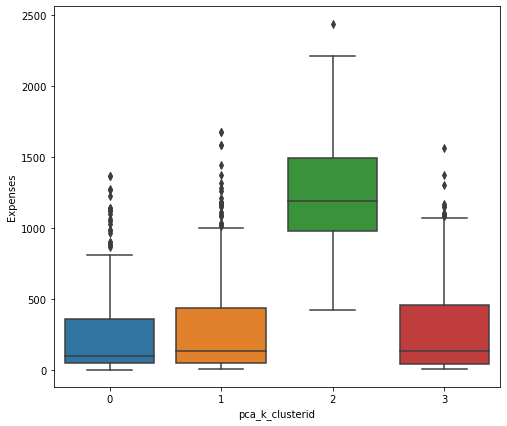

In [420]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

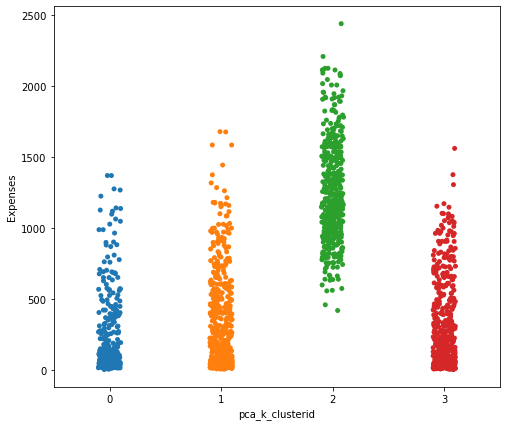

In [421]:
plt.figure(figsize=(8,7))
sns.stripplot(x='pca_k_clusterid', y='Expenses', data=df3)
plt.ylabel('Expenses')
plt.show()

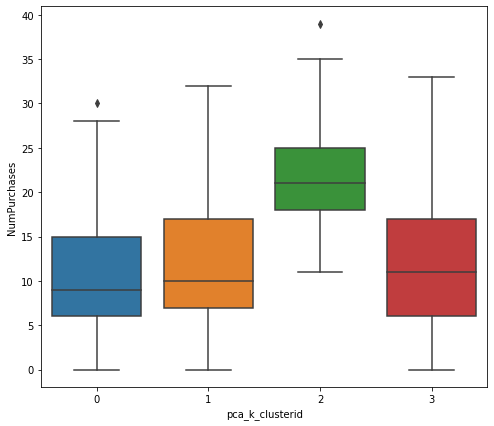

In [422]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='NumPurchases', data=df3)
plt.ylabel('NumPurchases')
plt.show()

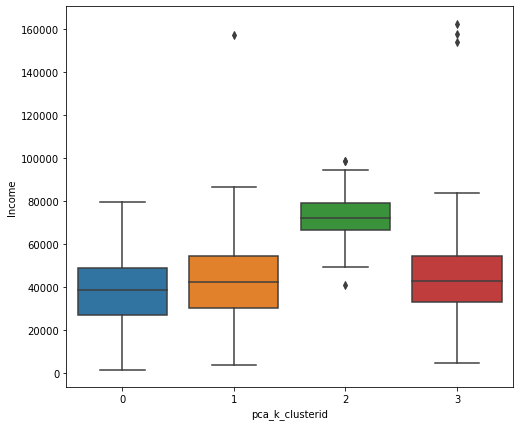

In [423]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Income', data=df3)
plt.ylabel('Income')
plt.show()

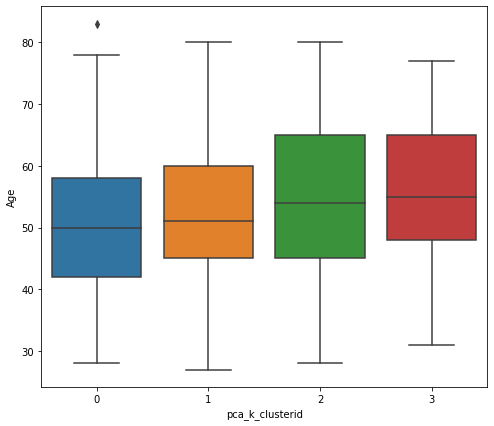

In [424]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Age', data=df3)
plt.ylabel('Age')
plt.show()

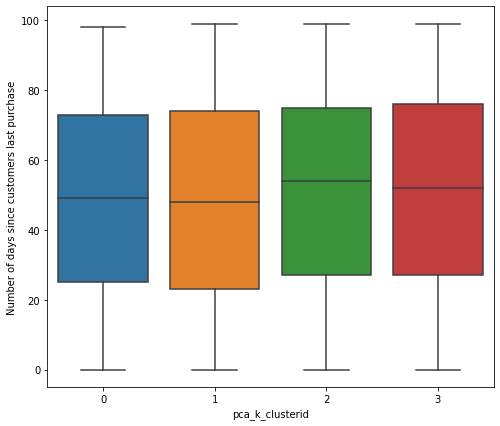

In [425]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Recency', data=df3)
plt.ylabel('Number of days since customers last purchase')
plt.show()

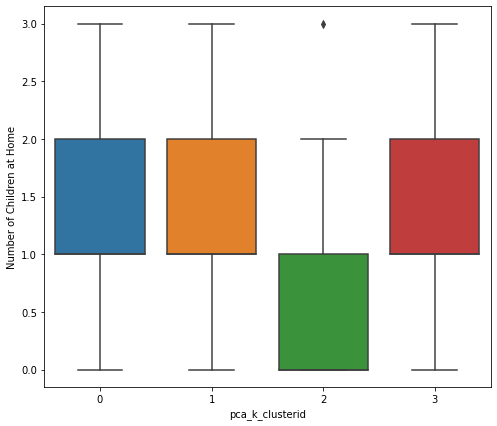

In [426]:
plt.figure(figsize=(8,7))
sns.boxplot(x='pca_k_clusterid', y='Childrenhome', data=df3)
plt.ylabel('Number of Children at Home')
plt.show()

## 1) Logistic Regression

In [427]:
# Dividing our data into input and output variables 
x=pca_features.iloc[:,0:18]
y=pca_features.iloc[:,18]

In [428]:
x

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     4.640600 -1.654898  1.767275  0.334242  3.400227 -0.458405 -0.006543   
1    -1.994659 -0.238742  0.642964 -1.174789  0.134703 -1.628720 -0.549098   
2     2.415136 -0.424412  0.462749 -1.445974 -0.384025  0.712846  0.794801   
3    -2.372419 -1.371799  0.586645 -1.275289 -0.301088  0.867969  1.060368   
4     0.110431  0.281181 -1.008116  1.788804  0.121875  0.370882  0.705642   
...        ...       ...       ...       ...       ...       ...       ...   
1893 -2.596221 -1.304790  0.480004  0.841193 -1.530755 -0.463775  0.179227   
1894  3.414342  0.454573  2.093625  1.543859 -0.543231  0.568558 -0.140177   
1895  2.003169  0.641074  0.545170 -0.524913 -0.613085 -1.926405 -0.592695   
1896  2.615409  1.484613 -1.326293 -1.744702  0.126719  1.381266 -1.105740   
1897 -1.570963  1.668759 -0.816714  1.566426  1.264801 -0.883835  1.174926   

           pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0    -0.692762  0.123950  0.371009 -0.648542  0.321131  0.426394  0.129414   
1     0.333327 -0.110084  1.369838 -0.770172  0.109109  0.360306  0.262500   
2    -0.284449  0.451262 -0.123296 -0.378492 -0.358212 -0.034499 -1.247549   
3    -0.079908  0.529673 -0.724807 -0.580142 -0.064552 -0.305169 -1.087613   
4     0.536557 -1.571551 -1.090229 -0.149474  0.321954 -0.544816  0.755618   
...        ...       ...       ...       ...       ...       ...       ...   
1893  0.248966  0.127967 -0.724103 -0.210203  0.056682 -0.128279  0.671475   
1894 -0.171038 -0.125287  0.205199  0.617186 -0.309085 -0.297297  0.453785   
1895  2.651763  1.067663 -2.581154  1.937209  0.852314  1.062510 -2.042019   
1896 -1.307683  1.356612  0.573415 -0.297984 -0.554992 -0.192528 -0.712260   
1897 -2.082893 -0.733663  0.574452 -1.060089  0.316260 -0.110223 -0.054060   

          pc15      pc16      pc17      pc18  
0    -0.259404  0.467101 -0.202515  0.153063  
1    -0.559853 -1.105998  0.005374  1.005779  
2     0.228957 -0.473597 -0.222854 -0.590162  
3     0.000914 -0.057213 -0.414753 -0.194682  
4     0.246507  1.017630 -1.643395 -0.120284  
...        ...       ...       ...       ...  
1893 -0.274140  0.070570 -0.703111 -0.225228  
1894  0.648955 -0.937490  0.126100 -0.164327  
1895 -1.503261  1.431372  0.557872 -3.284315  
1896  0.453128 -0.555864  0.016651  0.280800  
1897 -0.419442  0.405515 -0.068226  0.319656  

[1898 rows x 18 columns]

In [429]:
y

0       2
1       0
2       3
3       3
4       1
       ..
1893    1
1894    2
1895    2
1896    3
1897    1
Name: k_clusterid, Length: 1898, dtype: int32

## Test-Train Split

In [430]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [431]:
x_train.shape

(1328, 18)

In [432]:
y_train.shape

(1328,)

In [433]:
x_test.shape

(570, 18)

In [434]:
y_test.shape

(570,)

## Logistic regression and fit the model

In [435]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [436]:
classifier.intercept_

array([ 0.57243249,  2.2093209 , -3.9905353 ,  1.20878192])

In [437]:
classifier.coef_

array([[-1.45802279e+00, -3.77029896e-01,  1.22413793e-01,
         6.01635591e-02,  2.38662604e+00, -8.05978202e-01,
        -2.24535460e-01,  7.75924364e-01, -1.15599859e-01,
         8.46379986e-01, -2.52590366e-01,  1.09774801e-01,
         1.00066488e-01,  5.38357471e-01, -2.05359124e-01,
        -5.62688600e-02,  3.19392679e-01,  2.88495589e-01],
       [-1.25811061e+00,  6.57429020e-01, -2.34283396e-01,
         3.17996008e+00, -9.77452409e-01, -6.25040404e-04,
         2.76060341e-01, -2.48934542e-01,  3.02268257e-01,
         1.57205199e-01, -4.50160587e-01,  3.00229394e-01,
        -2.26120025e-01,  1.09822964e-01,  2.69217748e-02,
        -1.56223493e-01, -2.67685182e-01, -1.28053471e-01],
       [ 3.65965913e+00, -1.23000872e+00,  4.48749068e-02,
        -1.62847749e-02, -1.58842058e-01,  9.08590116e-02,
        -1.73384650e-01,  2.80565776e-02, -1.19075908e-01,
        -2.94549237e-01,  2.63636183e-01,  2.08991139e-01,
         1.76733557e-01, -7.95532729e-02, -3.68381969e

## Model Accuracy on Training Dataset

In [438]:
y_train_pred=classifier.predict(x_train)

In [439]:
pca_logistic_train_ac=ac(y_train,y_train_pred)
pca_logistic_train_ac

0.9984939759036144

In [440]:
y_train_pred_df = pd.DataFrame({'actual': y_train,
                                'predicted_values': classifier.predict(x_train)})
y_train_pred_df

actual  predicted_values
654        0                 0
361        1                 1
913        3                 3
1857       1                 1
1303       0                 0
...      ...               ...
589        2                 2
1179       3                 3
1785       1                 1
263        1                 1
1552       1                 1

[1328 rows x 2 columns]

## Model Accuracy on Testing Dataset

In [441]:
y_test_pred=classifier.predict(x_test)

In [442]:
pca_logistic_test_ac=ac(y_test,y_test_pred)
pca_logistic_test_ac

0.9842105263157894

In [443]:
y_test_pred_df = pd.DataFrame({'actual': y_test,
                                'predicted_values': classifier.predict(x_test)})
y_test_pred_df

actual  predicted_values
494        3                 3
893        3                 0
711        3                 3
489        3                 3
499        3                 3
...      ...               ...
1472       3                 3
862        0                 0
68         1                 1
1374       0                 0
1858       2                 2

[570 rows x 2 columns]

In [444]:
pca_logistic_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_logistic_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_logistic_test_ac*100,2)]})
pca_logistic_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  99.85                 98.42

## Confusion Matrix for the model accuracy

In [445]:
confusion_matrix(y_test_pred,y_test)

array([[ 99,   0,   2,   1],
       [  0, 183,   2,   0],
       [  0,   3, 122,   0],
       [  0,   0,   1, 157]], dtype=int64)

## Classification report

In [446]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.98      0.99      0.99       185
           2       0.96      0.98      0.97       125
           3       0.99      0.99      0.99       158

    accuracy                           0.98       570
   macro avg       0.98      0.98      0.98       570
weighted avg       0.98      0.98      0.98       570



## 2) Decision Tree

In [447]:
# Dividing our data into input and output variables 
x=pca_features.iloc[:,0:18]
y=pca_features.iloc[:,18]

In [448]:
# Splitting data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

## Building Decision Tree Classifier using gini Criteria

In [449]:
model = DecisionTreeClassifier(criterion= 'gini', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

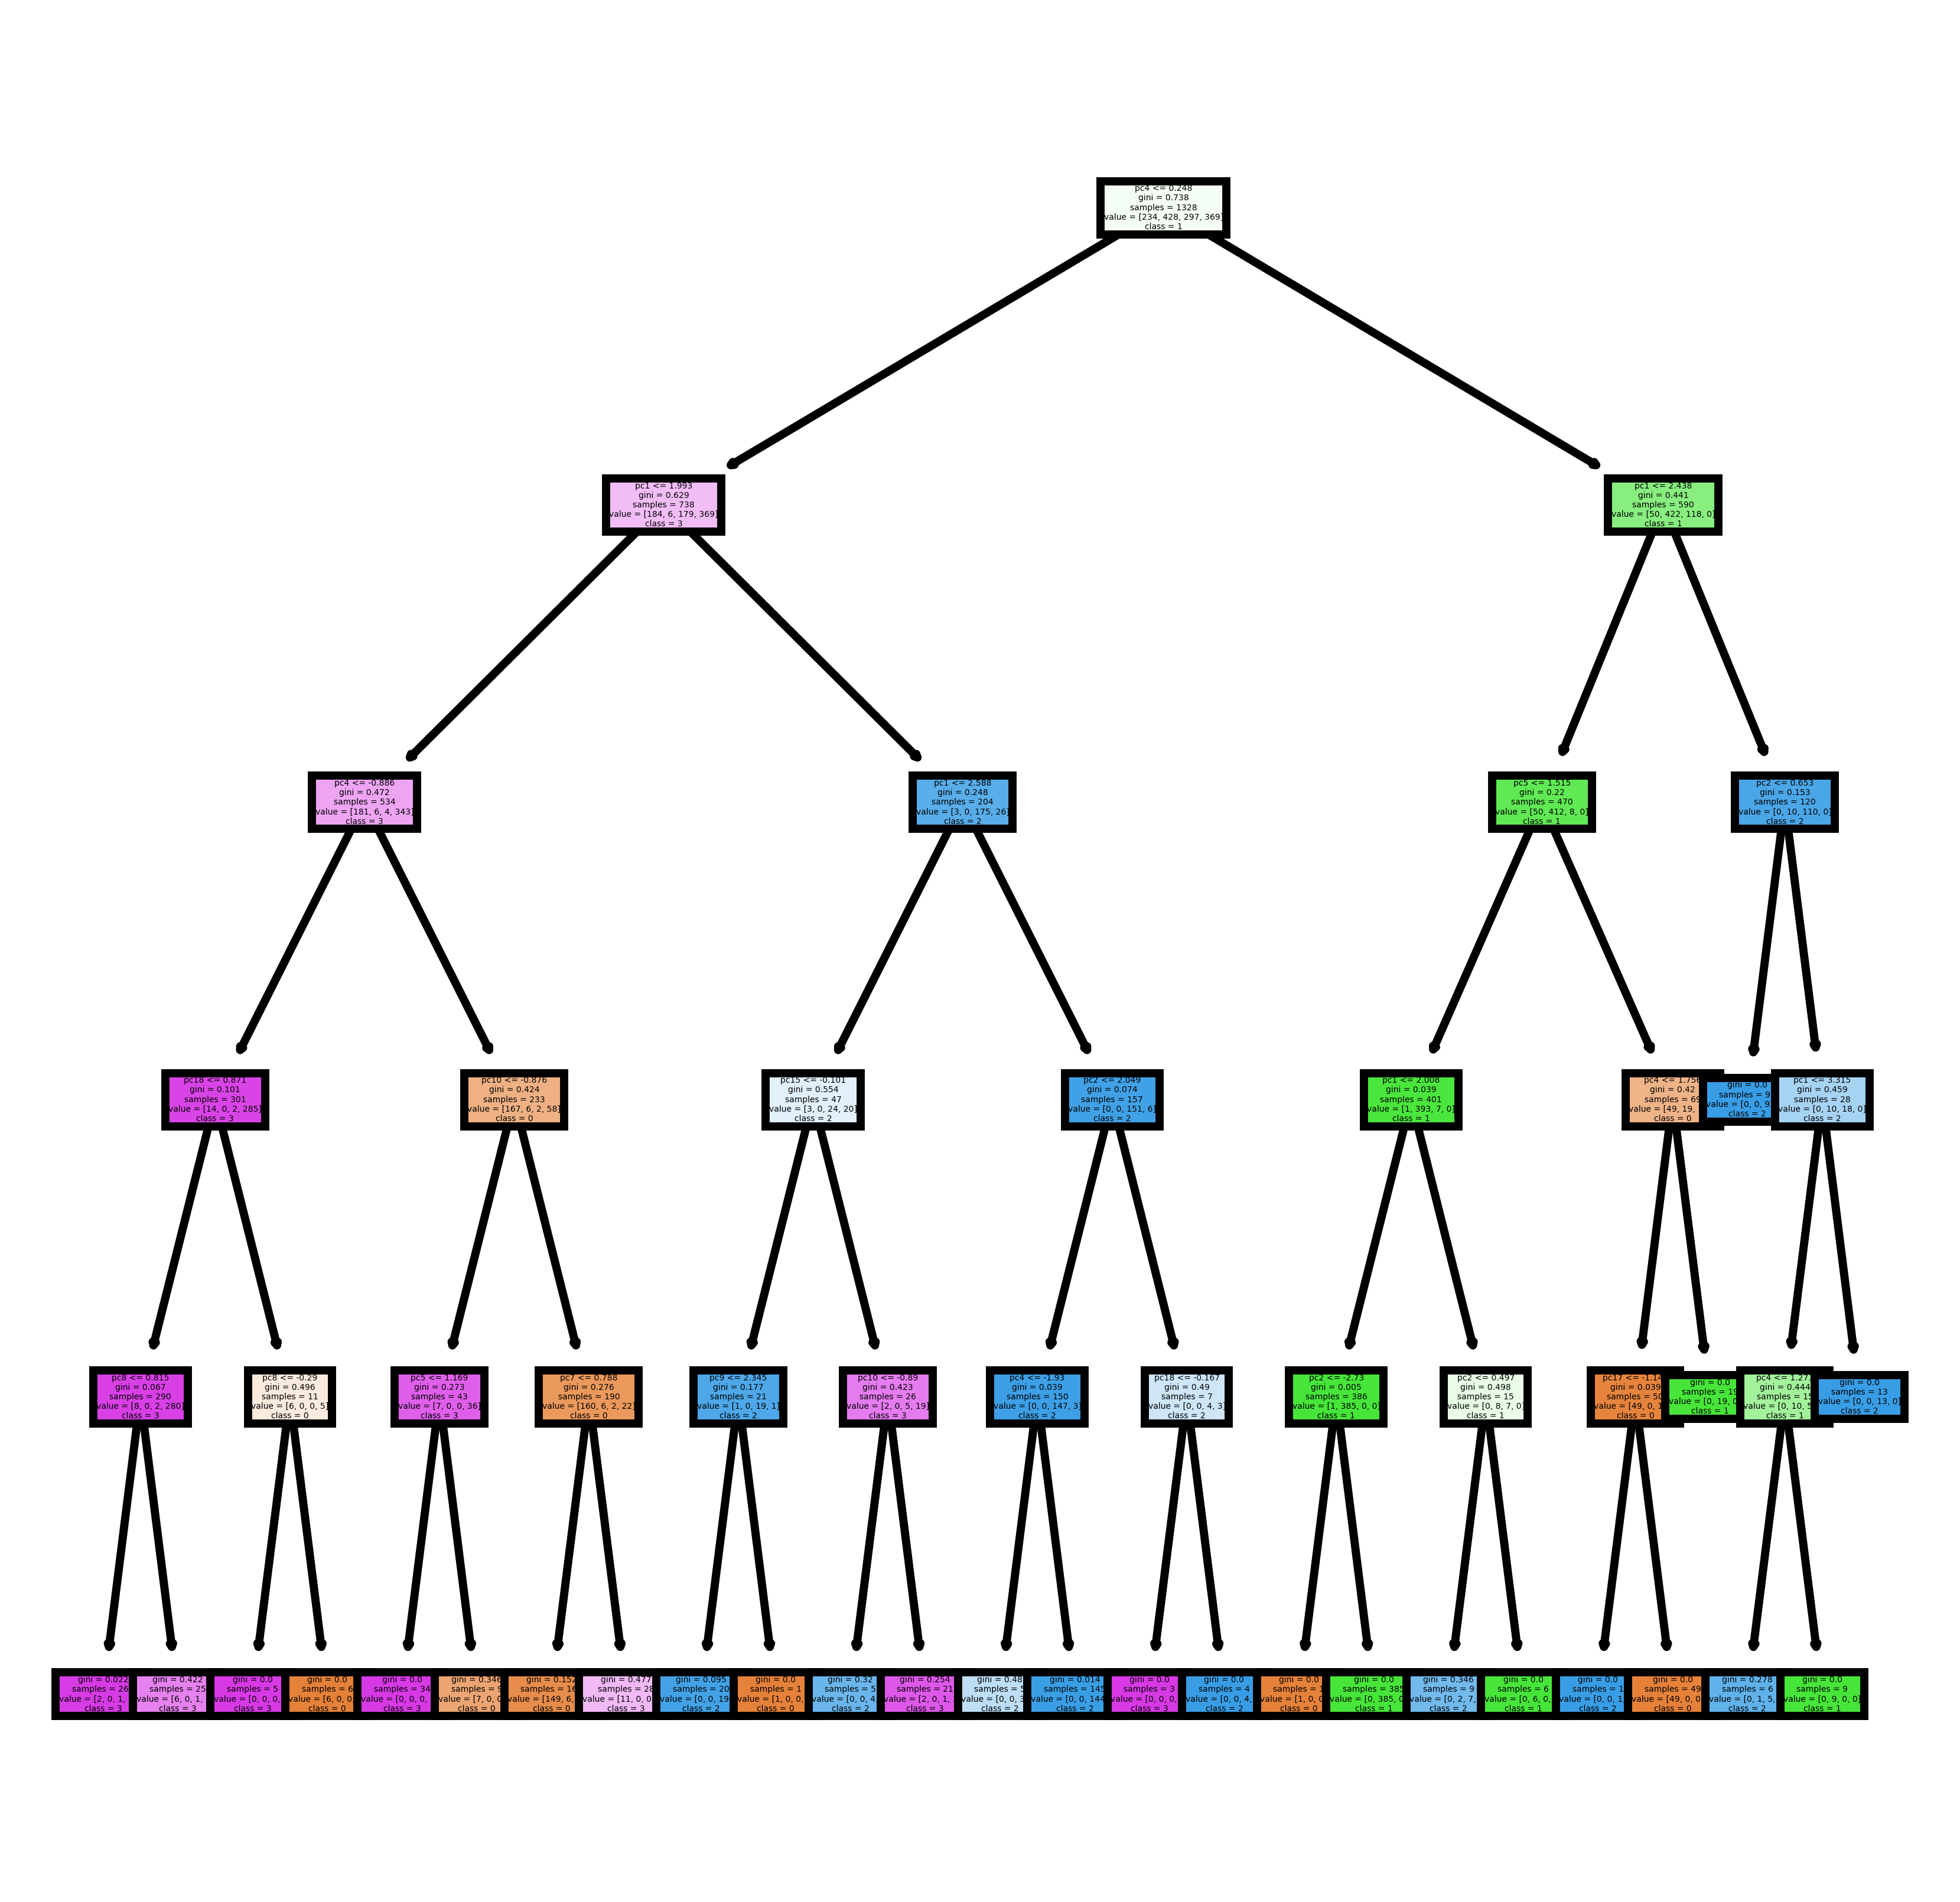

In [450]:
fn=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [451]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    186
3    146
2    134
0    104
dtype: int64

In [452]:
pca_DT1_test_ac=metrics.accuracy_score(y_test_pred,y_test)
pca_DT1_test_ac

0.9385964912280702

## Model Accuracy on Training Dataset

In [453]:
y_train_pred = model.predict(x_train)
pca_DT1_train_ac=metrics.accuracy_score(y_train_pred,y_train)
pca_DT1_train_ac

0.9646084337349398

In [454]:
pca_DT1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_DT1_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_DT1_test_ac*100,2)]})
pca_DT1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  96.46                 93.86

## Building Decision Tree Classifier using entropy Criteria

In [455]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

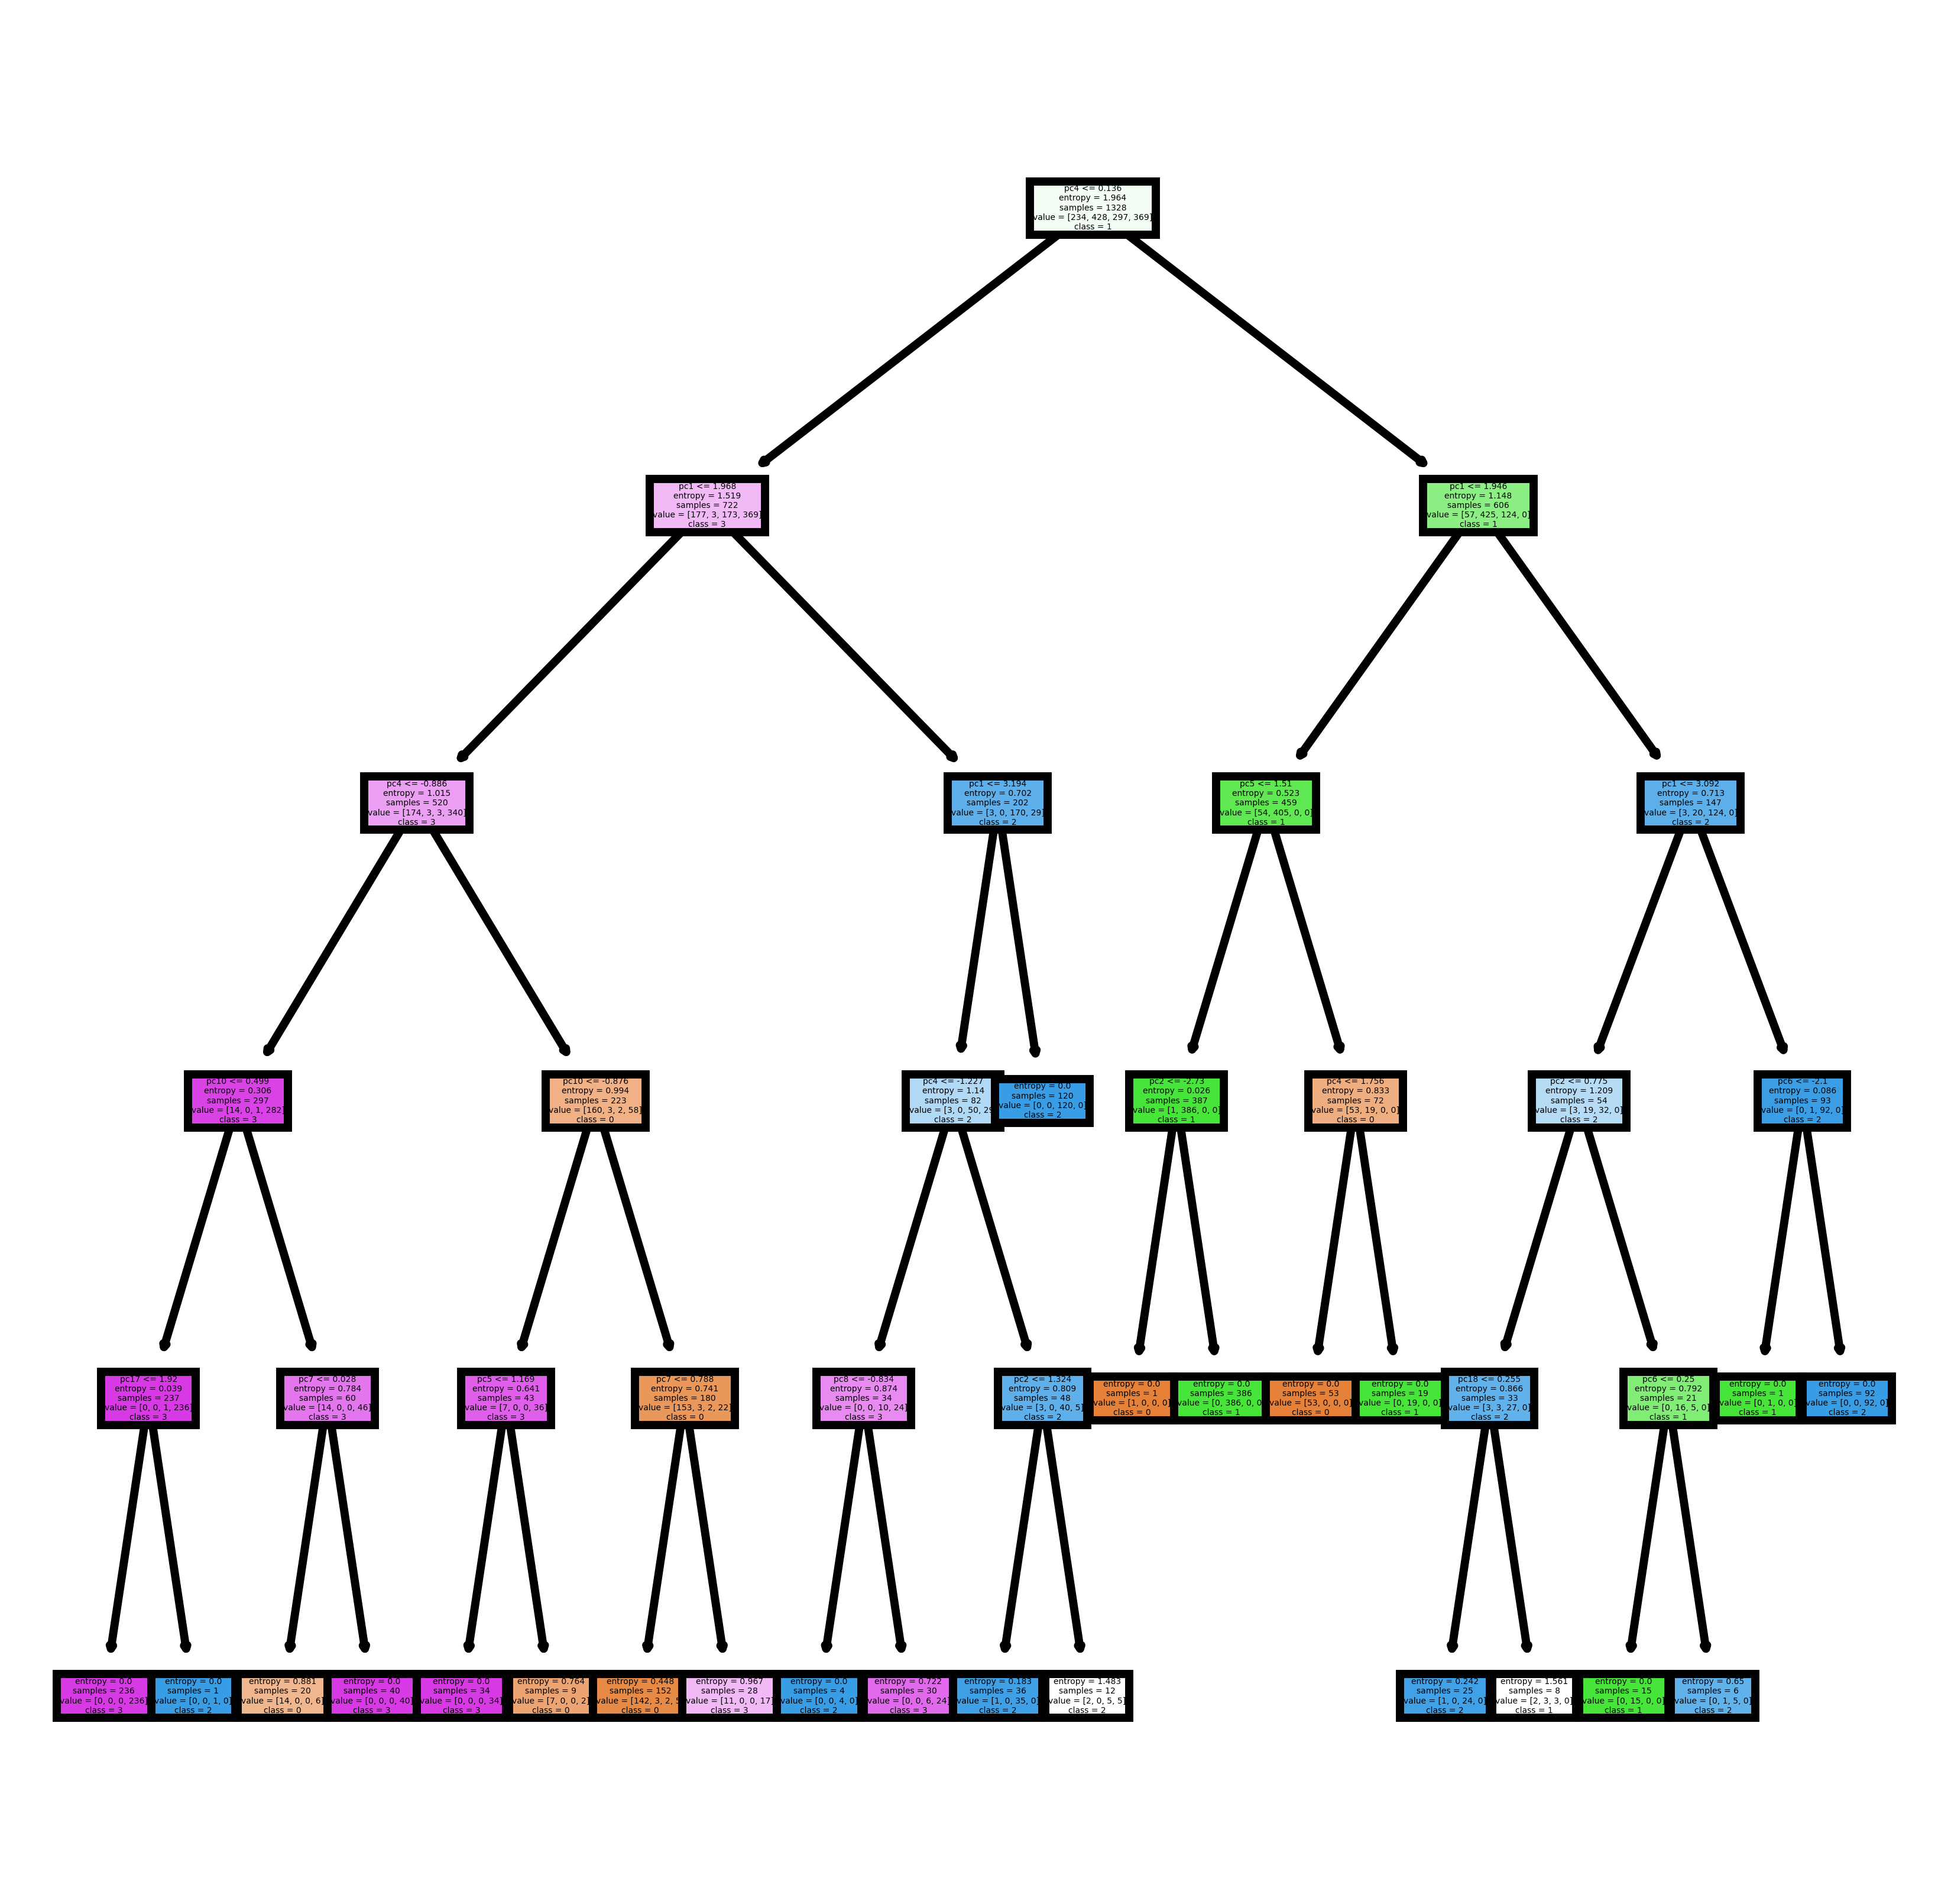

In [456]:
fn=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=1000)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

## Model Accuracy on Testing Dataset

In [457]:
# Predicting on test data
y_test_pred = model.predict(x_test) # Predicting on test dataset
pd.Series(y_test_pred).value_counts() # Getting the count of each class

1    192
3    143
2    132
0    103
dtype: int64

In [458]:
pca_DT2_test_ac=metrics.accuracy_score(y_test_pred,y_test)
pca_DT2_test_ac

0.9298245614035088

## Model Accuracy on Training Dataset

In [459]:
y_train_pred = model.predict(x_train)
pca_DT2_train_ac=metrics.accuracy_score(y_train_pred,y_train)
pca_DT2_train_ac

0.9623493975903614

In [460]:
pca_DT2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_DT2_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_DT2_test_ac*100,2)]})
pca_DT2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  96.23                 92.98

## 3) Random Forests

In [461]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

## Building Random Forest Classifier

In [462]:
num_trees = 200
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)

In [463]:
results = cross_val_score(model, X, Y, cv=10)
pca_RF_test_ac=results.mean()
pca_RF_test_ac

0.9699554441659703

## 4) Boosting

In [464]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

## Building AdaBoost Classifier

In [465]:
num_trees = 10
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.5, random_state=8)

In [466]:
results = cross_val_score(model, X, Y, cv=10)
pca_Boosting_test_ac=results.mean()
pca_Boosting_test_ac

0.7971707045391256

## Visualising the CV results

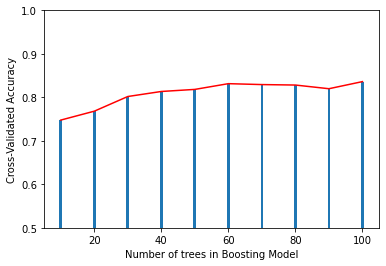

In [467]:
num_trees_range = [10*i for i in range(1,11)]
results = []
for n in num_trees_range:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=0.5, random_state=8)
    scores = cross_val_score(model, X, Y, cv=5)
    results.append(scores.mean())
# plot
plt.bar(num_trees_range, results)
plt.plot(num_trees_range, results, color="red")
plt.xlabel('Number of trees in Boosting Model')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.5,1)
plt.show()

## 5) K-Nearest Neighbors (KNN)

In [468]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

In [469]:
X

array([[ 4.64060036, -1.654898  ,  1.767275  , ...,  0.46710127,
        -0.20251503,  0.15306313],
       [-1.99465874, -0.23874243,  0.64296376, ..., -1.10599847,
         0.00537374,  1.0057788 ],
       [ 2.41513599, -0.4244119 ,  0.462749  , ..., -0.47359747,
        -0.22285426, -0.59016211],
       ...,
       [ 2.00316903,  0.64107411,  0.54516995, ...,  1.43137229,
         0.55787241, -3.28431545],
       [ 2.61540942,  1.48461322, -1.32629315, ..., -0.55586417,
         0.01665136,  0.28079966],
       [-1.57096329,  1.66875916, -0.81671419, ...,  0.40551514,
        -0.06822622,  0.3196559 ]])

In [470]:
Y

array([2., 0., 3., ..., 2., 3., 1.])

In [471]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

## KNN Model Building

In [472]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [473]:
pred=model.predict(x_test)
pca_KNN_test_ac=accuracy_score(pred,y_test)
pca_KNN_test_ac

0.9350877192982456

## Grid Search for Algorithm Tuning

In [474]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [475]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [476]:
print(grid.best_score_)
print(grid.best_params_)

0.9388696014442438
{'n_neighbors': 15}


## Visualising the CV results

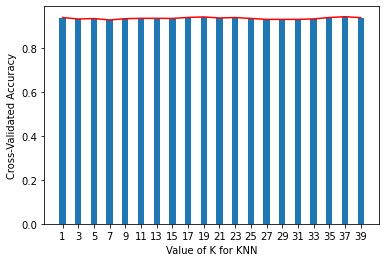

In [477]:
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

## 6) Support Vector Machine (SVM)

In [478]:
array = pca_features.values
X = array[:,0:18]
Y = array[:,18]

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [480]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 18), (1328,), (570, 18), (570,))

In [481]:
clf = SVC(kernel="rbf",gamma=0.002)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy = ", acc)
confusion_matrix(y_test, y_pred)

Accuracy =  96.3157894736842


array([[ 92,   0,   1,   8],
       [  0, 173,   3,   0],
       [  0,   0, 138,   4],
       [  0,   0,   5, 146]], dtype=int64)

In [482]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       101
         1.0       1.00      0.98      0.99       176
         2.0       0.94      0.97      0.96       142
         3.0       0.92      0.97      0.94       151

    accuracy                           0.96       570
   macro avg       0.97      0.96      0.96       570
weighted avg       0.96      0.96      0.96       570



## Grid Search CV (Hyperparameter tuning)

In [483]:
clf = SVC()
param_grid = [{'kernel':["rbf"], 'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=5)
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [484]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9631096609448149)

### Building model using best parameters obtained in Grid Search CV

In [485]:
# Test data accuracy
clf = SVC(C=10, gamma=0.001, kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pca_SVM_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", pca_SVM_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 96.3157894736842


array([[ 94,   0,   0,   7],
       [  0, 171,   5,   0],
       [  1,   0, 137,   4],
       [  0,   0,   4, 147]], dtype=int64)

In [486]:
# Train data accuracy
clf = SVC(C=1, gamma=0.5, kernel="rbf")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
pca_SVM_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", pca_SVM_train_ac)

Accuracy = 100.0


In [487]:
pca_SVM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_SVM_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(pca_SVM_test_ac,2)]})
pca_SVM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 96.32

## 7) Naive Bayes

In [488]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [490]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 18), (1328,), (570, 18), (570,))

### Multinomial Naive Bayes

In [491]:
classifier_mb = MB()
classifier_mb.fit(X_train,y_train)

MultinomialNB()

### Test data accuracy

In [492]:
y_pred = classifier_mb.predict(X_test)
pca_NB1_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", pca_NB1_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 47.192982456140356


array([[  0, 101,   0,   0],
       [  0, 176,   0,   0],
       [  0, 101,  11,  30],
       [  0,  69,   0,  82]], dtype=int64)

In [493]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       101
         1.0       0.39      1.00      0.57       176
         2.0       1.00      0.08      0.14       142
         3.0       0.73      0.54      0.62       151

    accuracy                           0.47       570
   macro avg       0.53      0.41      0.33       570
weighted avg       0.56      0.47      0.38       570



### Train data accuracy

In [494]:
y_pred_train = classifier_mb.predict(X_train)
pca_NB1_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", pca_NB1_train_ac)

Accuracy = 50.451807228915655


In [495]:
pca_NB1_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_NB1_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(pca_NB1_test_ac,2)]})
pca_NB1_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  50.45                 47.19

### Gaussian Naive Bayes

In [496]:
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)

GaussianNB()

### Test data accuracy

In [497]:
y_pred = classifier_gb.predict(X_test)
pca_NB2_test_ac = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", pca_NB2_test_ac)
confusion_matrix(y_test, y_pred)

Accuracy = 89.64912280701755


array([[ 95,   2,   1,   3],
       [  0, 164,   9,   3],
       [  9,  15, 107,  11],
       [  5,   0,   1, 145]], dtype=int64)

In [498]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       101
         1.0       0.91      0.93      0.92       176
         2.0       0.91      0.75      0.82       142
         3.0       0.90      0.96      0.93       151

    accuracy                           0.90       570
   macro avg       0.89      0.90      0.89       570
weighted avg       0.90      0.90      0.89       570



### Train data accuracy

In [499]:
y_pred_train = classifier_gb.predict(X_train)
pca_NB2_train_ac = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", pca_NB2_train_ac)

Accuracy = 91.79216867469879


In [500]:
pca_NB2_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_NB2_train_ac,2)], 
                            'Testing Accuracy (%)': [np.round(pca_NB2_test_ac,2)]})
pca_NB2_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  91.79                 89.65

## 8) Gradient Boosting

In [501]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [503]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 18), (1328,), (570, 18), (570,))

## Gradient Boosting Model Building

In [504]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [505]:
y_pred = gb_classifier.predict(X_test)
pca_GB_test_ac=accuracy_score(y_pred,y_test)
pca_GB_test_ac

0.9526315789473684

In [506]:
y_pred_train = gb_classifier.predict(X_train)
pca_GB_train_ac = accuracy_score(y_train, y_pred_train)
pca_GB_train_ac

1.0

In [507]:
pca_GB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_GB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_GB_test_ac*100,2)]})
pca_GB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 95.26

## 9) XGBoost

In [508]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [510]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 18), (1328,), (570, 18), (570,))

## XGBoost Model Building

In [511]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4, learning_rate=0.1, max_depth=3, n_estimators=100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=4, num_parallel_tree=1, objective='multi:softmax', ...)

In [512]:
y_pred = xgb_classifier.predict(X_test)
pca_XGB_test_ac=accuracy_score(y_pred,y_test)
pca_XGB_test_ac

0.9666666666666667

In [513]:
y_pred_train = xgb_classifier.predict(X_train)
pca_XGB_train_ac = accuracy_score(y_train, y_pred_train)
pca_XGB_train_ac

1.0

In [514]:
pca_XGB_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_XGB_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_XGB_test_ac*100,2)]})
pca_XGB_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 96.67

In [515]:
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=4)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
data1_XGB_ac = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", data1_XGB_ac)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Accuracy: 0.968421052631579


## 10) LightGBM

In [516]:
array = pca_features_norm.values
X = array[:,0:18]
Y = array[:,18]

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=15)

In [518]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1328, 18), (1328,), (570, 18), (570,))

## LightGBM Model Building

In [519]:
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier()

In [520]:
y_pred = lgbm_classifier.predict(X_test)
pca_LGBM_test_ac=accuracy_score(y_pred,y_test)
pca_LGBM_test_ac

0.968421052631579

In [521]:
y_pred_train = lgbm_classifier.predict(X_train)
pca_LGBM_train_ac = accuracy_score(y_train, y_pred_train)
pca_LGBM_train_ac

1.0

In [522]:
pca_LGBM_accuracy_df = pd.DataFrame({'Training Accuracy (%)': [np.round(pca_LGBM_train_ac*100,2)], 
                            'Testing Accuracy (%)': [np.round(pca_LGBM_test_ac*100,2)]})
pca_LGBM_accuracy_df

Training Accuracy (%)  Testing Accuracy (%)
0                  100.0                 96.84

## Grid Search CV (Hyperparameter tuning)

In [523]:

# Define the parameter grids for each classifier

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9578947368421052
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.9631578947368421
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.968421052631579


In [524]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Together  \
0       88.0            546.0            172.0  ...                        0   
1        1.0              6.0              2.0  ...                        0   
2       49.0            127.0            111.0  ...                        1   
3        4.0             20.0             10.0  ...                        1   
4       43.0            118.0             46.0  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  pca_k_clusterid  
0          0.0           0.0  66.0          2                2  
1          0.0           2.0  69.0          2                0  
2          0.0           0.0  58.0          2                3  
3          0.0           1.0  39.0          2                3  
4          0.0           1.0  42.0          2                1  

[5 rows x 44 columns]

In [525]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524.0  58138.0     58.0                7.0       0.0       1.0   
1  2174.0  46344.0     38.0                5.0       0.0       0.0   
2  4141.0  71613.0     26.0                4.0       0.0       0.0   
3  6182.0  26646.0     26.0                6.0       0.0       0.0   
4  5324.0  58293.0     94.0                5.0       0.0       0.0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  
0          0.0           0.0  66.0          2  
1          0.0           2.0  69.0          2  
2          0.0           0.0  58.0          2  
3          0.0           1.0  39.0          2  
4          0.0           1.0  42.0          2  

[5 rows x 25 columns]

In [526]:
pca_features.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  4.640600 -1.654898  1.767275  0.334242  3.400227 -0.458405 -0.006543   
1 -1.994659 -0.238742  0.642964 -1.174789  0.134703 -1.628720 -0.549098   
2  2.415136 -0.424412  0.462749 -1.445974 -0.384025  0.712846  0.794801   
3 -2.372419 -1.371799  0.586645 -1.275289 -0.301088  0.867969  1.060368   
4  0.110431  0.281181 -1.008116  1.788804  0.121875  0.370882  0.705642   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.692762  0.123950  0.371009 -0.648542  0.321131  0.426394  0.129414   
1  0.333327 -0.110084  1.369838 -0.770172  0.109109  0.360306  0.262500   
2 -0.284449  0.451262 -0.123296 -0.378492 -0.358212 -0.034499 -1.247549   
3 -0.079908  0.529673 -0.724807 -0.580142 -0.064552 -0.305169 -1.087613   
4  0.536557 -1.571551 -1.090229 -0.149474  0.321954 -0.544816  0.755618   

       pc15      pc16      pc17      pc18  k_clusterid  
0 -0.259404  0.467101 -0.202515  0.153063            2  
1 -0.559853 -1.105998  0.005374  1.005779            0  
2  0.228957 -0.473597 -0.222854 -0.590162            3  
3  0.000914 -0.057213 -0.414753 -0.194682            3  
4  0.246507  1.017630 -1.643395 -0.120284            1

In [527]:
data1.shape

(1898, 44)

In [528]:
data2.shape

(1898, 25)

In [529]:
pca_features.shape

(1898, 19)

In [530]:
Testing_Accuracy = {'Model': pd.Series(['Logistic Regression', 'Decision Tree', 'Random Forests', 'Boosting', 'K-Nearest Neighbors (KNN)', 'Support Vector Machine (SVM)','Naive Bayes', 'Gradient Boosting', 'XGBoost', 'LightGBM']),
                    'Baseline Models Accuracy (%)': pd.Series([round(data1_logistic_test_ac*100,2), round(data1_DT1_test_ac*100,2), round(data1_RF_test_ac*100,2), round(data1_Boosting_test_ac*100,2), round(data1_KNN_test_ac*100,2), round(data1_SVM_test_ac,2), round(data1_NB2_test_ac,2), round(data1_GB_test_ac*100,2), round(data1_XGB_test_ac*100,2), round(data1_LGBM_test_ac*100,2)]),
                    'Transformed Data Accuracy (%)': pd.Series([round(data2_logistic_test_ac*100,2), round(data2_DT1_test_ac*100,2), round(data2_RF_test_ac*100,2), round(data2_Boosting_test_ac*100,2), round(data2_KNN_test_ac*100,2), round(data2_SVM_test_ac,2), round(data2_NB2_test_ac,2), round(data2_GB_test_ac*100,2), round(data2_XGB_test_ac*100,2), round(data2_LGBM_test_ac*100,2)]),
                    'PCA Models Accuracy (%)': pd.Series([round(pca_logistic_test_ac*100,2), round(pca_DT1_test_ac*100,2), round(pca_RF_test_ac*100,2), round(pca_Boosting_test_ac*100,2), round(pca_KNN_test_ac*100,2), round(pca_SVM_test_ac,2), round(pca_NB2_test_ac,2), round(pca_GB_test_ac*100,2), round(pca_XGB_test_ac*100,2), round(pca_LGBM_test_ac*100,2)])}
Testing_Accuracy_df = pd.DataFrame(Testing_Accuracy)
Testing_Accuracy_df

Model  Baseline Models Accuracy (%)  \
0           Logistic Regression                         37.89   
1                 Decision Tree                        100.00   
2                Random Forests                        100.00   
3                      Boosting                         81.24   
4     K-Nearest Neighbors (KNN)                         33.33   
5  Support Vector Machine (SVM)                         48.77   
6                   Naive Bayes                         75.09   
7             Gradient Boosting                        100.00   
8                       XGBoost                        100.00   
9                      LightGBM                        100.00   

   Transformed Data Accuracy (%)  PCA Models Accuracy (%)  
0                          36.32                    98.42  
1                         100.00                    93.86  
2                         100.00                    97.00  
3                          81.24                    79.72  
4                          35.96                    93.51  
5                          48.77                    96.32  
6                          78.07                    89.65  
7                         100.00                    95.26  
8                         100.00                    96.67  
9                         100.00                    96.84

In [531]:
data.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524.0      1957.0  58138.0      0.0       0.0  2012-09-04     58.0   
1  2174.0      1954.0  46344.0      1.0       1.0  2014-03-08     38.0   
2  4141.0      1965.0  71613.0      0.0       0.0  2013-08-21     26.0   
3  6182.0      1984.0  26646.0      1.0       0.0  2014-02-10     26.0   
4  5324.0      1981.0  58293.0      1.0       0.0  2014-01-19     94.0   

   MntWines  MntFruits  MntMeatProducts  ...  Marital_Status_Divorced  \
0     635.0       88.0            546.0  ...                        0   
1      11.0        1.0              6.0  ...                        0   
2     426.0       49.0            127.0  ...                        0   
3      11.0        4.0             20.0  ...                        0   
4     173.0       43.0            118.0  ...                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  h_clusterid_s  h_clusterid_c  \
0                     0                    0              0              4   
1                     0                    0              0              4   
2                     0                    0              0              9   
3                     0                    0              0              9   
4                     0                    0              0              0   

   h_clusterid_a  d_clusterid  
0              6            0  
1              6            0  
2              6            1  
3              6            1  
4              6            2  

[5 rows x 44 columns]

In [532]:
data1.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524.0      1957.0  58138.0      0.0       0.0     58.0     635.0   
1  2174.0      1954.0  46344.0      1.0       1.0     38.0      11.0   
2  4141.0      1965.0  71613.0      0.0       0.0     26.0     426.0   
3  6182.0      1984.0  26646.0      1.0       0.0     26.0      11.0   
4  5324.0      1981.0  58293.0      1.0       0.0     94.0     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  Marital_Status_Together  \
0       88.0            546.0            172.0  ...                        0   
1        1.0              6.0              2.0  ...                        0   
2       49.0            127.0            111.0  ...                        1   
3        4.0             20.0             10.0  ...                        1   
4       43.0            118.0             46.0  ...                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  pca_k_clusterid  
0          0.0           0.0  66.0          2                2  
1          0.0           2.0  69.0          2                0  
2          0.0           0.0  58.0          2                3  
3          0.0           1.0  39.0          2                3  
4          0.0           1.0  42.0          2                1  

[5 rows x 44 columns]

In [533]:
data2.head()

ID   Income  Recency  NumWebVisitsMonth  Complain  Response  \
0  5524.0  58138.0     58.0                7.0       0.0       1.0   
1  2174.0  46344.0     38.0                5.0       0.0       0.0   
2  4141.0  71613.0     26.0                4.0       0.0       0.0   
3  6182.0  26646.0     26.0                6.0       0.0       0.0   
4  5324.0  58293.0     94.0                5.0       0.0       0.0   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                   0                0                     1   
1                   0                0                     1   
2                   0                0                     1   
3                   0                0                     1   
4                   0                0                     0   

   Education_Master  ...  Marital_Status_Single  Marital_Status_Together  \
0                 0  ...                      1                        0   
1                 0  ...                      1                        0   
2                 0  ...                      0                        1   
3                 0  ...                      0                        1   
4                 0  ...                      0                        0   

   Marital_Status_Widow  Marital_Status_YOLO  Expenses  NumPurchases  \
0                     0                    0    1617.0          25.0   
1                     0                    0      27.0           6.0   
2                     0                    0     776.0          21.0   
3                     0                    0      53.0           8.0   
4                     0                    0     422.0          19.0   

   AcceptedCmp  Childrenhome   Age  clusterid  
0          0.0           0.0  66.0          2  
1          0.0           2.0  69.0          2  
2          0.0           0.0  58.0          2  
3          0.0           1.0  39.0          2  
4          0.0           1.0  42.0          2  

[5 rows x 25 columns]